# Import de librairies

In [53]:
library(sf)
library(ggplot2)
library("rnaturalearth")
library("rnaturalearthdata")
library(dplyr)
library(glue)
library(tidyr)
library(onewaytests)
library(FSA)

Registered S3 methods overwritten by 'FSA':
  method       from
  confint.boot car 
  hist.boot    car 

## FSA v0.10.0. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.



# Chargement du data frame

In [3]:
# données complètes
data_full_dir = "../data/donnees-synop-essentielles-omm.csv"
# 31s à s'exécuter sur Stuart

# extract aléatoire des données
data_ext10_dir = "../data/donnees_extracted_10.csv"
# extract aléatoire des données en métropole seulement
data_ext10_met_dir = "../data/donnees_extracted_metro_10.csv"
# 9s à s'exécuter sur stuart


# full_data <- read.csv(data_ext10_met_dir, 
#            sep=",",                        # à toggle en fonction du fichier
#            na.string=c("","null","NaN"),
#            header=TRUE, 
#            stringsAsFactors=TRUE)

full_data <- read.csv("./data/donnees-synop-essentielles-omm.csv", 
            sep=";", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE) # SI IL Y A DES PROBLÈMES BIZARRES PLUS LOIN, METTRE À FALSE

# 1 - Presentation des donnees

## Affichage synthétique des données chargées

In [4]:
summary(full_data)
# RQE : le read_csv remplace les ' ' par des '.' dans les titres des colonnes

# affiche toutes les colonnes
colnames(full_data)

# affiche les numéros de stations présentes dans le fichier
stations_in_file = unique(unlist(full_data["ID.OMM.station"]))
print(stations_in_file)

 ID.OMM.station                         Date         Pression.au.niveau.mer
 Min.   : 7005   2017-08-31T20:00:00+02:00:     62   Min.   : 93850        
 1st Qu.: 7207   2019-01-08T13:00:00+01:00:     62   1st Qu.:101180        
 Median : 7577   2019-01-24T16:00:00+01:00:     62   Median :101600        
 Mean   :26062   2019-01-26T04:00:00+01:00:     62   Mean   :101577        
 3rd Qu.:61976   2023-01-06T13:00:00+01:00:     62   3rd Qu.:102090        
 Max.   :89642   2023-01-06T16:00:00+01:00:     62   Max.   :107570        
                 (Other)                  :1719195   NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 M

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

 [1]  7181 81405  7627 78894  7020  7280  7015  7110 81408  7222  7240  7747
[13]  7027  7790 78925  7510  7761 61976  7149  7072  7130  7190 61980  7005
[25]  7607  7650  7207  7335  7168  7643 78897  7535  7139  7690 78922 61998
[37] 89642  7471  7591 81415  7481  7558  7630 81401  7661  7577  7314  7037
[49] 61996  7434 61968 61972  7621  7460  7117 71805 61997 67005  7299  7255
[61] 78890 61970


## Compte les NaN dans par lignes et station

In [5]:
# Pour avoir le nombre de NaN
# result <- full_data %>%
#   group_by(ID.OMM.station) %>%
#   summarise(across(everything(), ~ sum(is.na(.x))))



# pour avoir le %age
result <- full_data %>%
  group_by(ID.OMM.station) %>%
  summarise(across(everything(), ~ {
    n_total <- n()
    n_na <- sum(is.na(.x))
    ifelse(n_total == 0, NA, n_na / n_total * 100)
  }))
print(result)


# adapte les dimensions
result_long <- result %>%
  pivot_longer(
    cols = -ID.OMM.station,
    names_to = "column",
    values_to = "na_count"
  )

# A tibble: 62 × 82
   ID.OMM.station  Date Pression.au.niveau.mer Variation.de.pression.en.3.heures
            <int> <dbl>                  <dbl>                             <dbl>
 1           7005     0                0.0411                             0.0548
 2           7015     0                0.00681                            0.0272
 3           7020     0                2.96                               0.114 
 4           7027     0                0.0205                             0.0240
 5           7037     0                0.436                              0.129 
 6           7072     0                0.0647                             0.0238
 7           7110     0                0.126                              0.0784
 8           7117     0                0.172                              0.213 
 9           7130     0                0.0749                             0.102 
10           7139     0                0.956                              1.01  
# ℹ 52 m

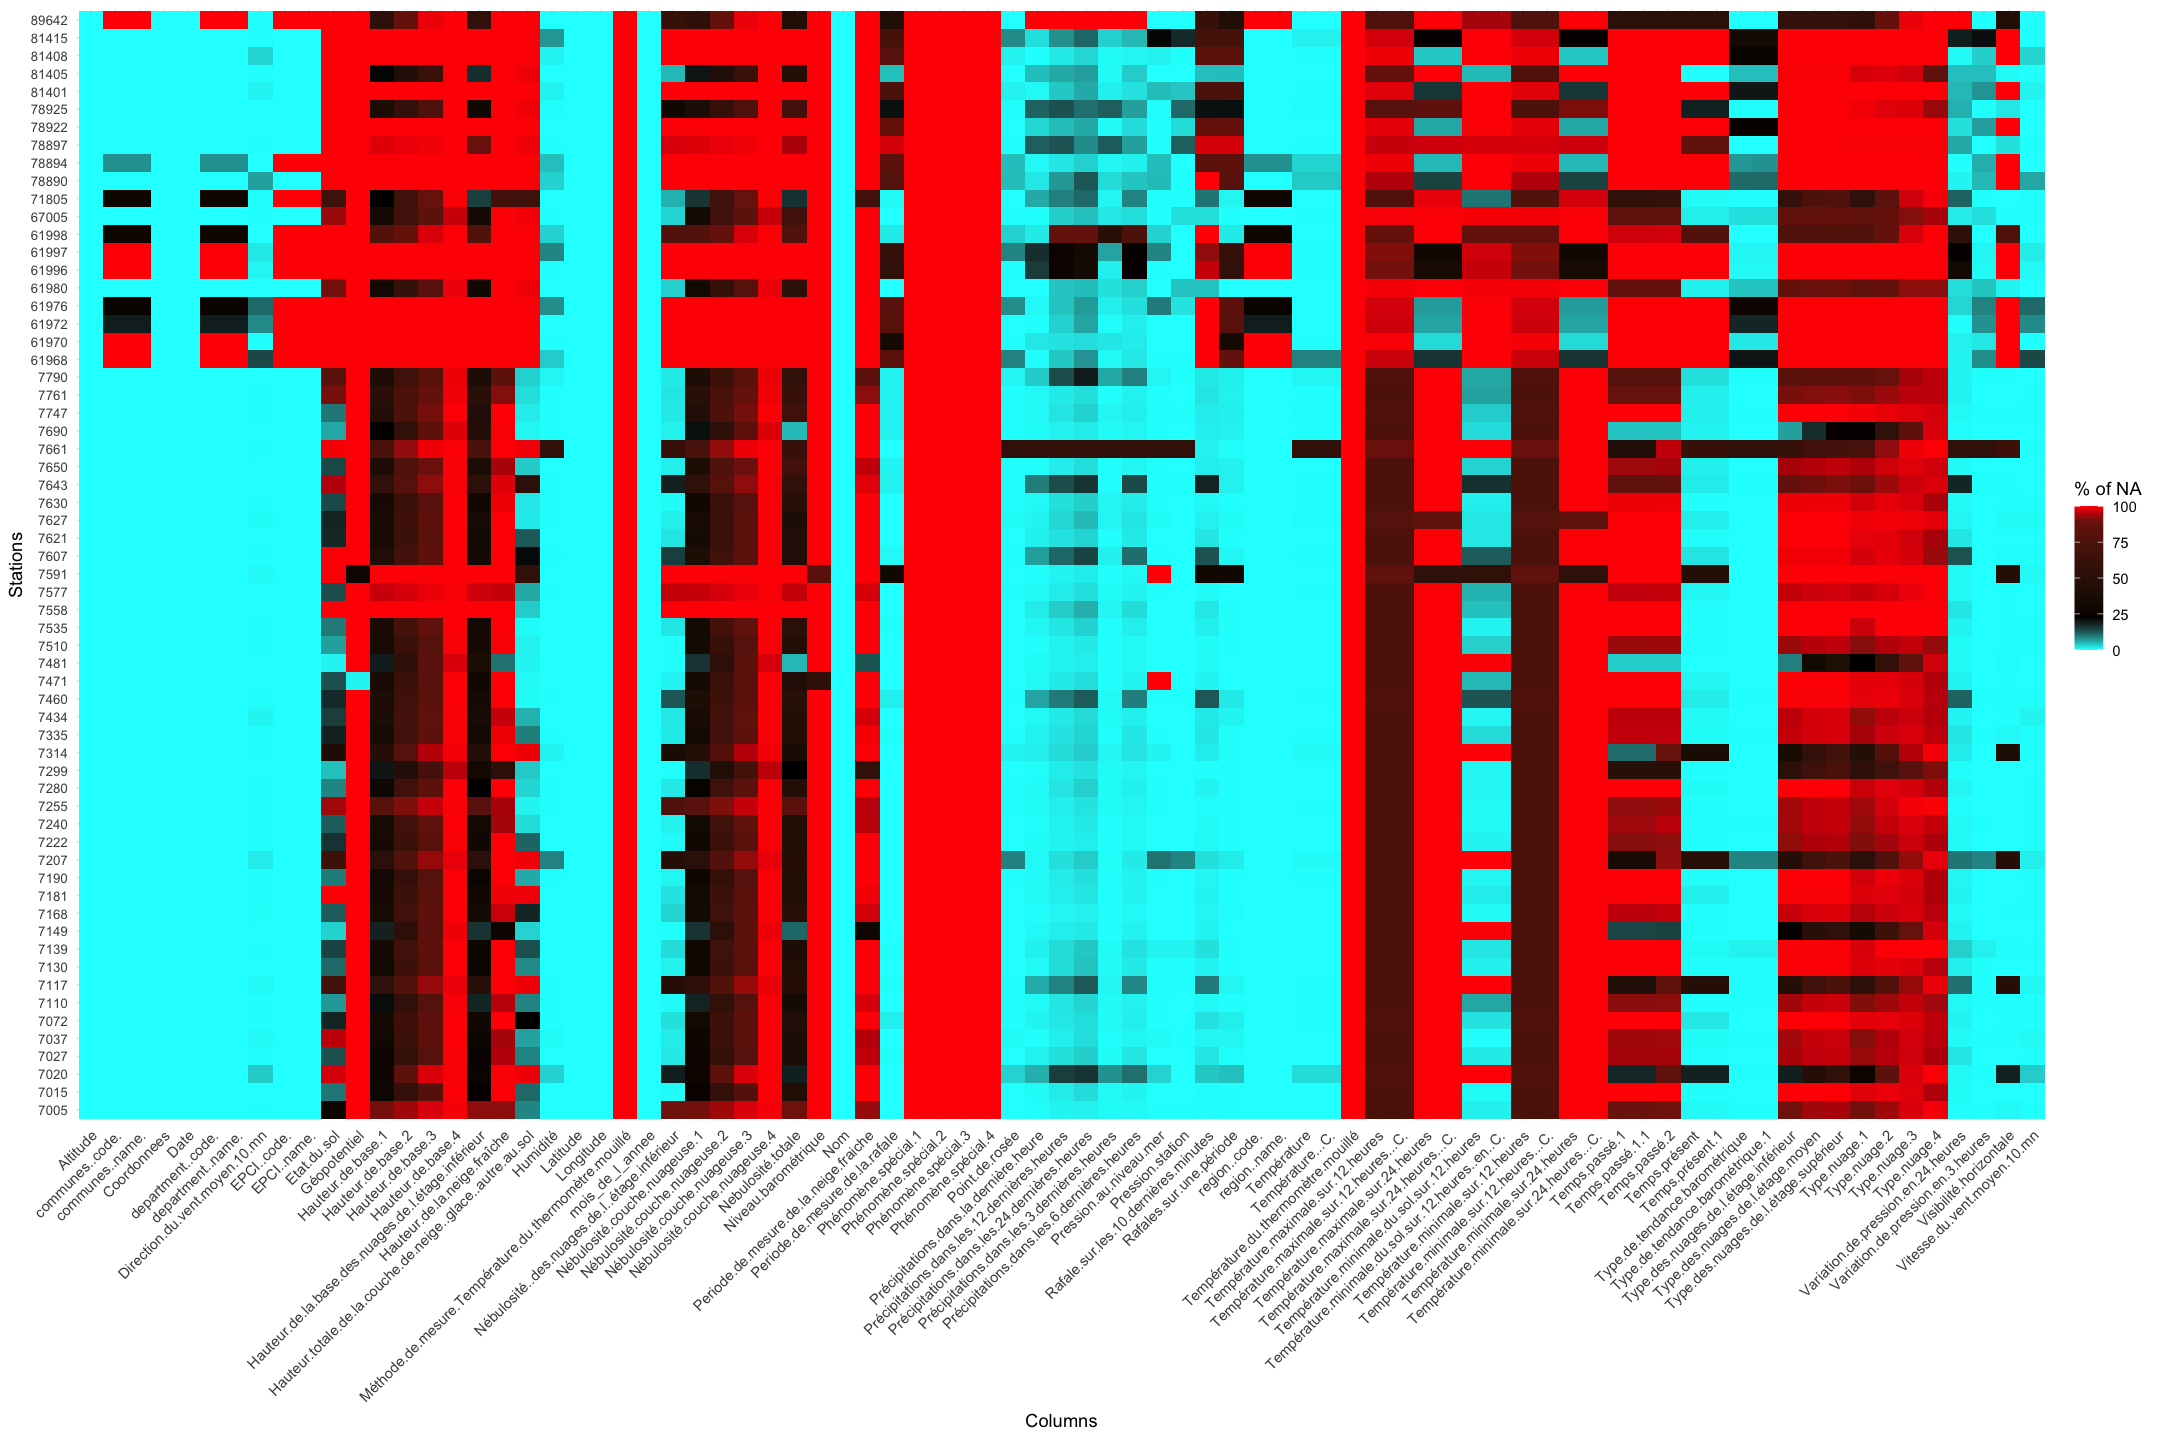

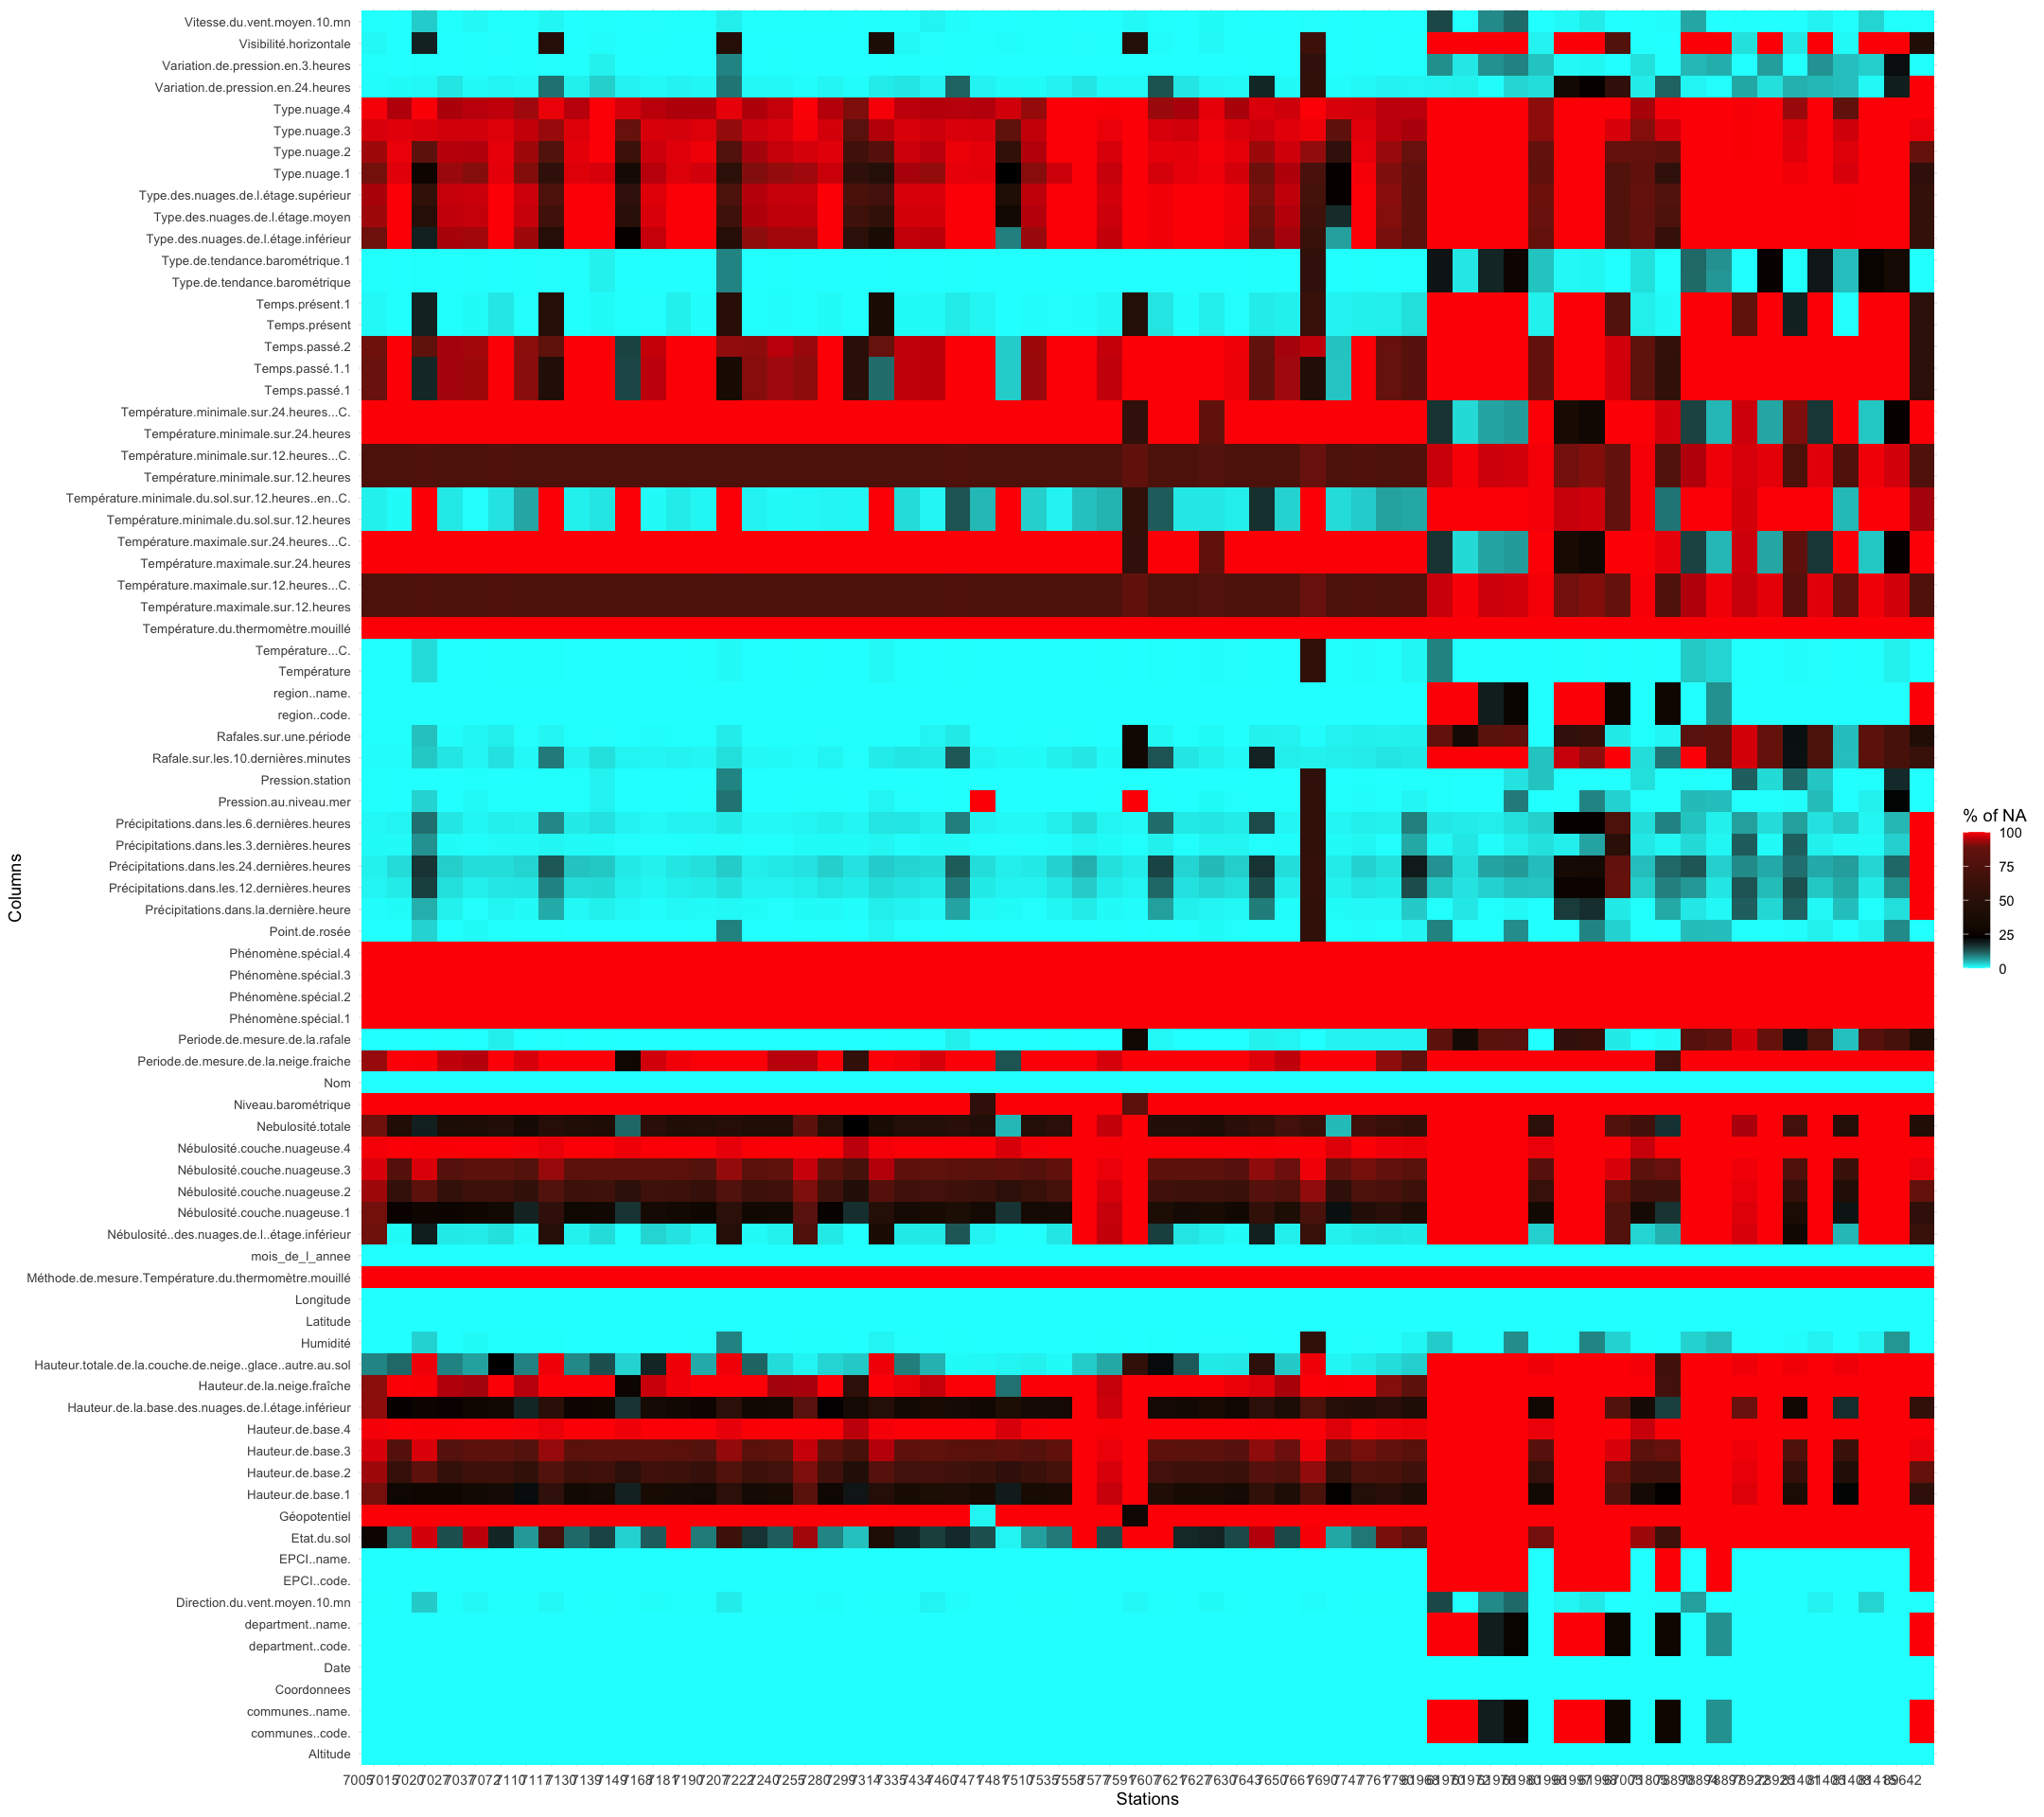

In [6]:
# Heatmap
options(repr.plot.width=18, repr.plot.height=12)
ggplot(result_long, aes(x = column, y = factor(ID.OMM.station), fill = na_count)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("cyan", "black", "red"),
                       values = scales::rescale(c(0, 0.1, 0.2, 0.8, 0.9))) +
  labs(x = "Columns", y = "Stations", fill = "% of NA") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),
        axis.text.x = element_text(angle = 45, hjust = 1))

# Heatmap Transposed
options(repr.plot.width=18, repr.plot.height=16)
ggplot(result_long, aes(x = factor(ID.OMM.station), y = column, fill = na_count)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("cyan", "black", "red"),
                       values = scales::rescale(c(0, 0.1, 0.2, 0.8, 0.9))) +
  labs(x = "Stations", y = "Columns", fill = "% of NA") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),
        axis.text.x = element_text(angle = 0, hjust = 1))
  # ggsave("heatmapT.png", width = 10, height = 15, dpi = 300)

options(repr.plot.width=18, repr.plot.height=12)

## Liste toute les valeurs possibles d'une colonne

In [7]:
list_all_values <- function(data, column){
    all_values = unique(unlist(data[column]))
    colname = gsub("[[:punct:]]", " ", column)
    print(glue("All values found in column  '{colname}' : "))
    for(v in all_values){
        print(v)
    }
}

list_all_values(full_data, "communes..name.")

All values found in column  'communes  name ' : 
[1] "Thuilley-aux-Groseilles"
[1] "Matoury"
[1] "Lorp-Sentaraille"
[1] NA
[1] "La Hague"
[1] "Ouges"
[1] "Fretin"
[1] "Guipavas"
[1] "Saint-Georges"
[1] "Saint-Aignan-Grandlieu"
[1] "Parçay-Meslay"
[1] "Perpignan"
[1] "Carpiquet"
[1] "Lucciana"
[1] "Le Lamentin"
[1] "Mérignac"
[1] "Ajaccio"
[1] "Athis-Mons"
[1] "Prunay"
[1] "Saint-Jacques-de-la-Lande"
[1] "Holtzheim"
[1] "Sainte-Marie"
[1] "Abbeville"
[1] "Mont-de-Marsan"
[1] "Marignane"
[1] "Bangor"
[1] "Poitiers"
[1] "Barberey-Saint-Sulpice"
[1] "Mauguio"
[1] "Les Abymes"
[1] "Gourdon"
[1] "Cerisé"
[1] "Nice"
[1] "La Trinité"
[1] "Chaspuzac"
[1] "Embrun"
[1] "Maripasoula"
[1] "Colombier-Saugnieu"
[1] "Millau"
[1] "Blagnac"
[1] "Saint-Laurent-du-Maroni"
[1] "Saint-Mandrier-sur-Mer"
[1] "Montélimar"
[1] "Saint-Denis-d'Oléron"
[1] "Boos"
[1] "Limoges"
[1] "Louey"
[1] "Clermont-Ferrand"
[1] "Perros-Guirec"
[1] "Pamandzi"
[1] "Blotzheim"
[1] "Bourges"
[1] "La Désirade"
[1] "les Éparses de l

## Affiche un histogramme des valeurs d'une colonne

Warning message:
“Removed 68236 rows containing non-finite outside the scale range
(`stat_count()`).”


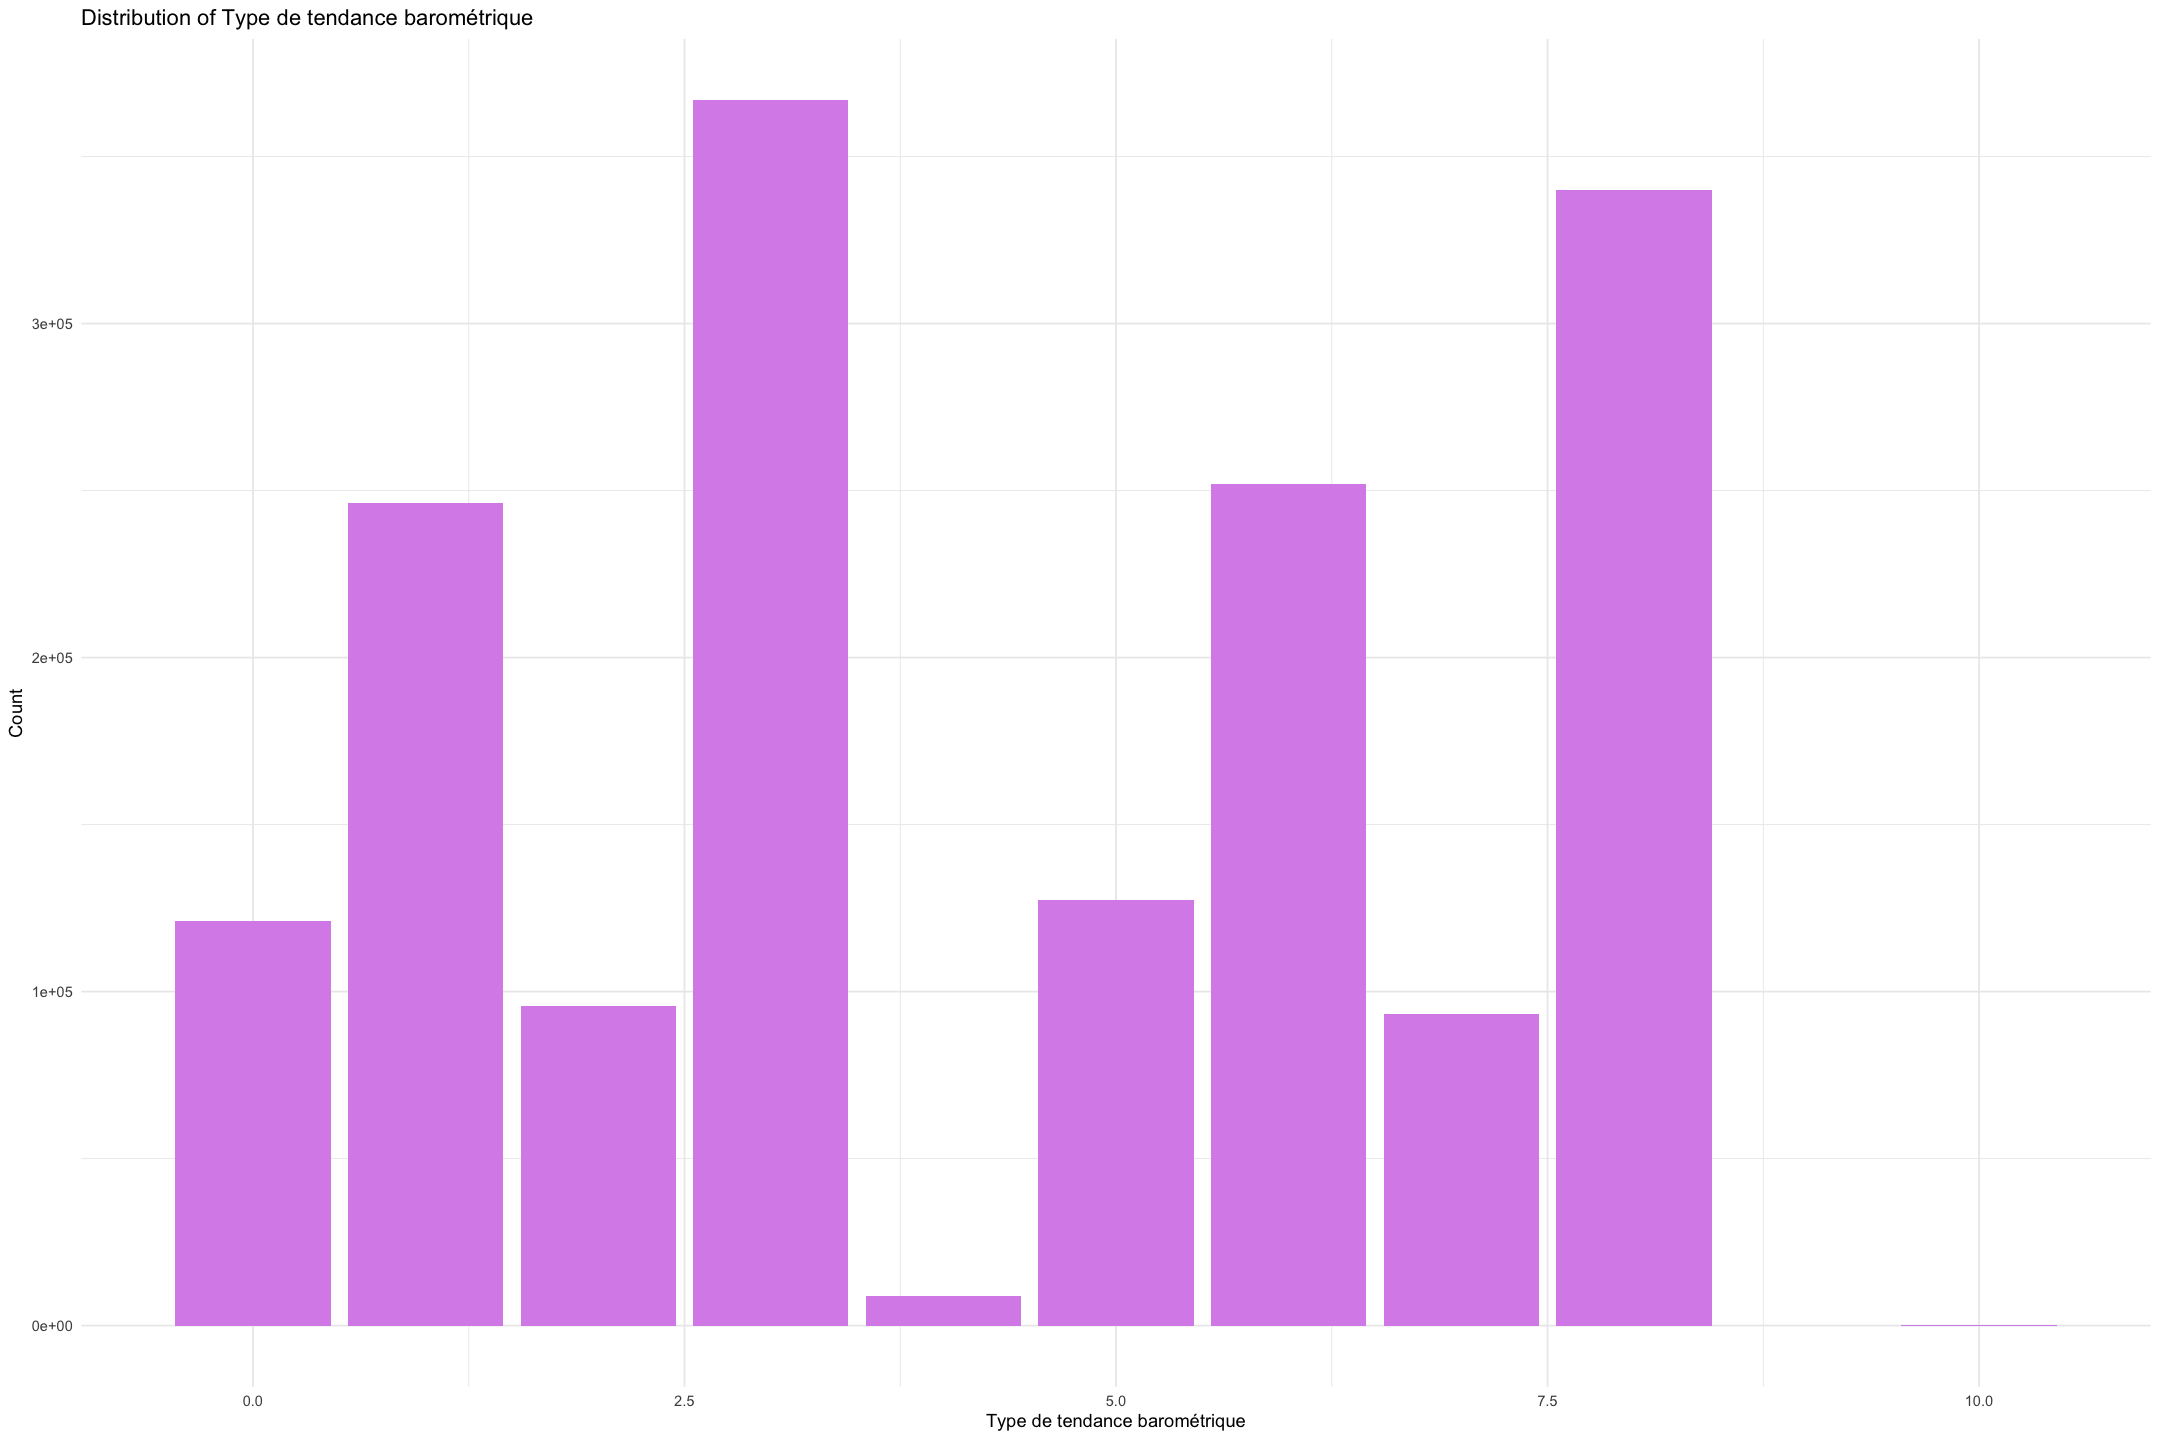

In [8]:
plot_name_distribution <- function(data, column_name) {
  stripped_column = gsub("[[:punct:]]", " ", column_name)
  titlec = paste("Distribution of", stripped_column)

  ggplot(data, aes(x = .data[[column_name]])) +
    geom_bar(fill = "#DA90EA") +
    labs(title = titlec,
         x = stripped_column,
         y = "Count") +
    theme_minimal()
}

plot_name_distribution(full_data, "Type.de.tendance.barométrique")

## Charge le fichier listant toutes les stations 

Fichier généré par CR.ipynb

In [10]:
# hardcoded directories
data_dir <- "./data/"
mesures_dir <-  paste(data_dir, "mesures/", sep="")
stations_csv <- paste(data_dir, "stations.csv", sep="")

stations_df <- read.csv(stations_csv, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=FALSE)

colnames(stations_df)

[1] "ID.OMM.station"    "Nom"               "Coordonnees"      
 [4] "Latitude"          "Longitude"         "Altitude"         
 [7] "communes..name."   "communes..code."   "EPCI..name."      
[10] "EPCI..code."       "department..name." "department..code."
[13] "region..name."     "region..code."

## Répartition des stations sur une carte du monde

[1] "sf"         "data.frame"

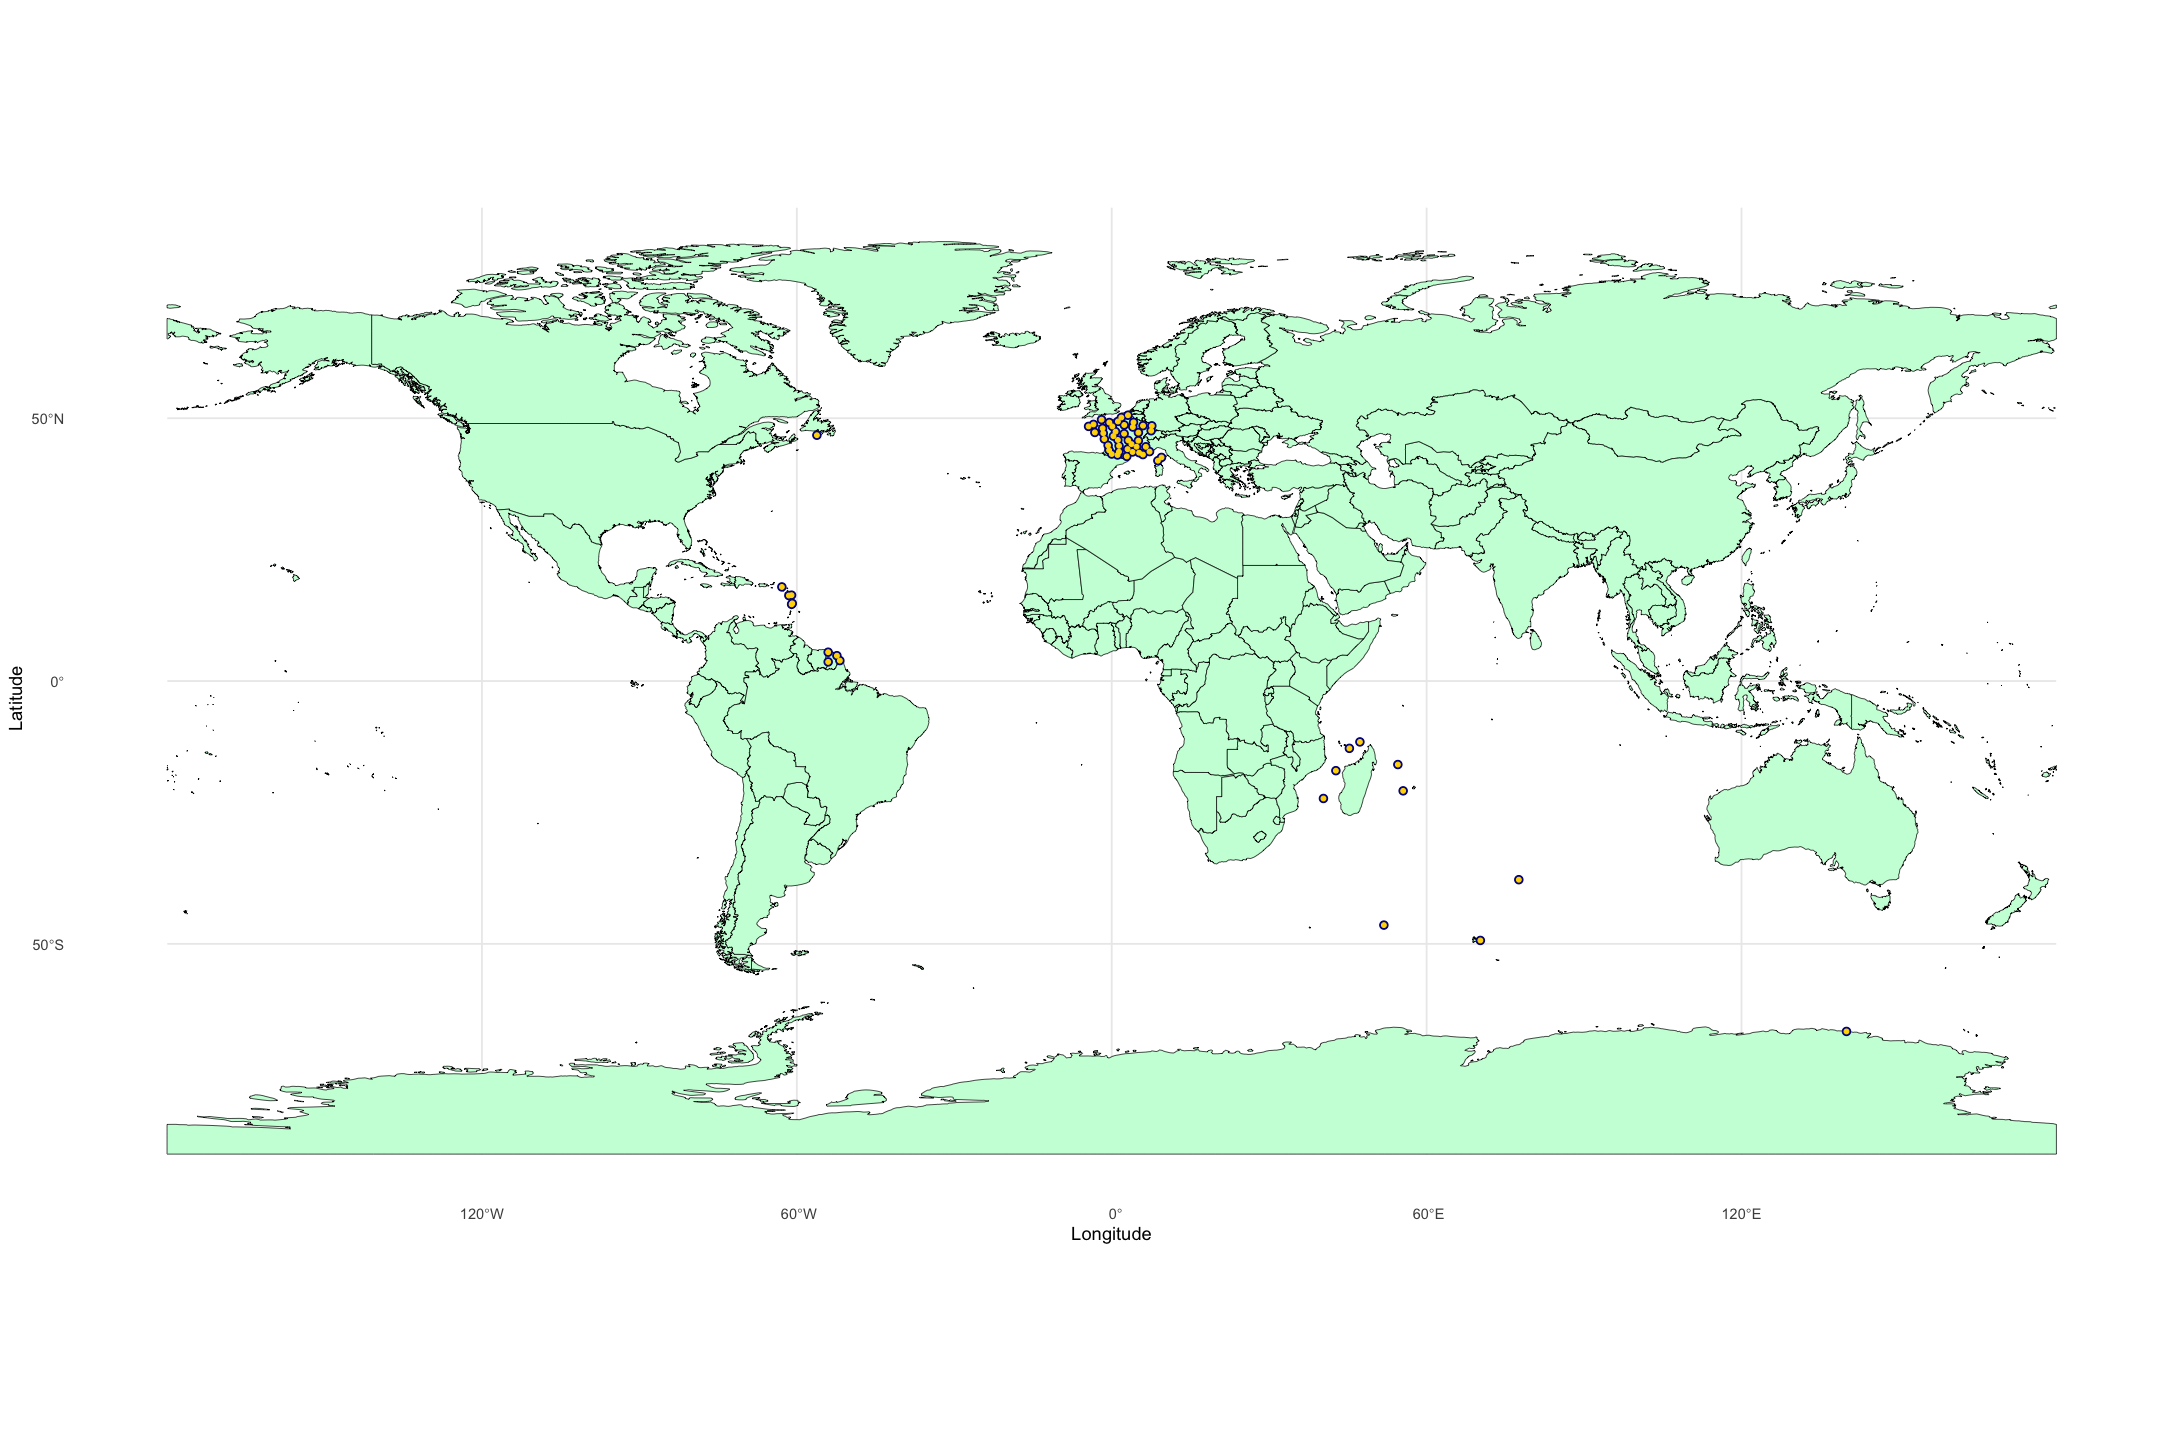

In [11]:
worldmap <- ne_countries(scale = 'medium', type = 'map_units',
                         returnclass = 'sf')
class(worldmap)

# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.
ggplot() +
  geom_sf(data = worldmap, color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df, aes(x = Longitude, y = Latitude), color = "darkblue", size = 2) +
  geom_point(data = stations_df[stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  theme_minimal()

## Répartition des stations sur une carte de France métropolitaine

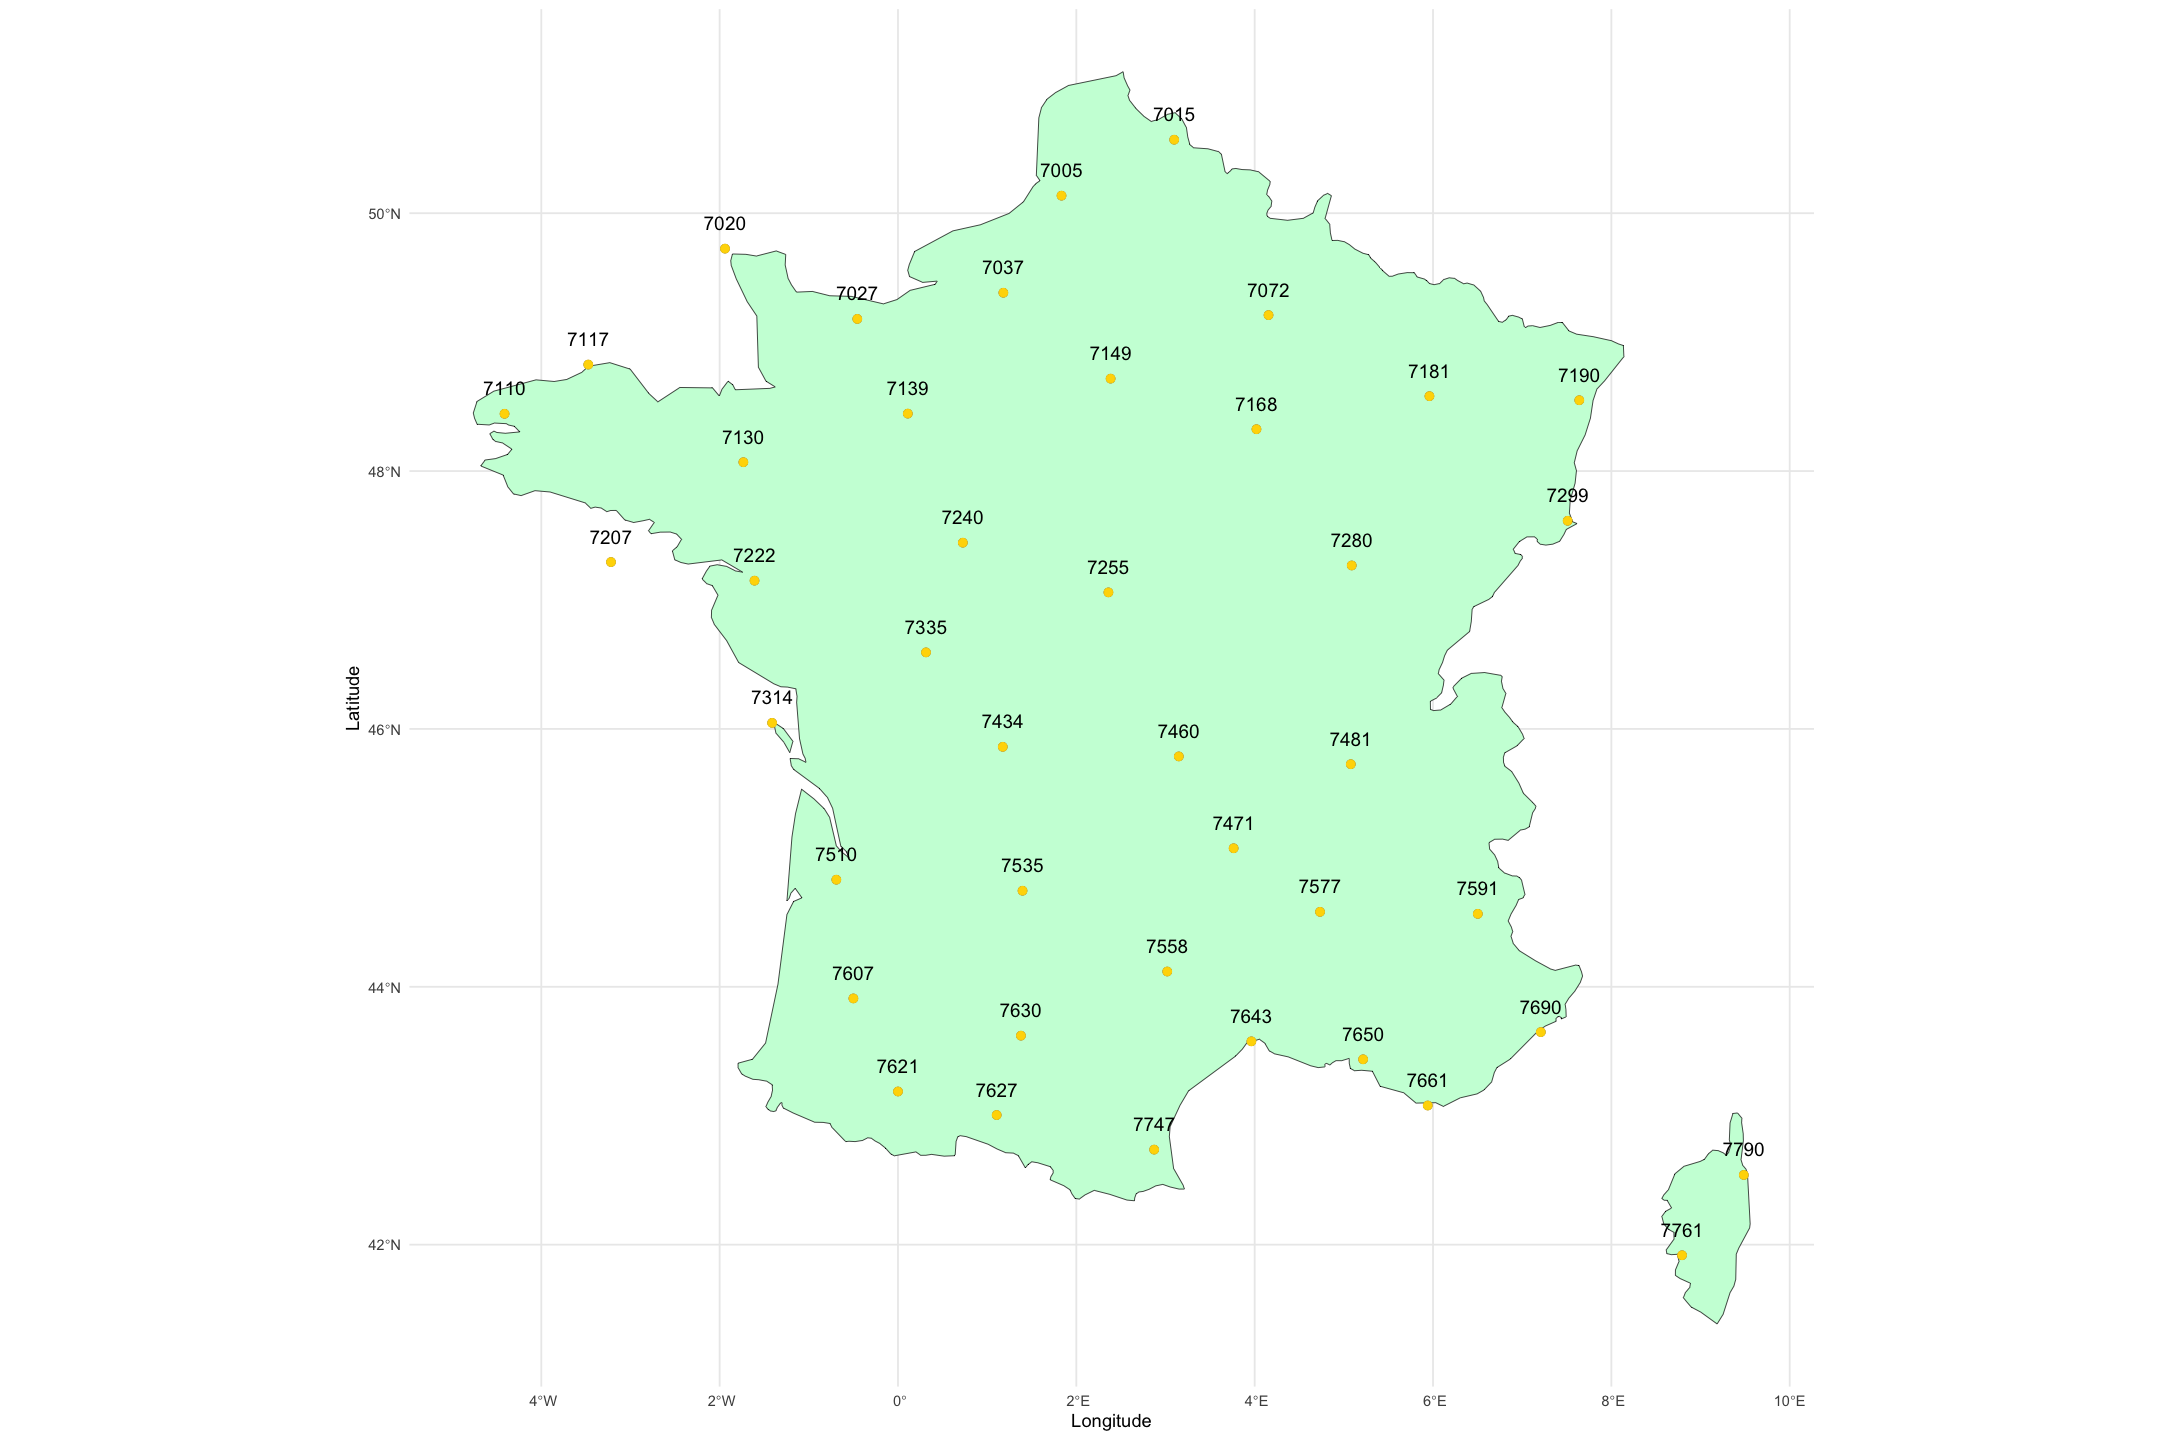

In [12]:
# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.

ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 2) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 2.1) +
  theme_minimal()

 [1]  7181 81405  7627 78894  7020  7280  7015  7110 81408  7222  7240  7747
[13]  7027  7790 78925  7510  7761 61976  7149  7072  7130  7190 61980  7005
[25]  7607  7650  7207  7335  7168  7643 78897  7535  7139  7690 78922 61998
[37] 89642  7471  7591 81415  7481  7558  7630 81401  7661  7577  7314  7037
[49] 61996  7434 61968 61972  7621  7460  7117 71805 61997 67005  7299  7255
[61] 78890 61970
[1] "7117" "7299" "7558" "7510"


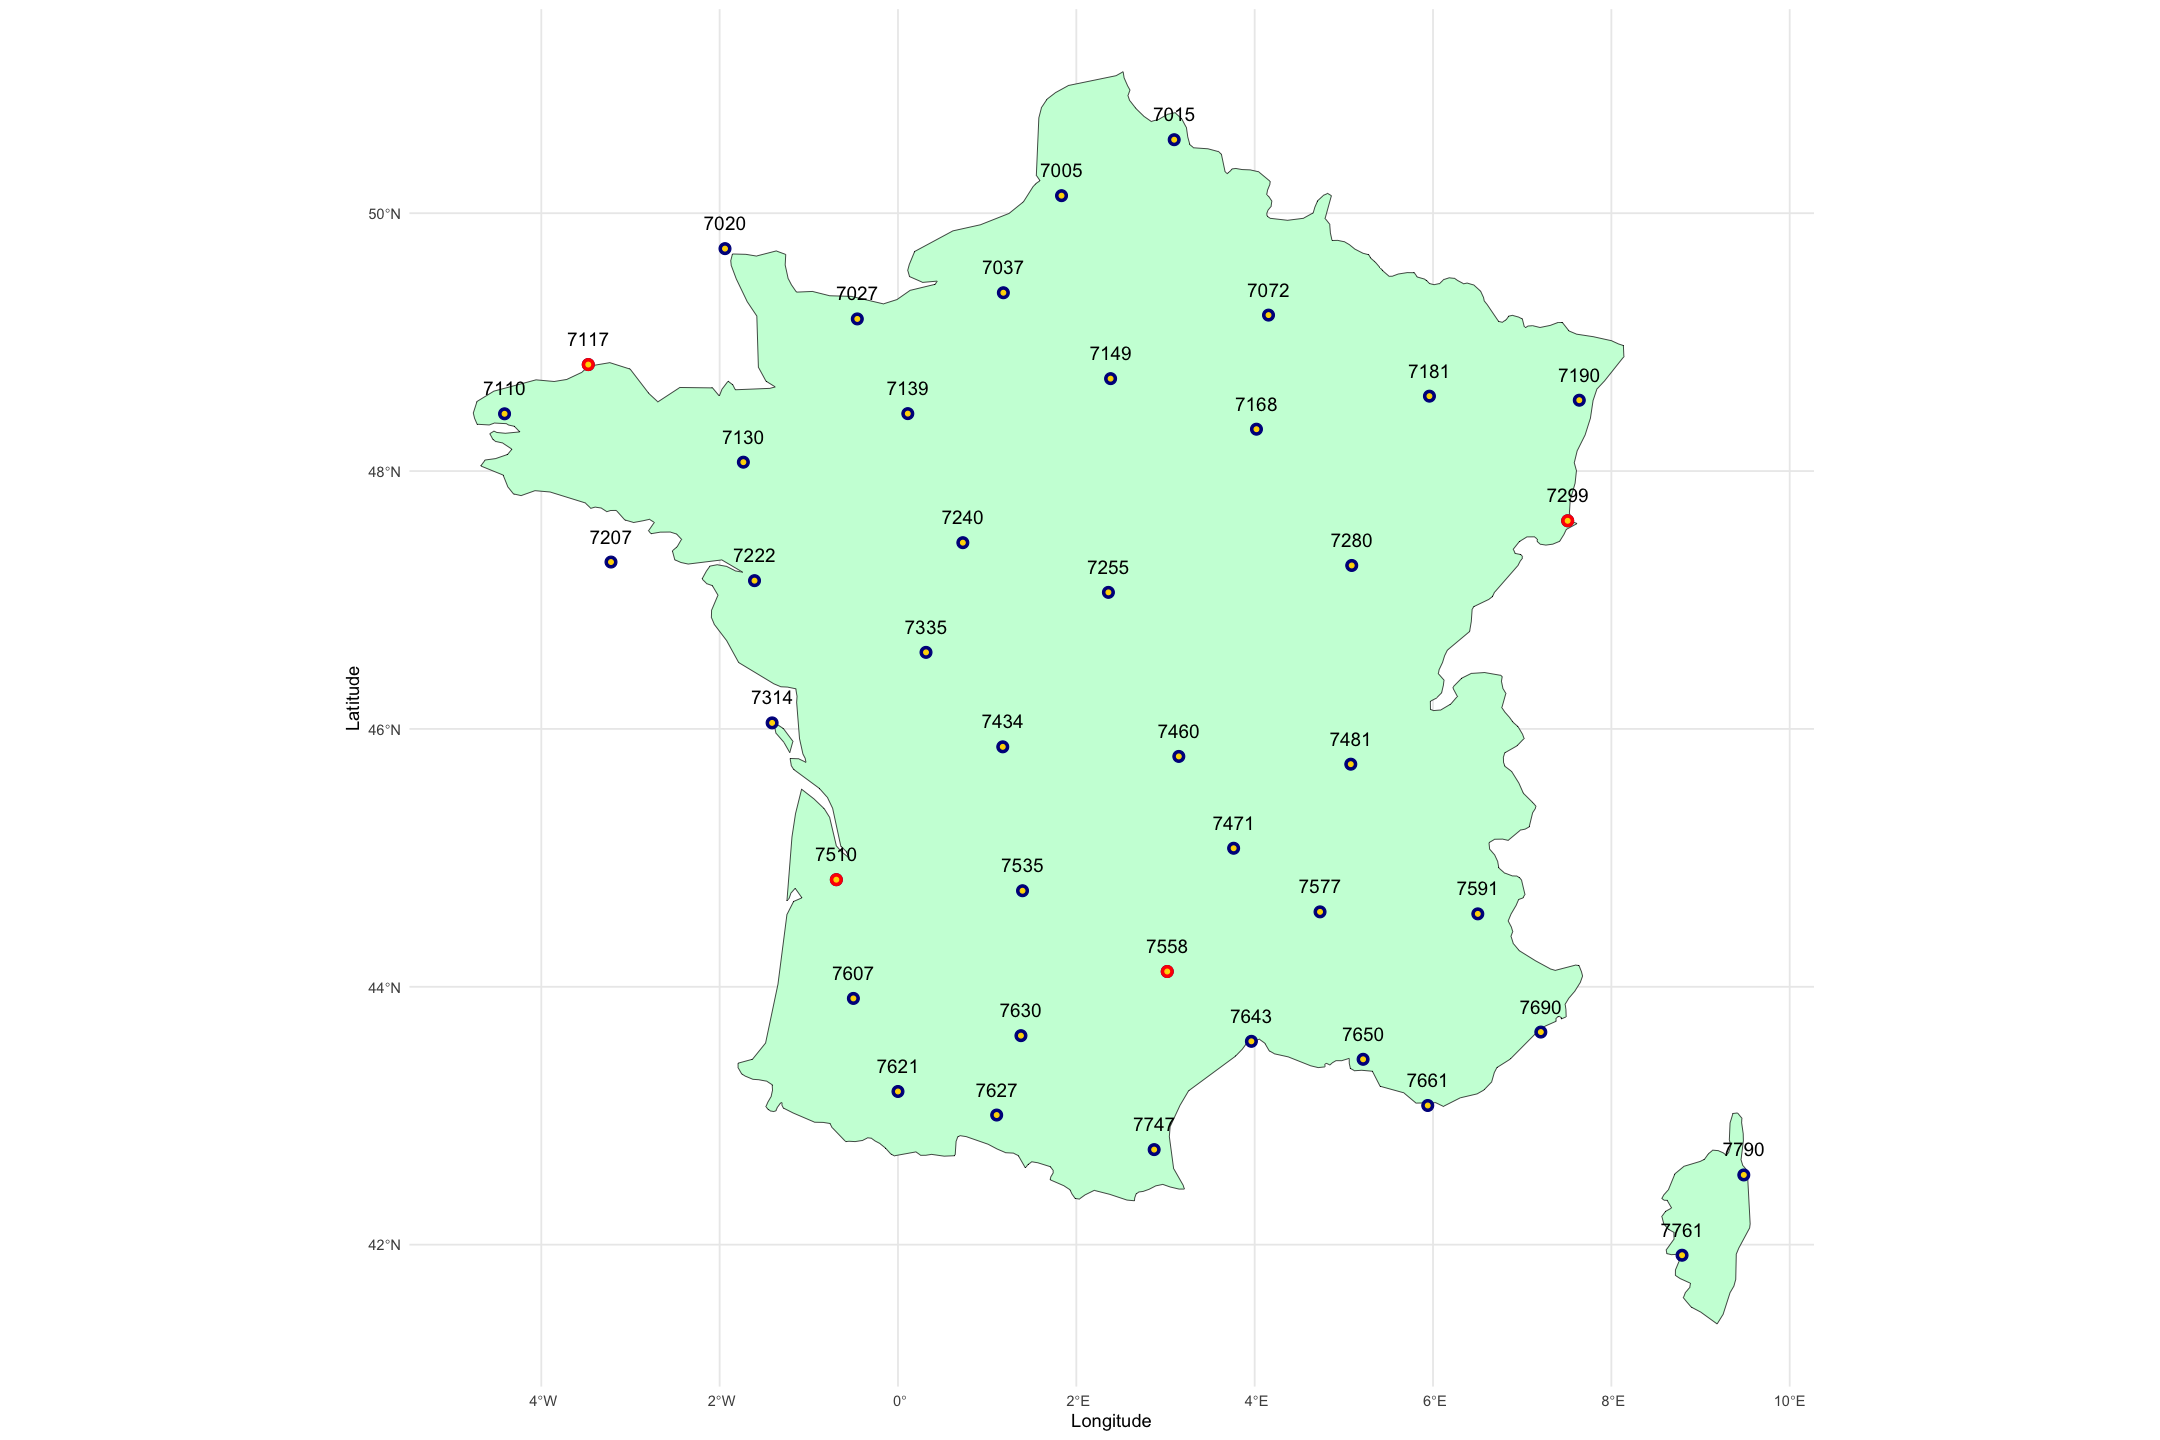

In [13]:
# sélectionne 4 stations à afficher sur les graphes
chosen_stations = c("7117", "7299", "7558", "7510")
for(station in chosen_stations){
  if(!(station %in% stations_in_file)){
    msg = glue("station {station} not in file ! replace it in the definition of chosen_station.")
    print(msg)
  }
}
print(stations_in_file)
print(chosen_stations)

# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.
# en rouge, une les stations SÉLECTIONNÉES

ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% chosen_stations, ], 
            aes(x = Longitude, y = Latitude), 
            color = "red", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  theme_minimal()

## Fonction utiles

In [14]:
cboxplot <- function(xs, title, legx, legy){
    my_colors <- c("#FFA500", "#008000", "#1E90FF", "#FF1493")
    tryCatch(
        {
            par(bg = 'white')
            boxplot(xs, xlab = legx, ylab = legy, las = 1, col = my_colors)
            grid()
        },
        error=function(e) {
            message('An error occurred (in histogram function)')
            print("with title")
            print(e)
        })
}

In [15]:
# Return columns required, with only the rows related to chosen_stations.
ColumnSelector <- function(columns, chosen_stations){
    return( select(full_data %>% filter(ID.OMM.station %in% chosen_stations), all_of(columns)) )
}


# take a column and a selectionof stations
# Return a dataframe like
#
#   station1    station2    ...
#     c1_1        c2_1      ...
#     c1_2        c2_2
#...
ColumnSplitSelector <- function(column, chosen_stations) {
    selections <- list()
    i = 1
    max_length <- 0

    # First pass: find the maximum length
    for (s in chosen_stations) {
        vec <- full_data %>%
            filter(ID.OMM.station == s) %>%
            pull({{column}})
        selections[[i]] <- vec
        max_length <- max(max_length, length(vec))
        i <- i + 1
    }
    # Second pass: pad each vector with NA to max_length
    for (j in seq_along(selections)) {
        if (length(selections[[j]]) < max_length) {
            selections[[j]] <- c(selections[[j]], rep(NA, max_length - length(selections[[j]])))
        }
    }
    # Combine
    df <- do.call(cbind, selections)
    colnames(df) <- chosen_stations
    colnames(df) <- paste("Station", colnames(df), sep = "_")
    return(as.data.frame(df))
}



# histogramme sur sélection auto
autoboxplot <- function(column, chosen_stations){
    titlec = gsub("[[:punct:]]", " ", column)
    df_extract_cs = ColumnSplitSelector(column, chosen_stations)
    #print(df_extract_cs)
    cboxplot(xs = df_extract_cs, titlec, legx = "Selected stations" ,legy = column)
    #title(titlec)
}

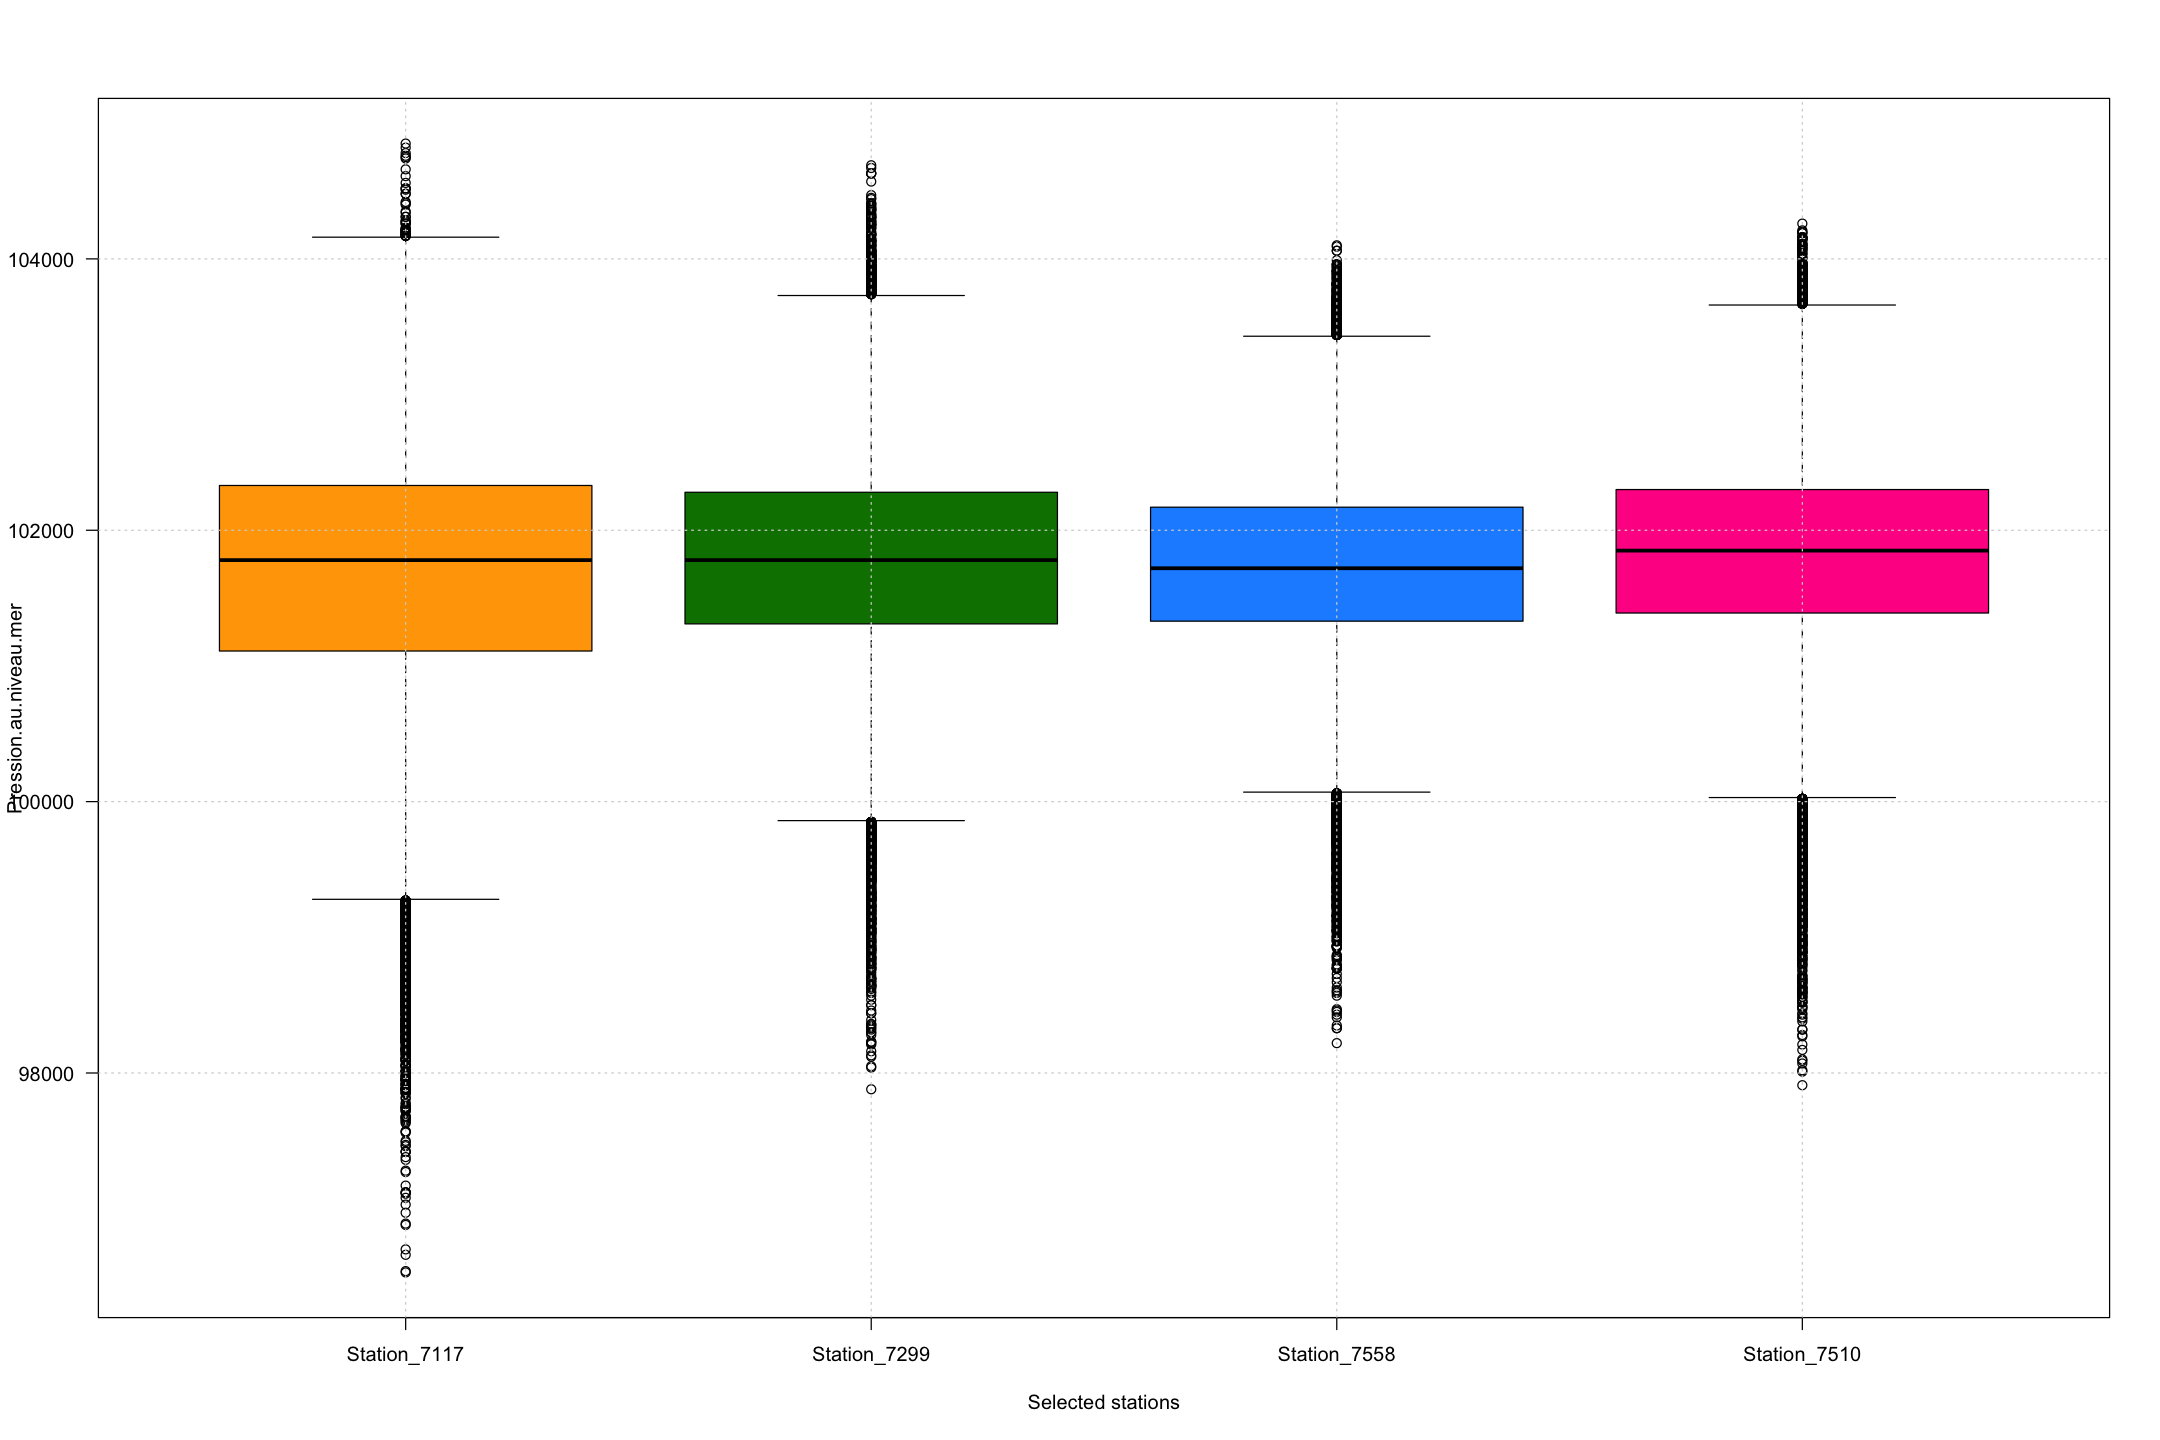

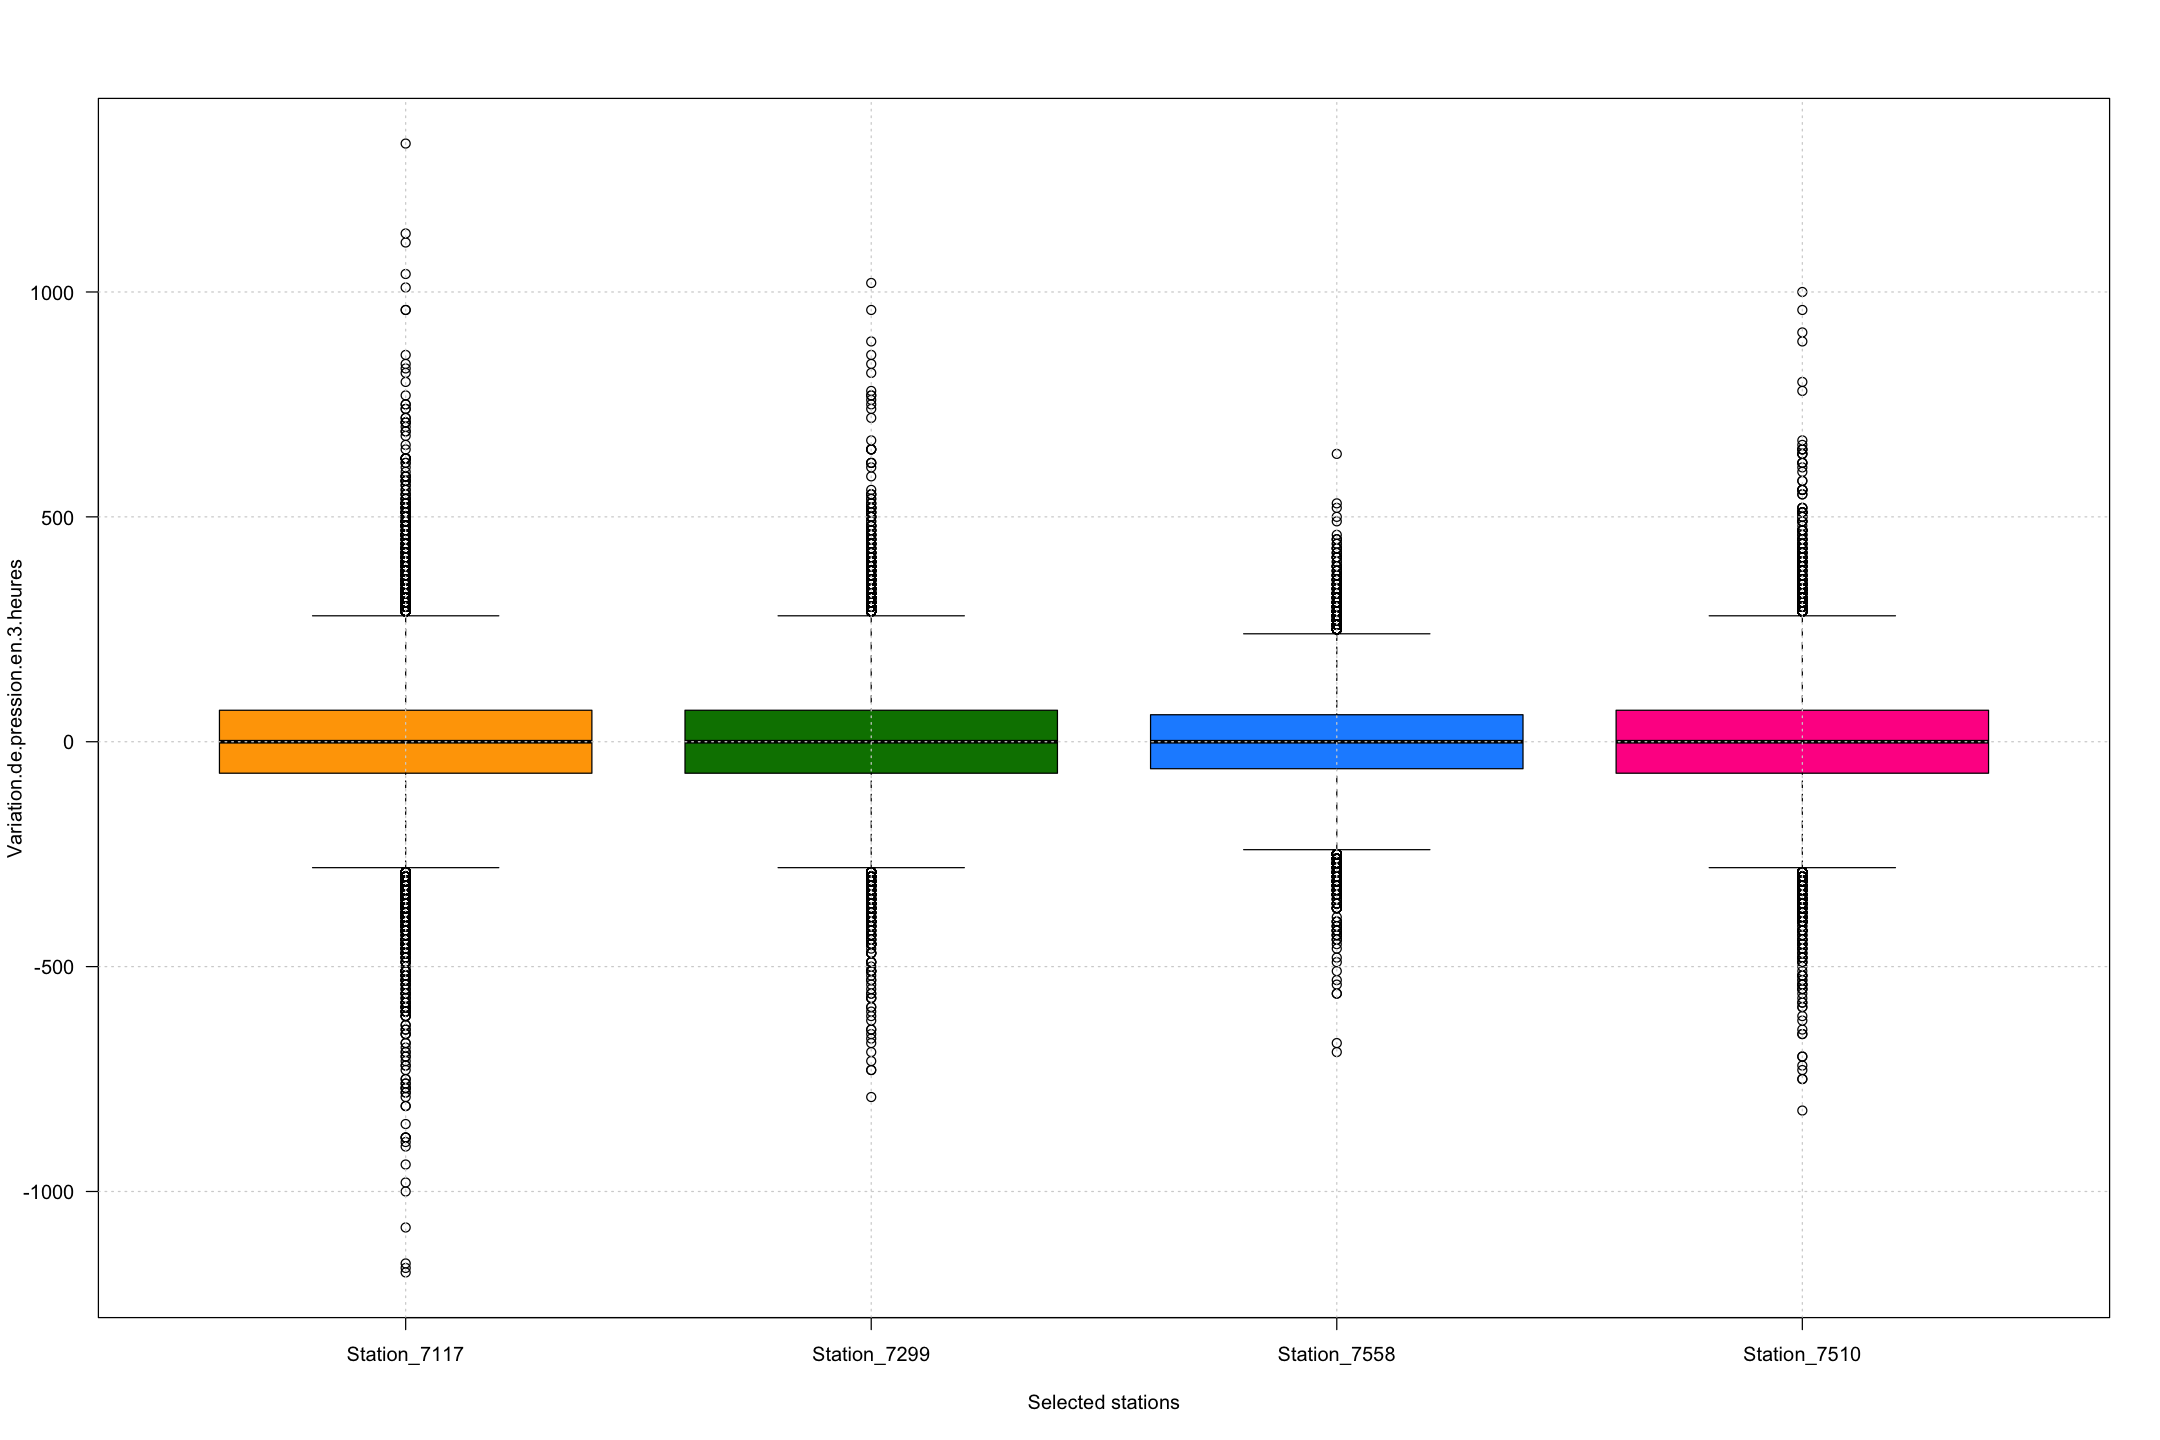

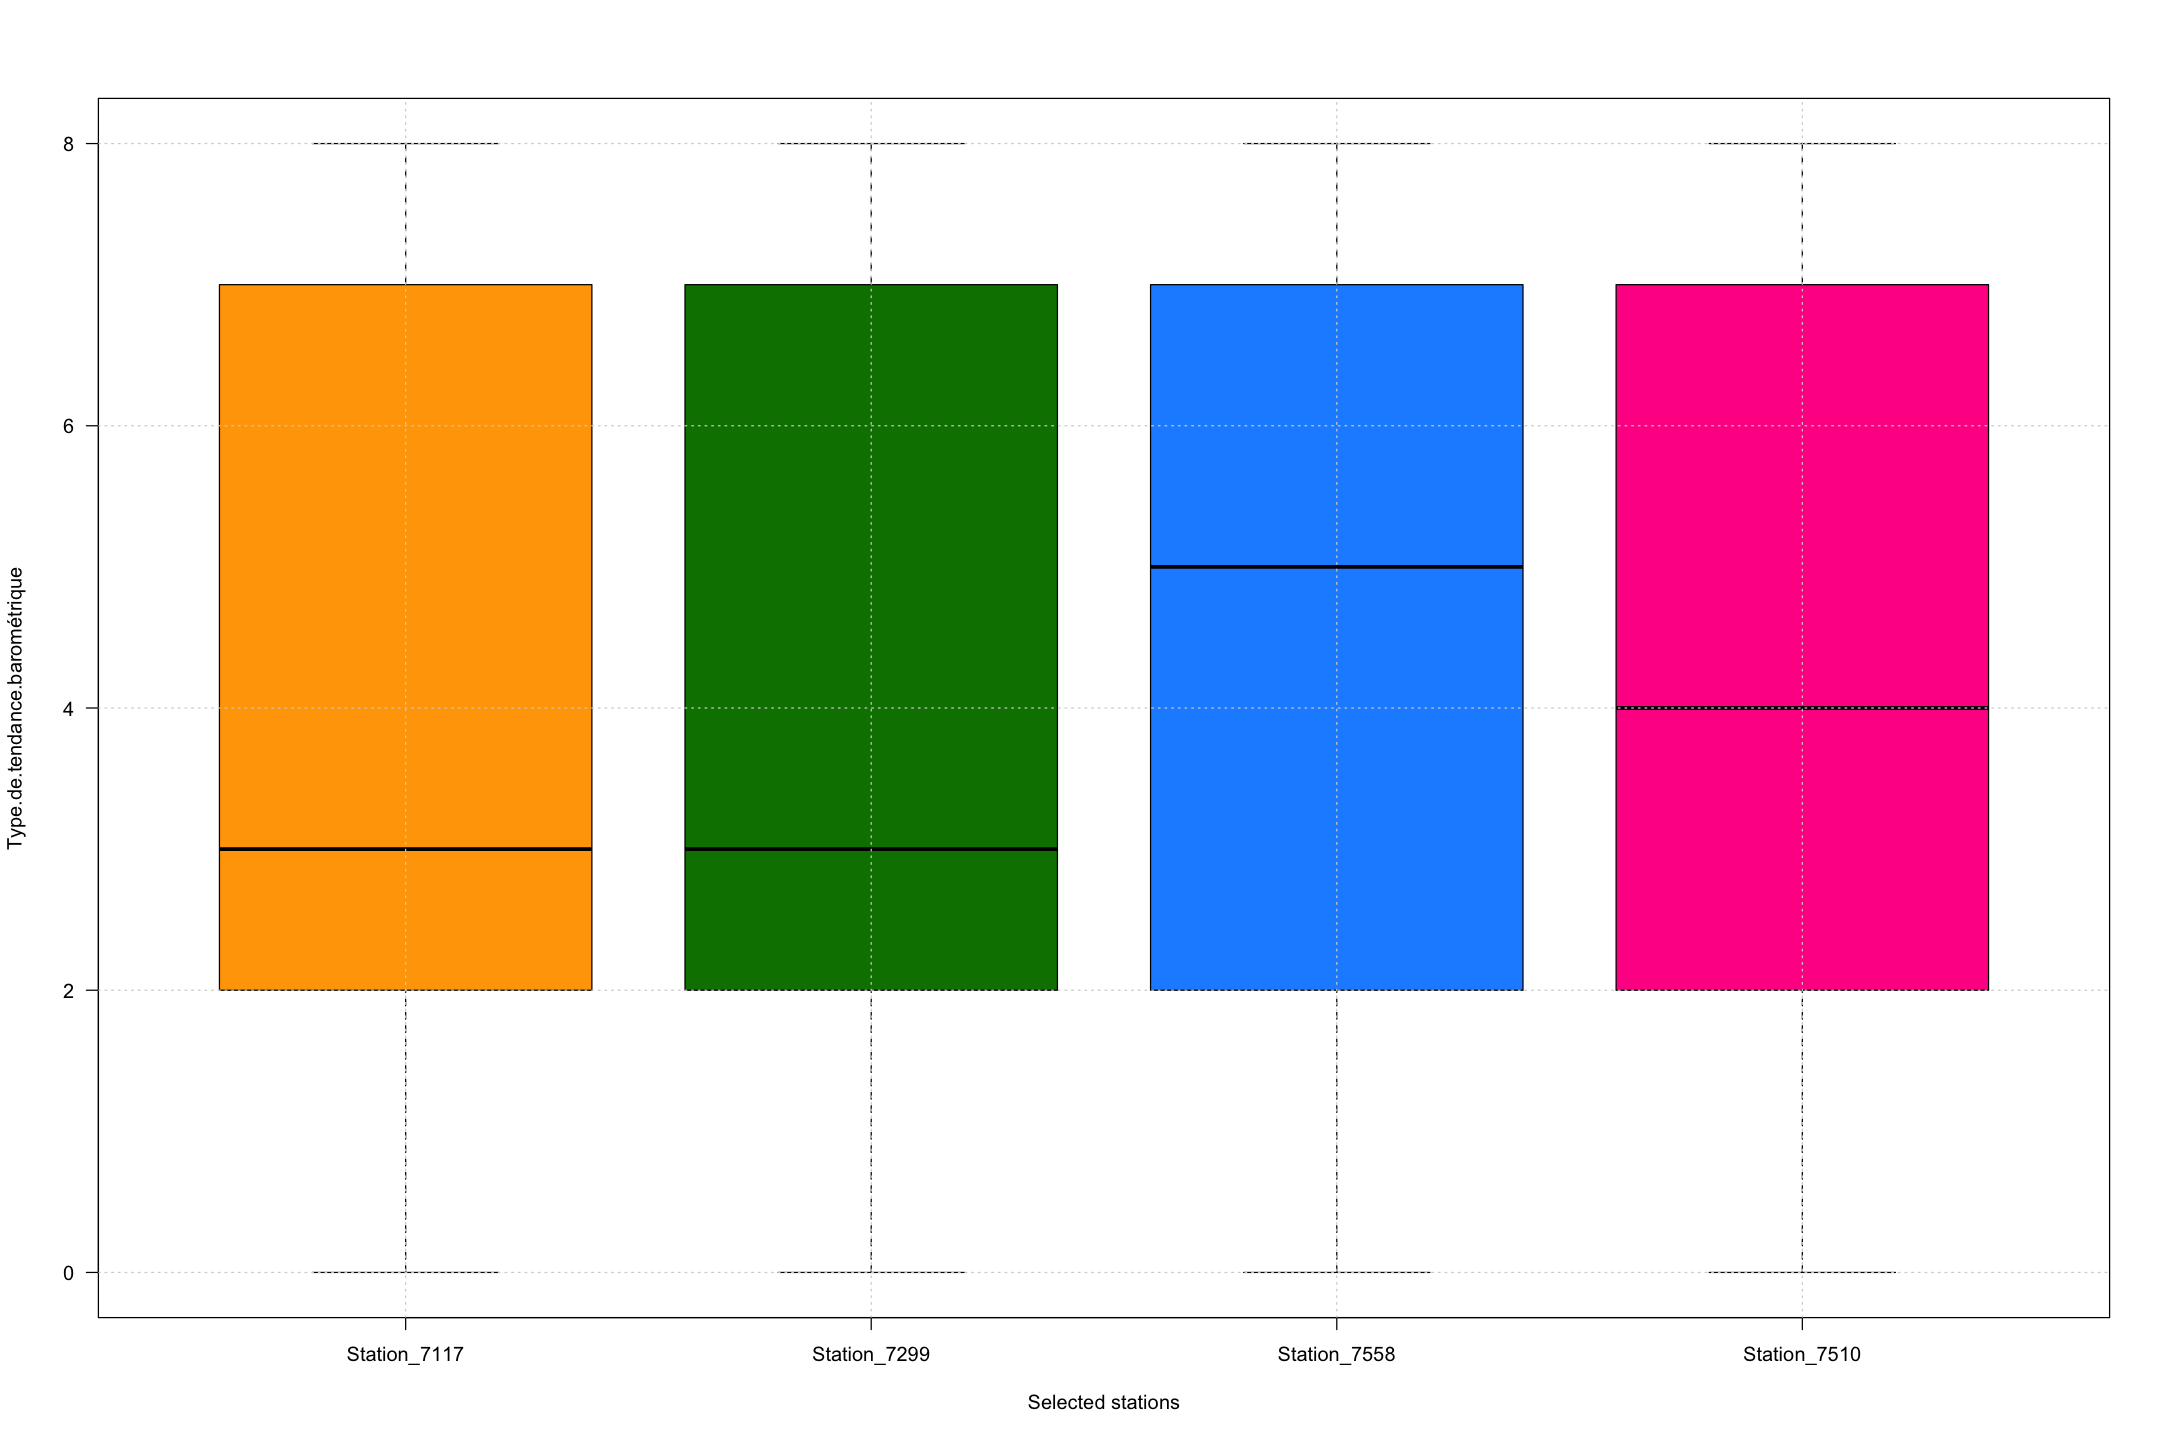

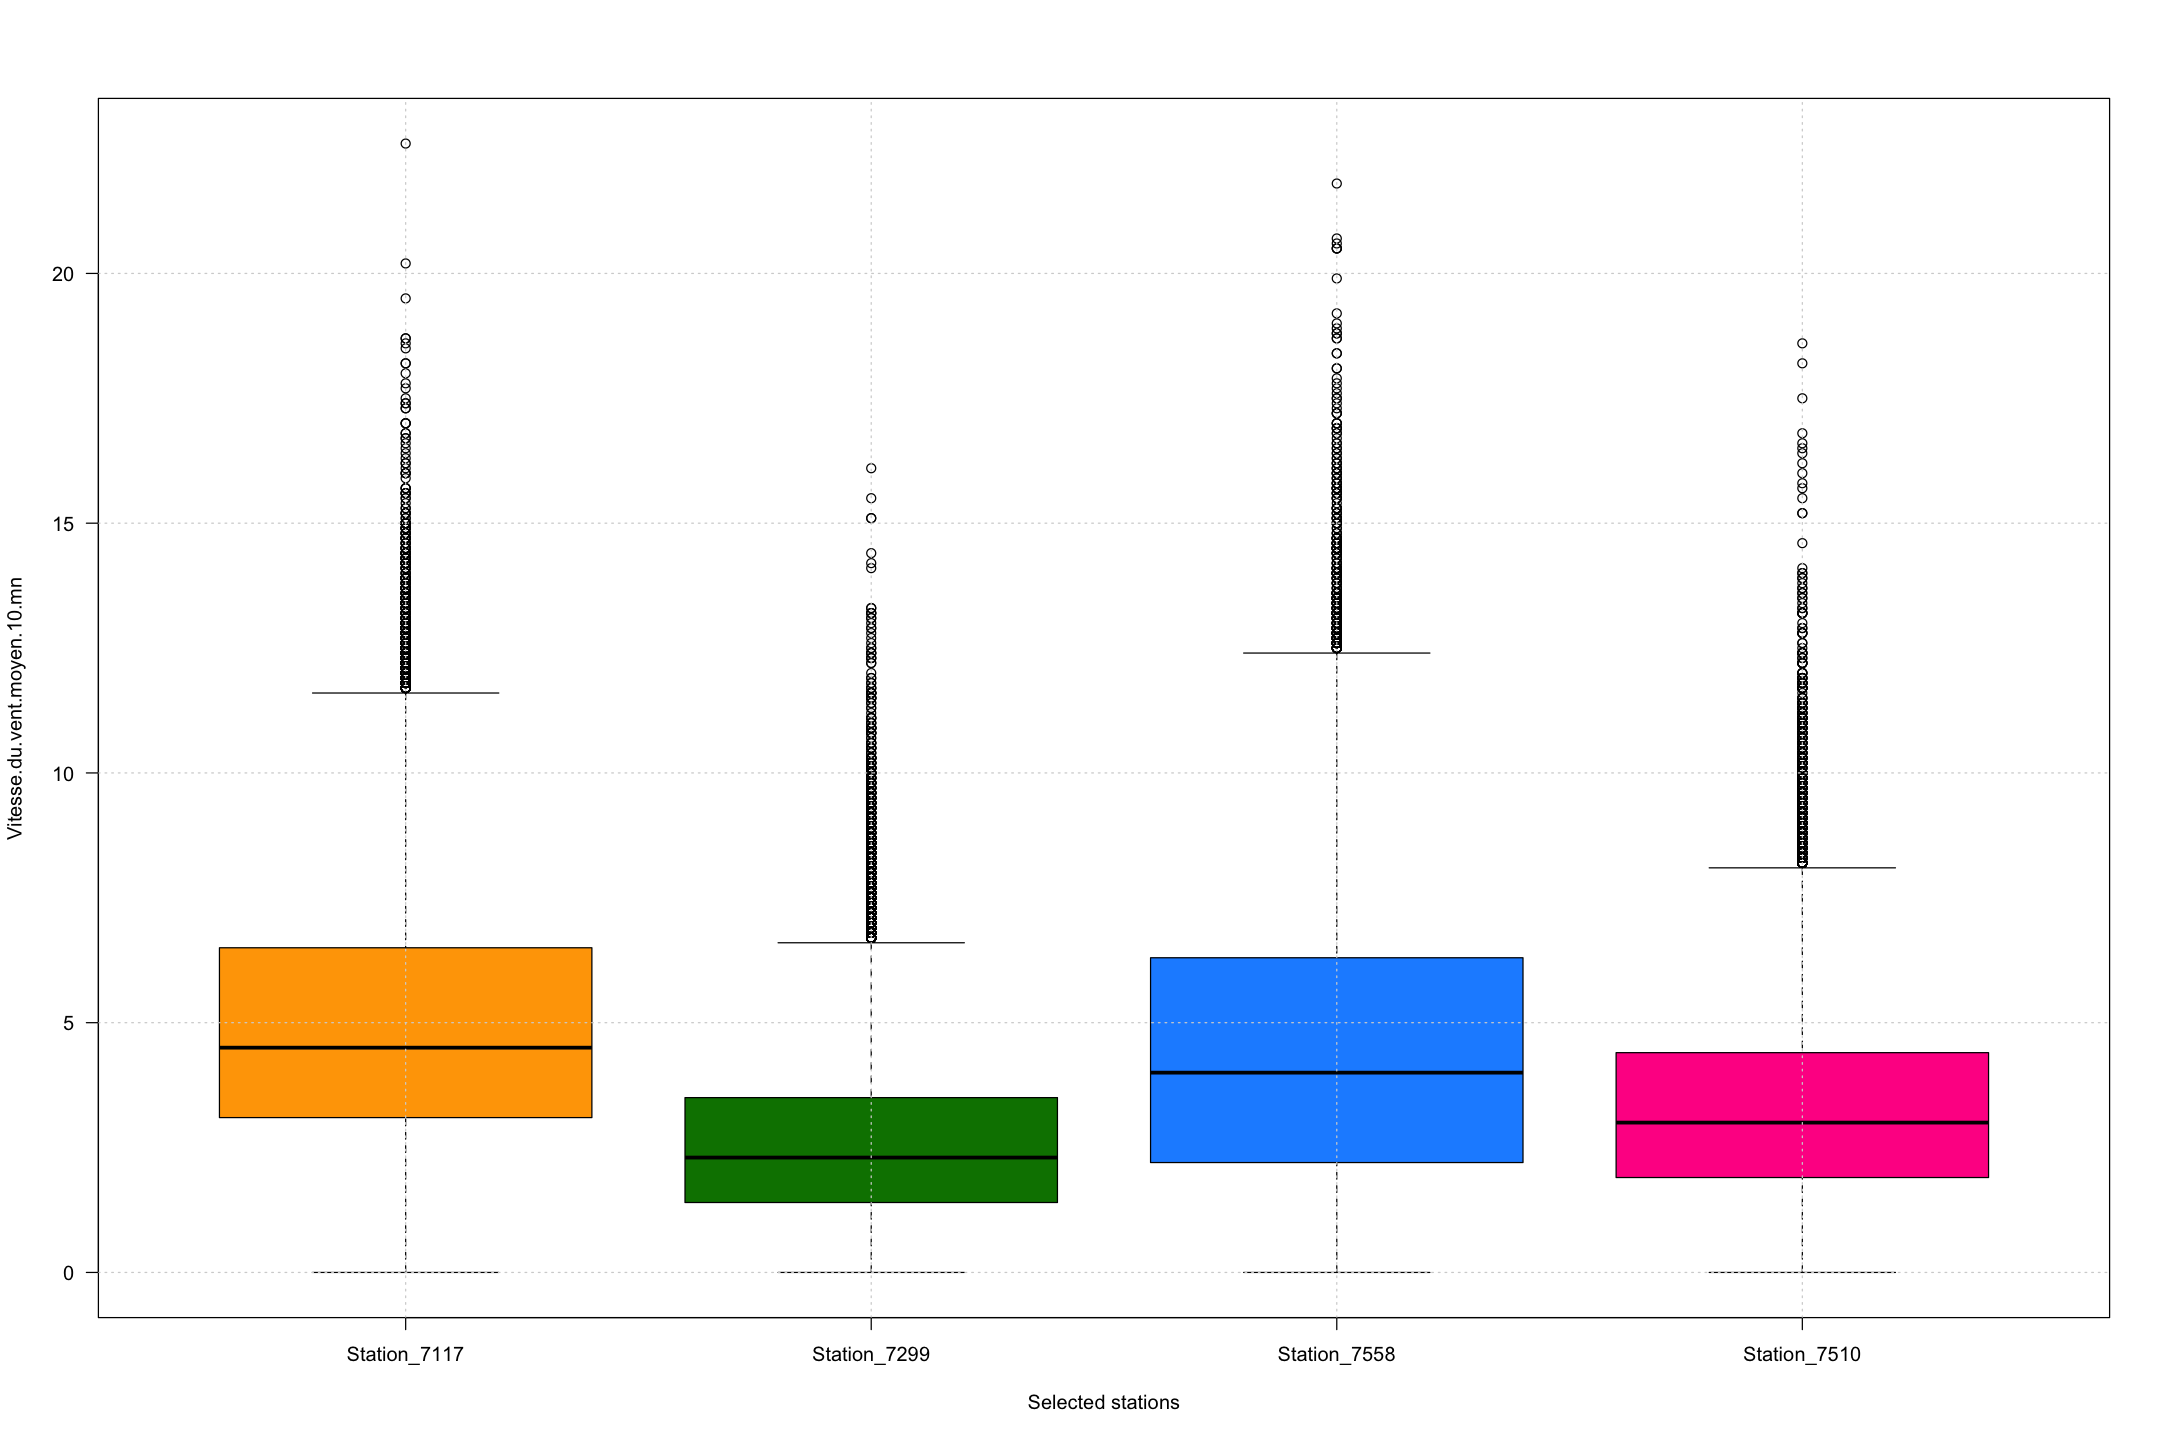

In [16]:
autoboxplot("Pression.au.niveau.mer", chosen_stations)
autoboxplot("Variation.de.pression.en.3.heures", chosen_stations)
autoboxplot("Type.de.tendance.barométrique", chosen_stations)
autoboxplot("Vitesse.du.vent.moyen.10.mn", chosen_stations)

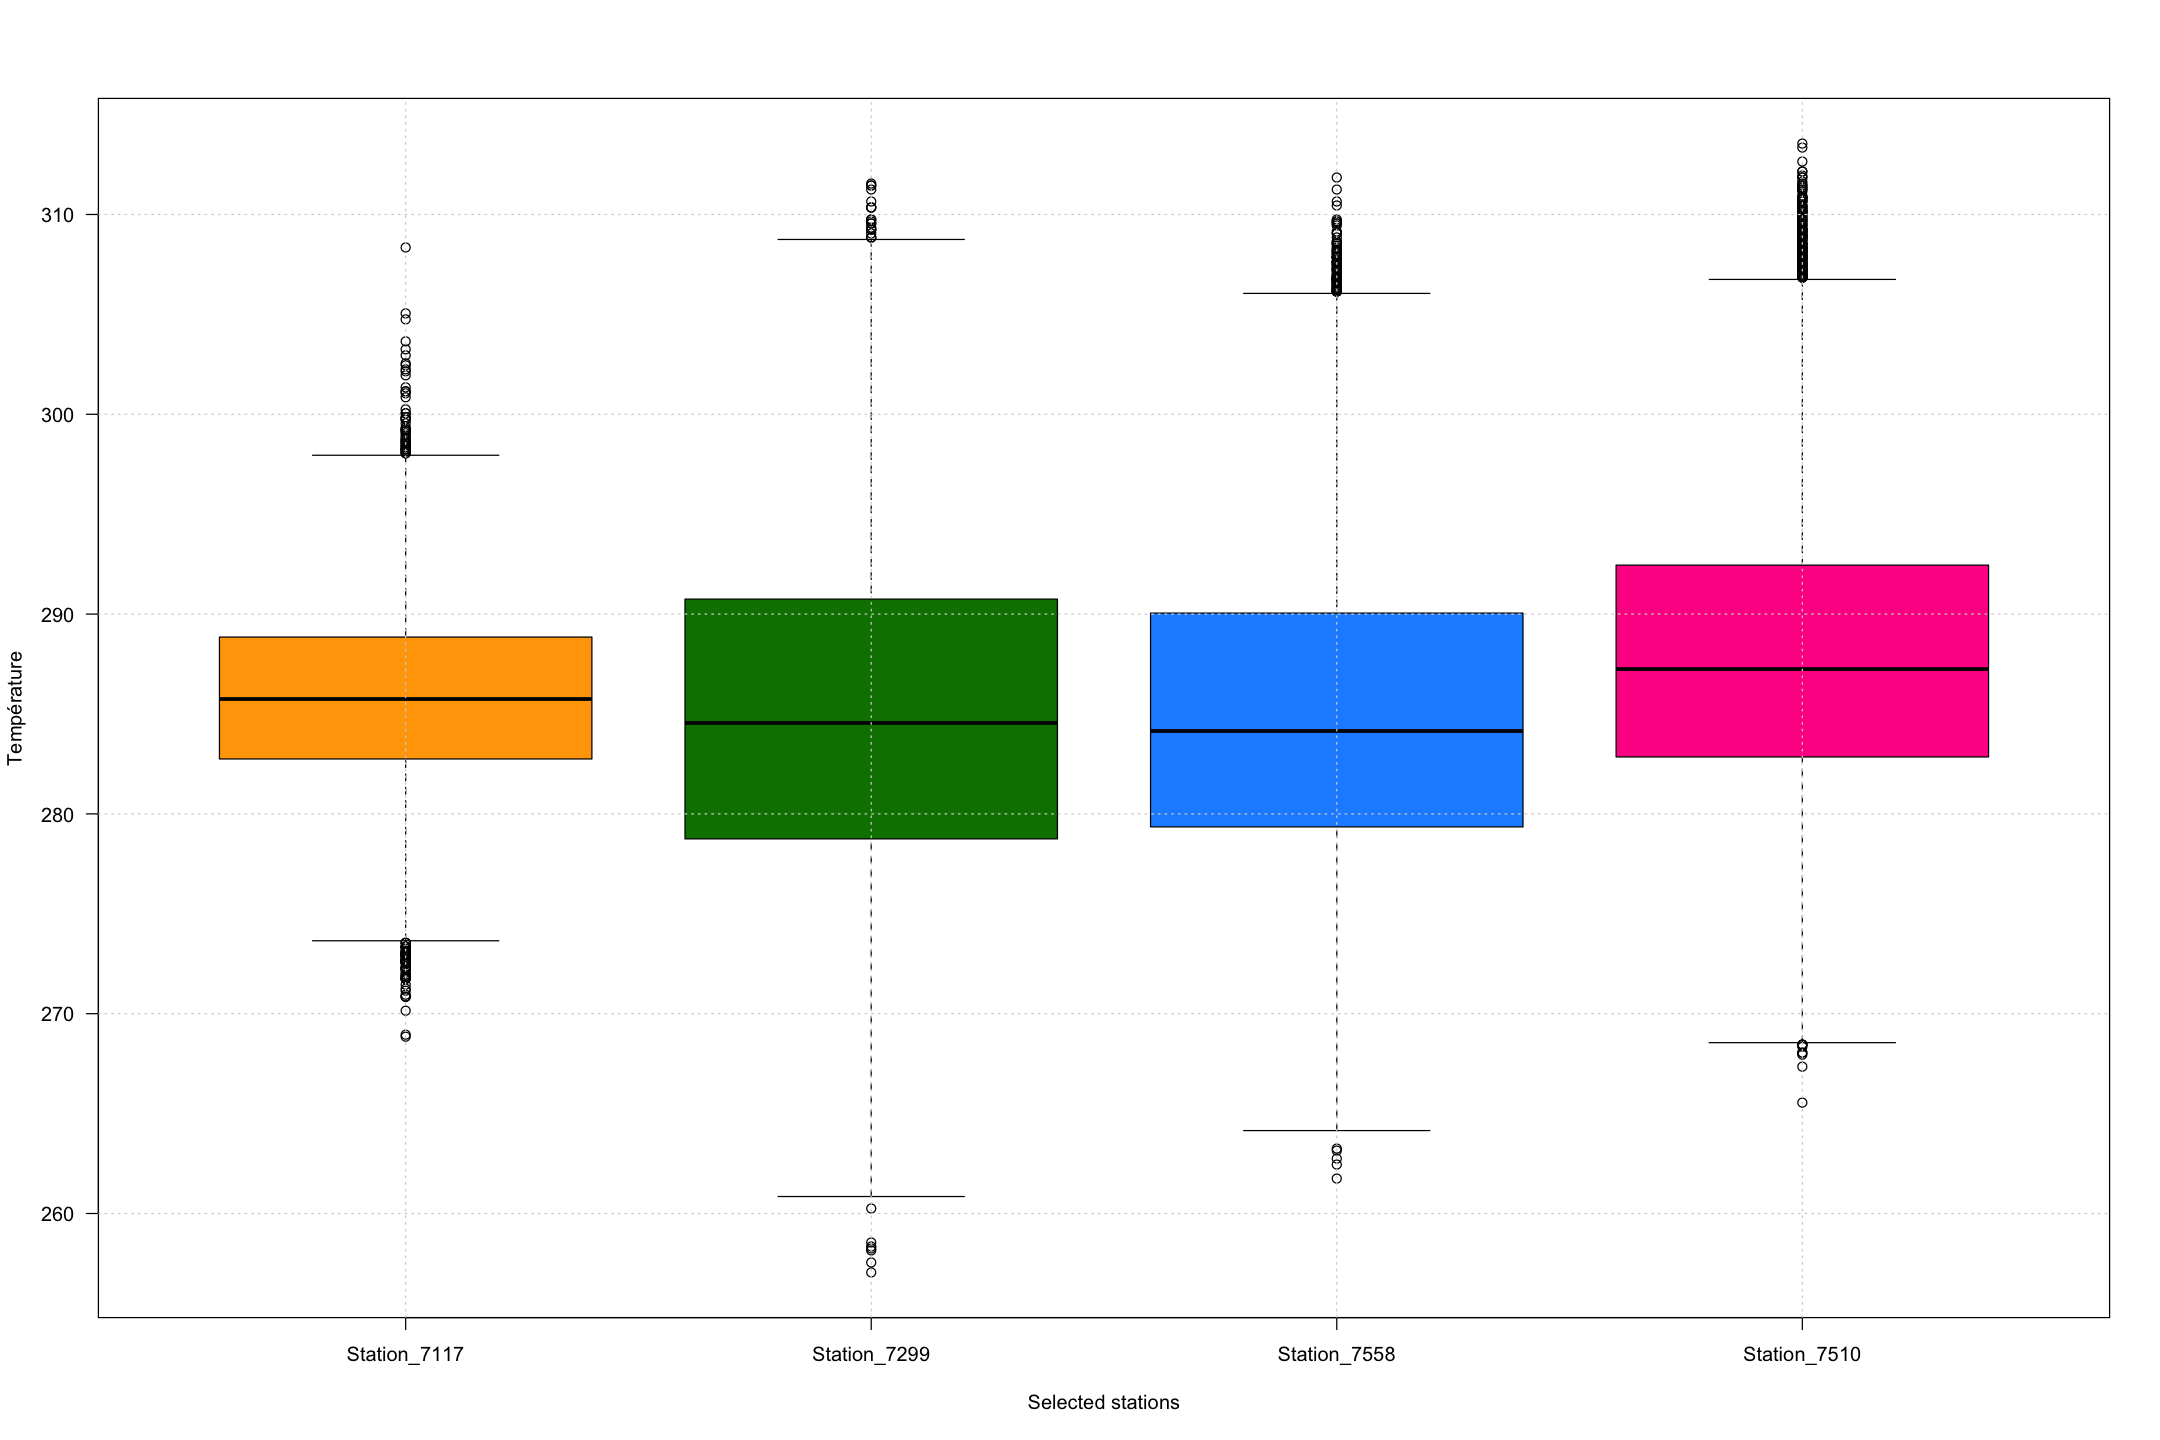

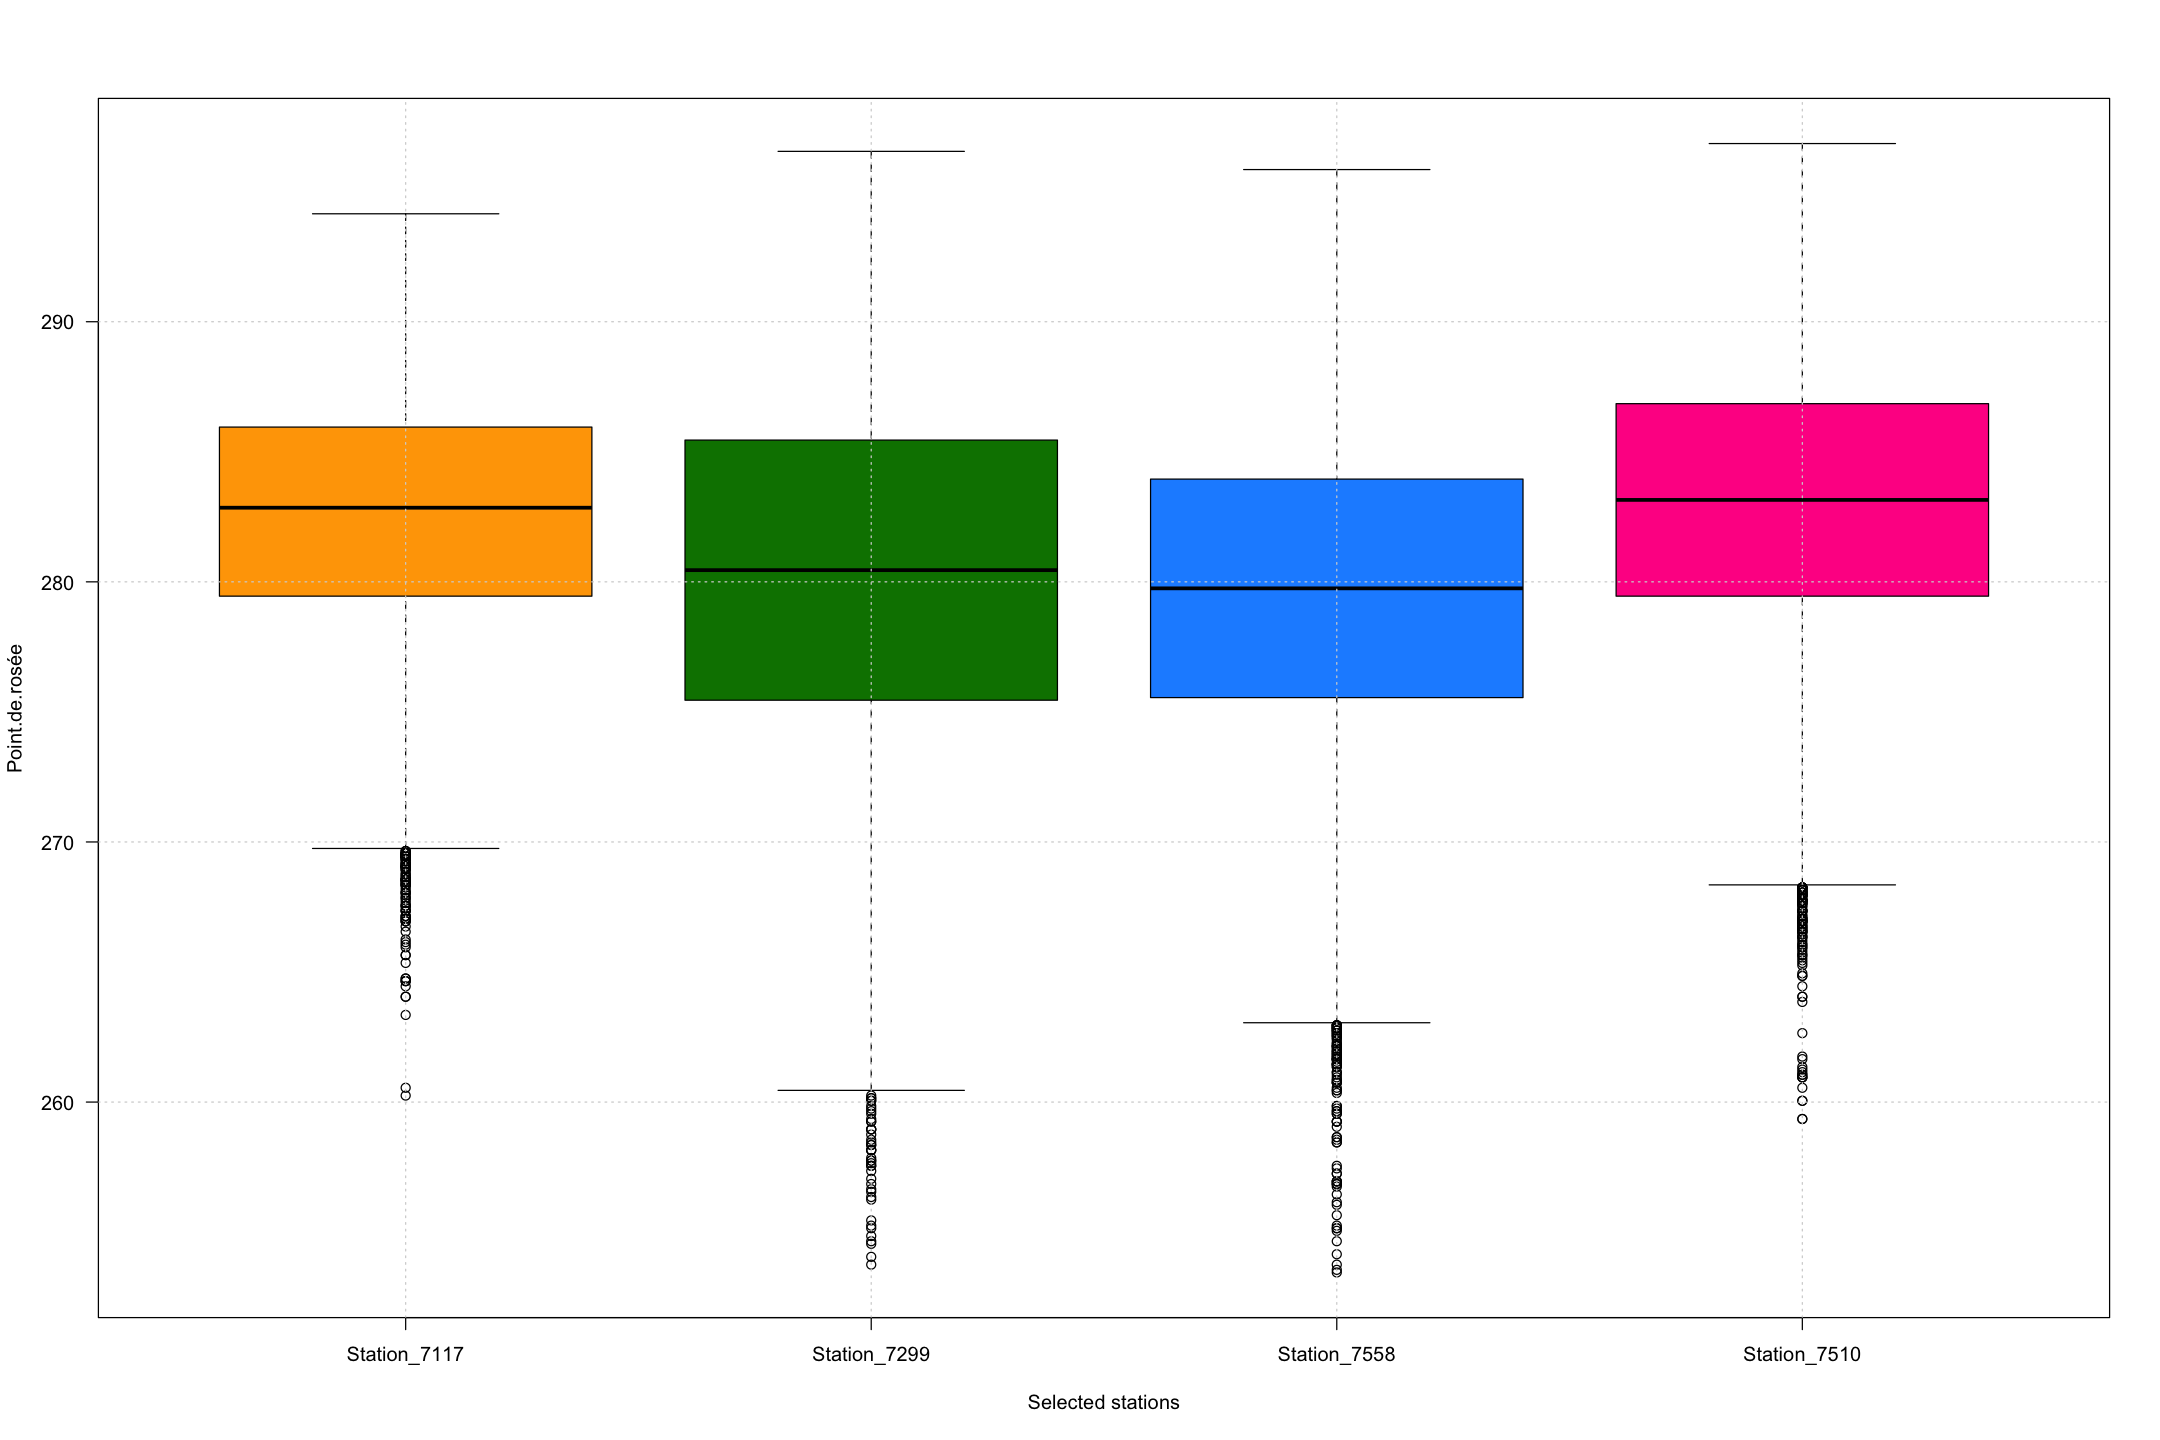

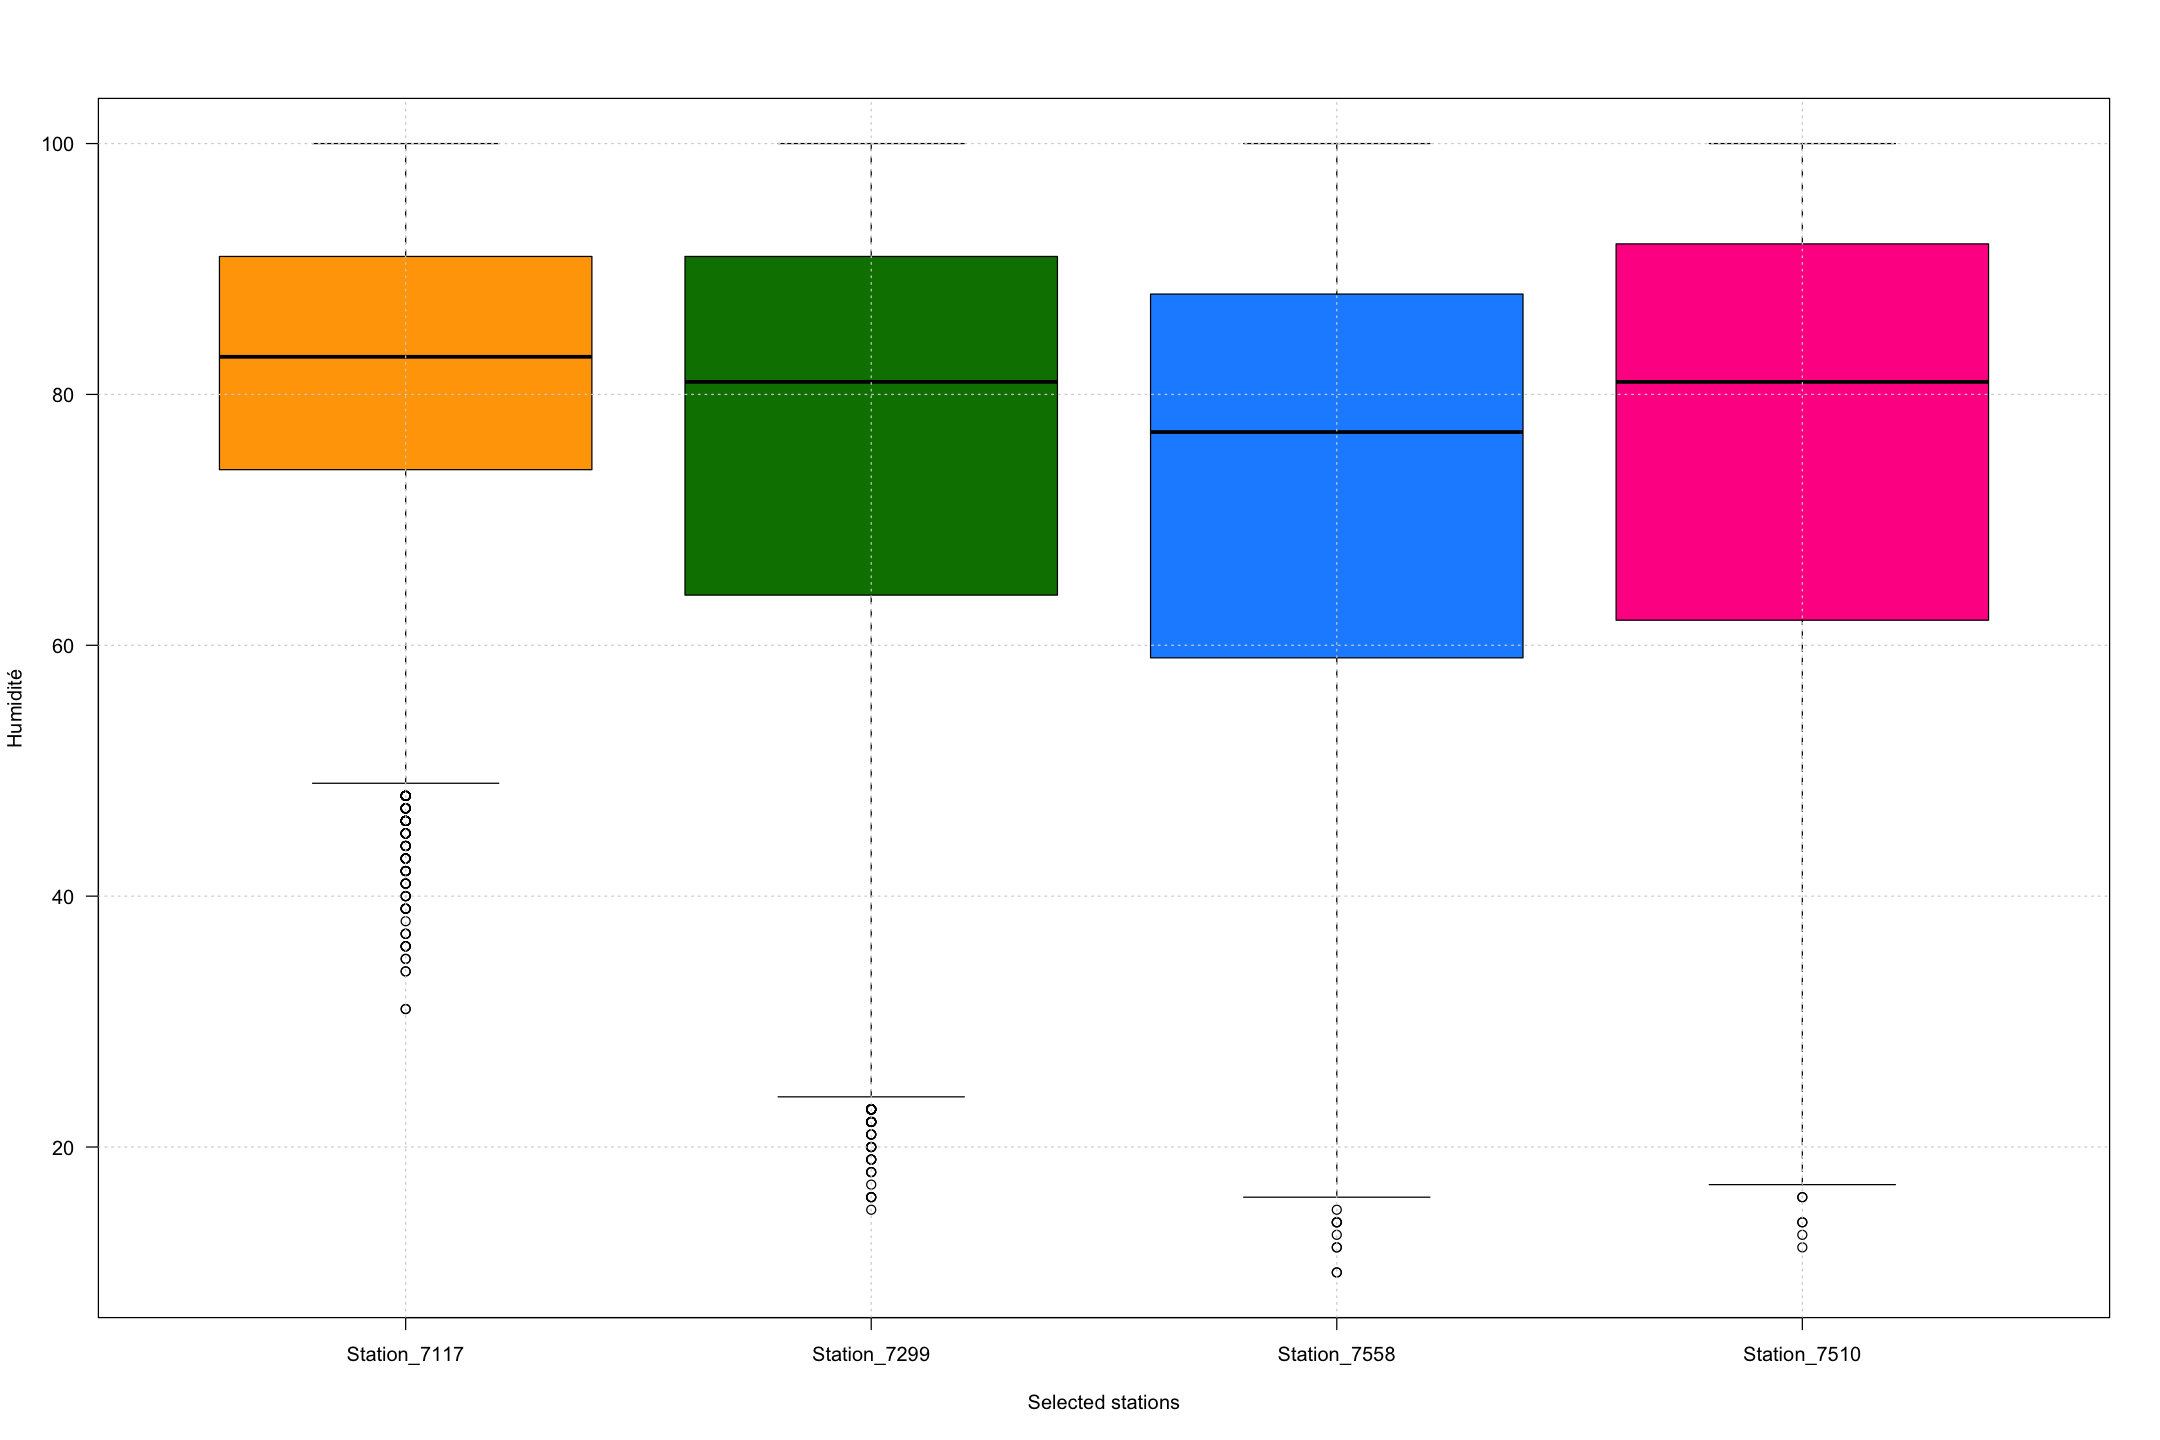

In [17]:
autoboxplot("Température", chosen_stations)
autoboxplot("Point.de.rosée", chosen_stations)
autoboxplot("Humidité", chosen_stations)

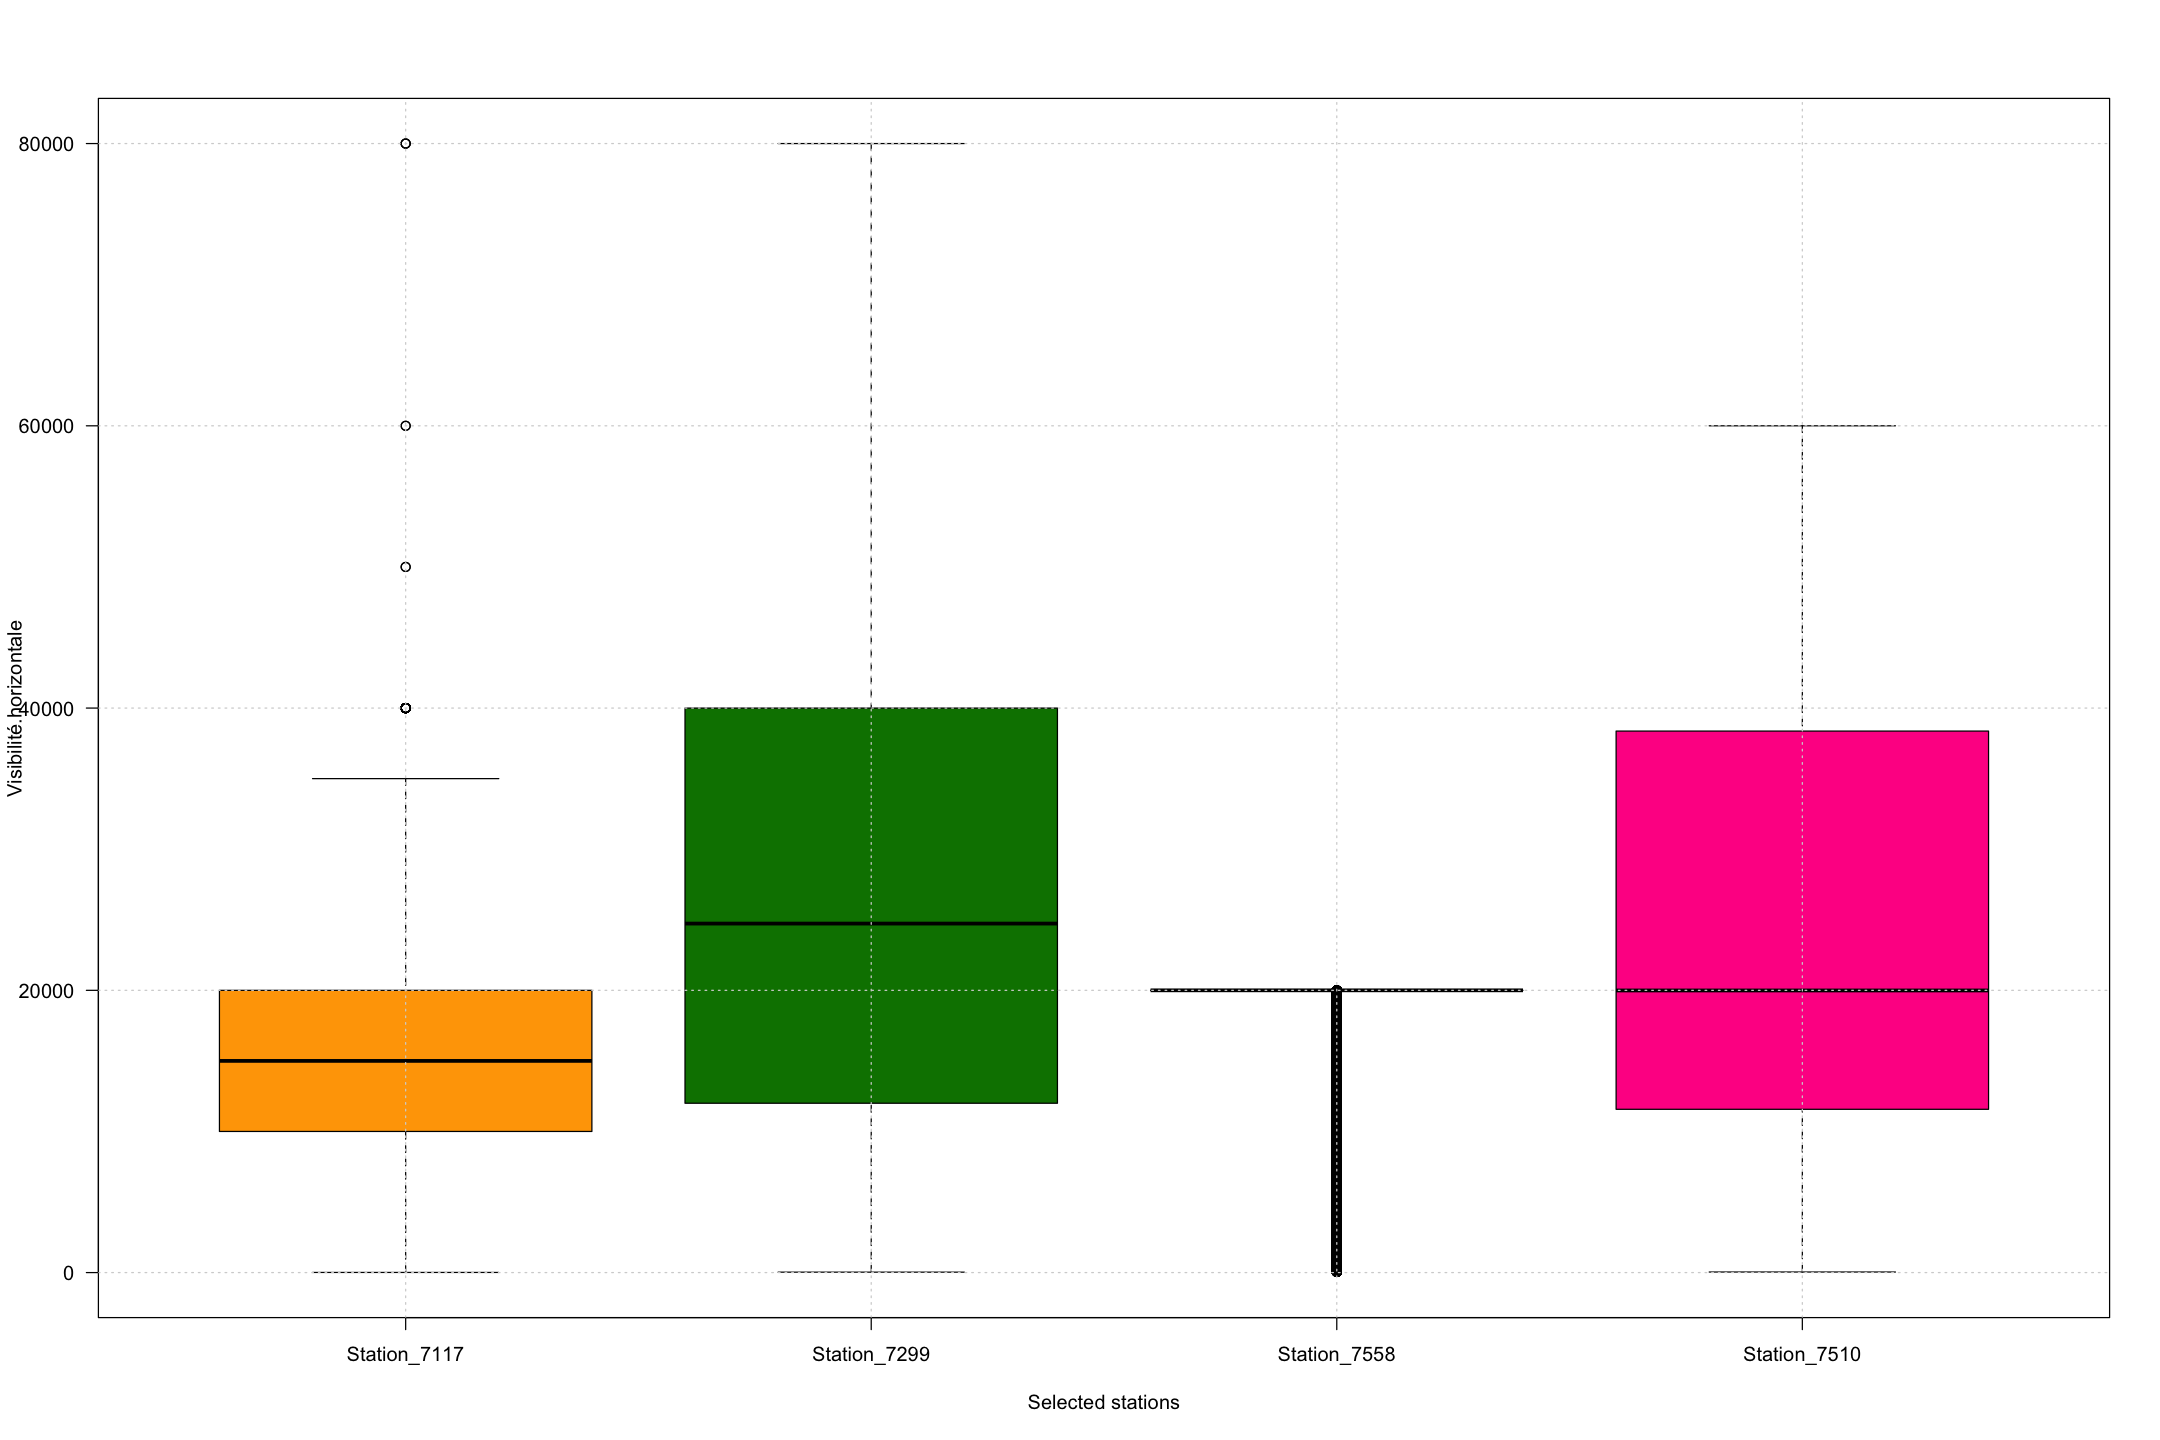

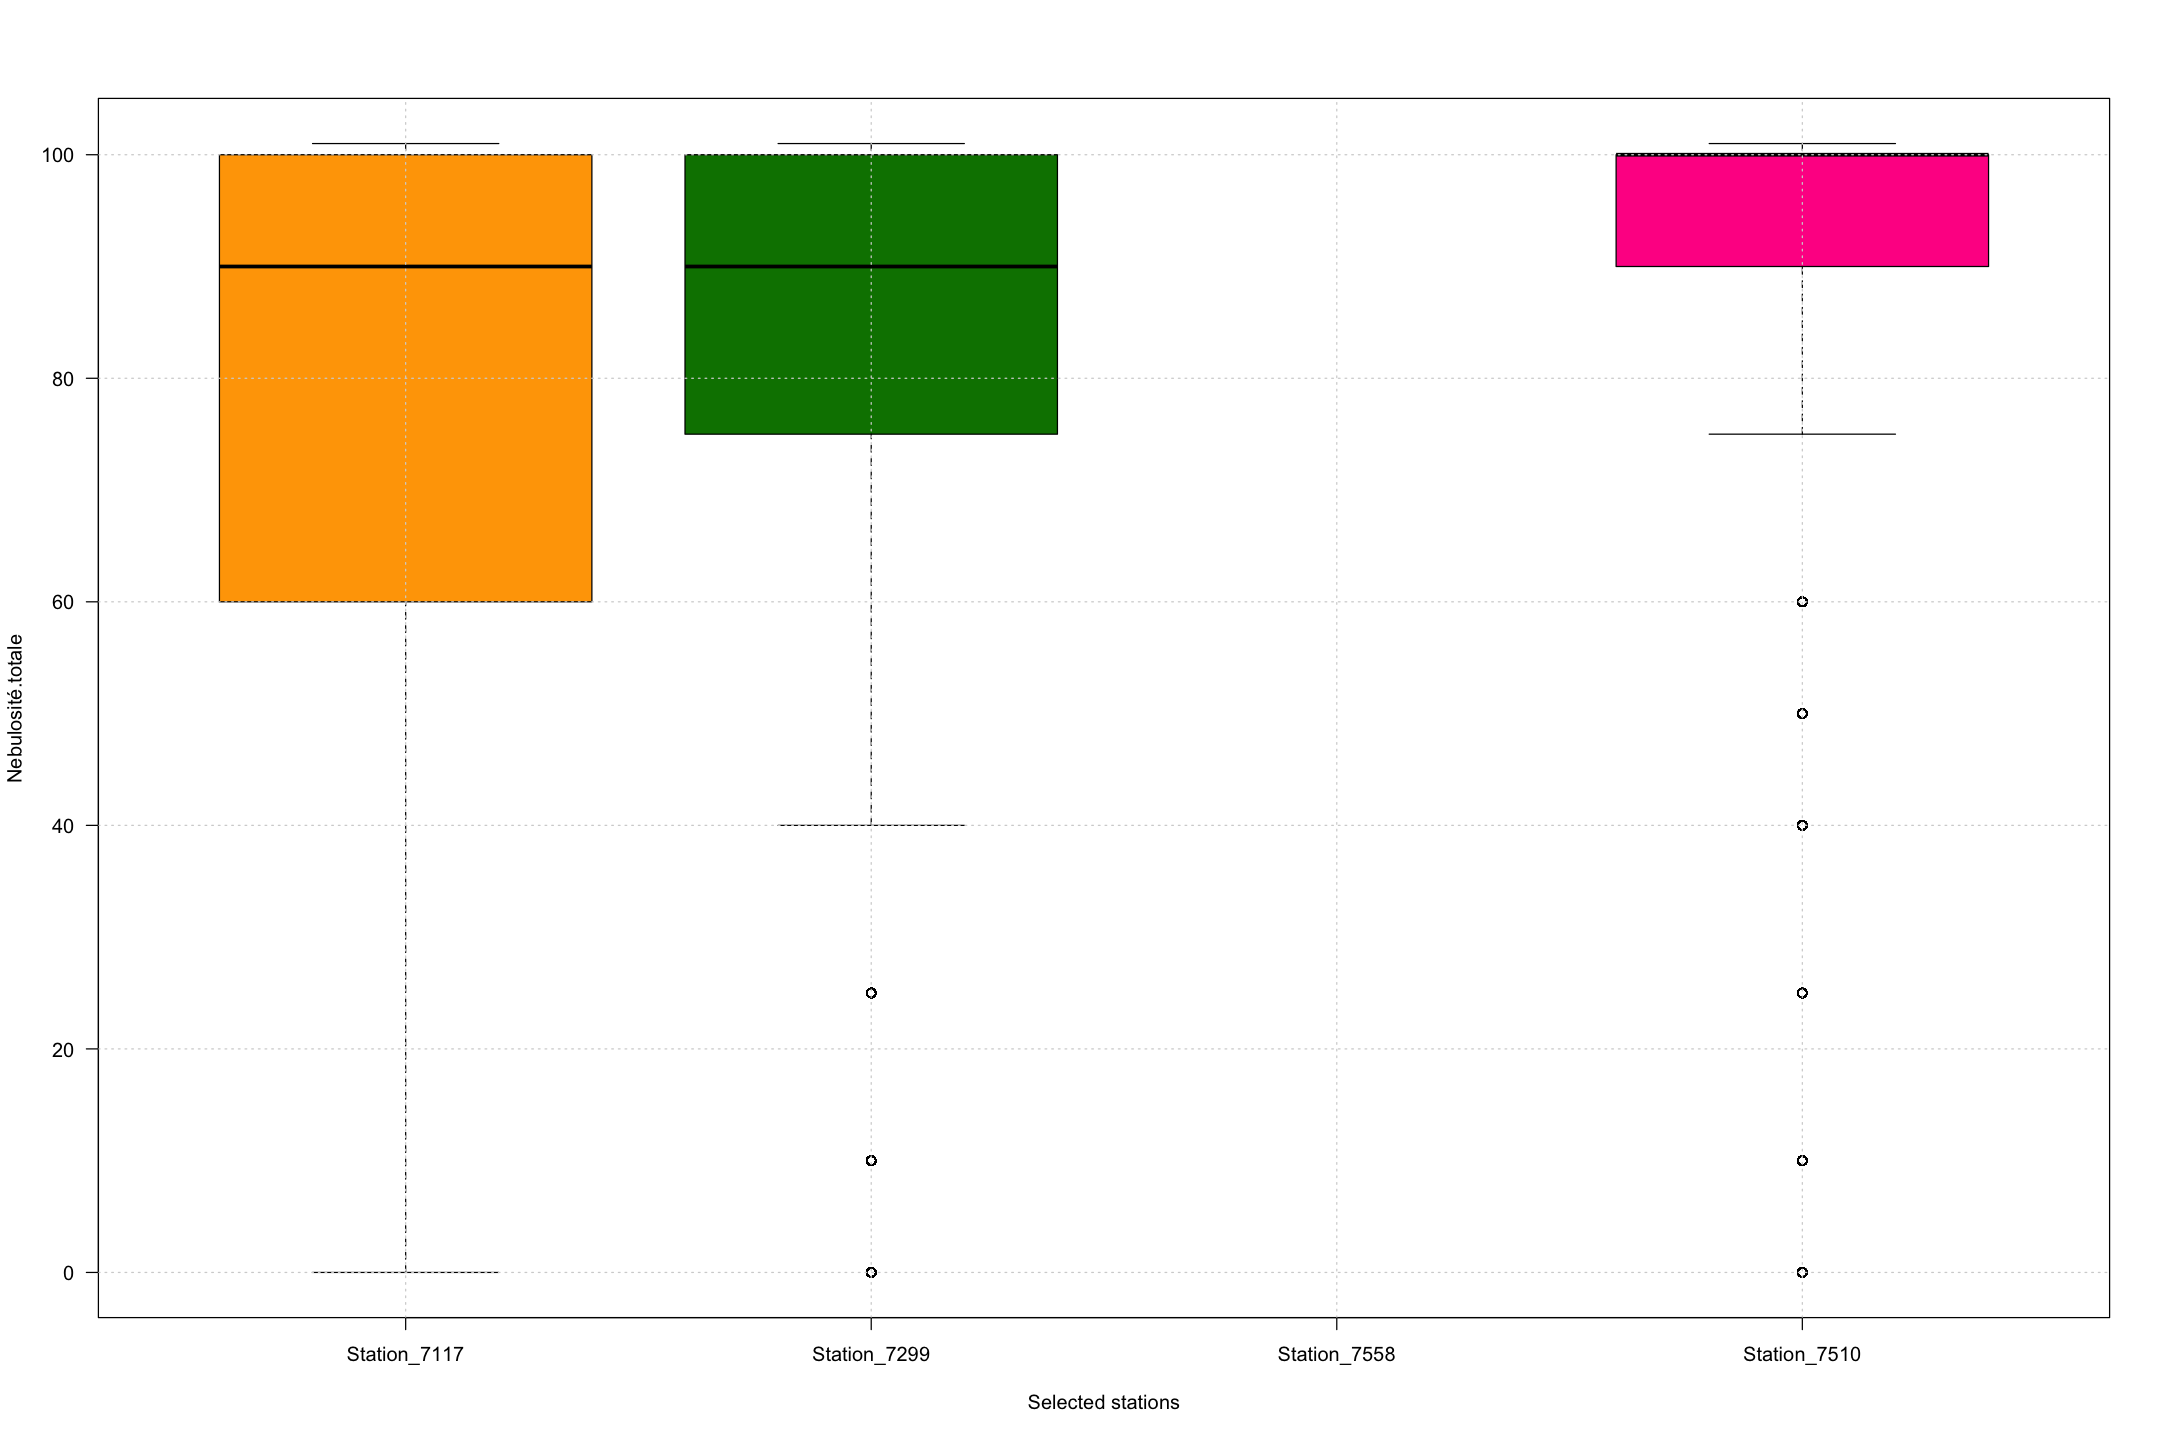

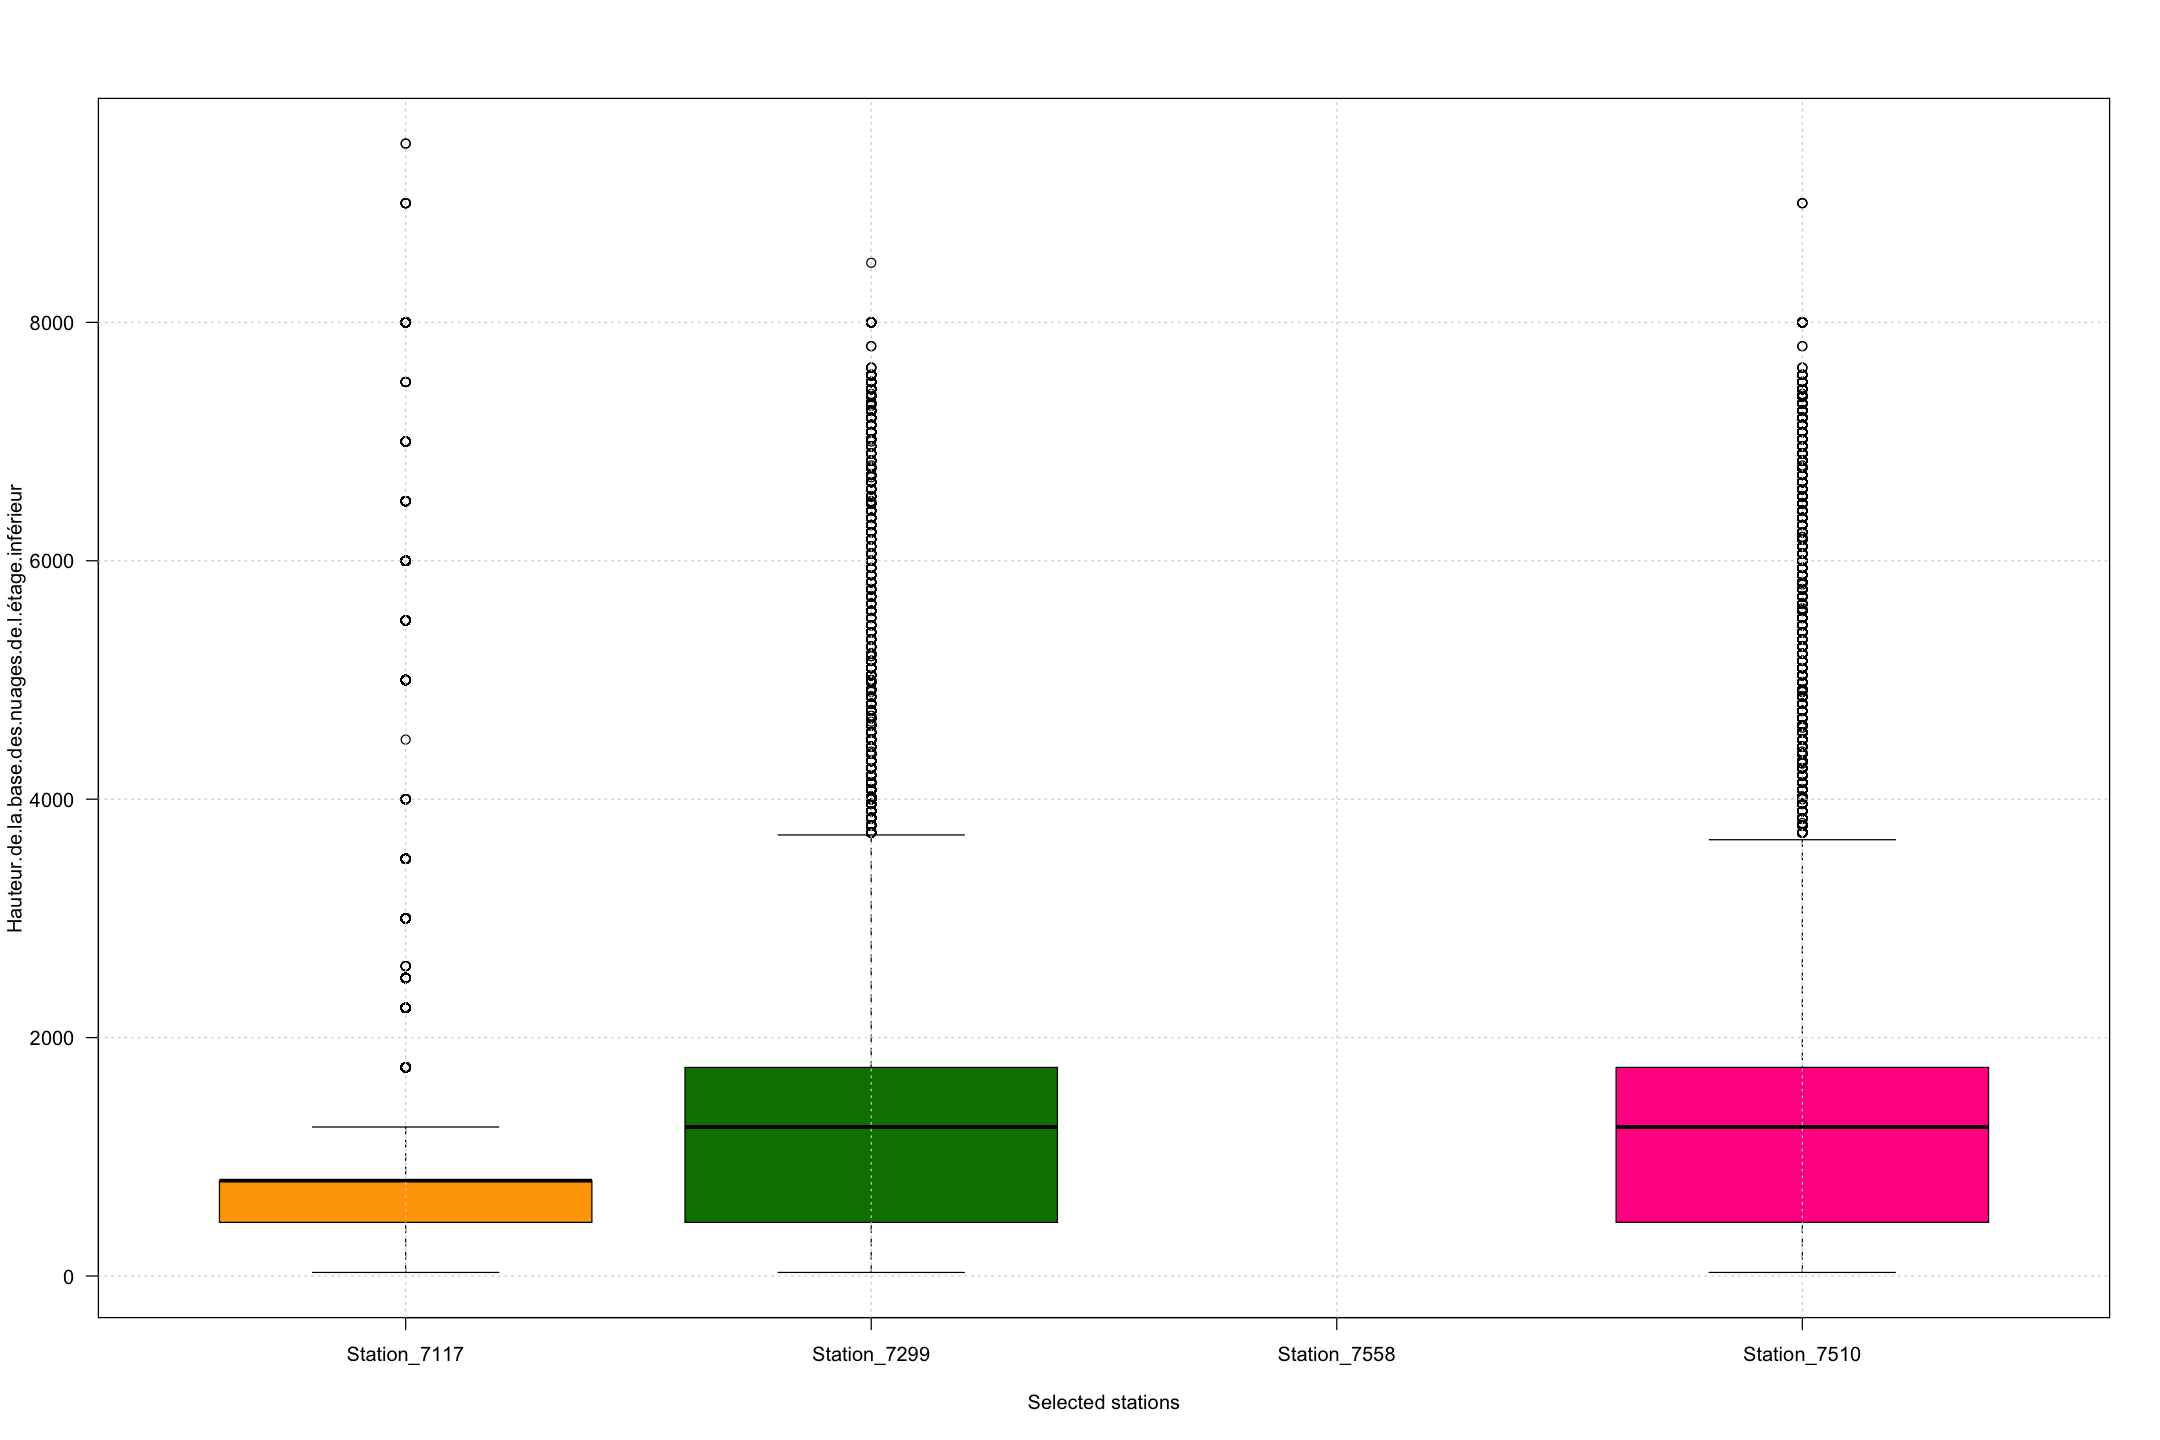

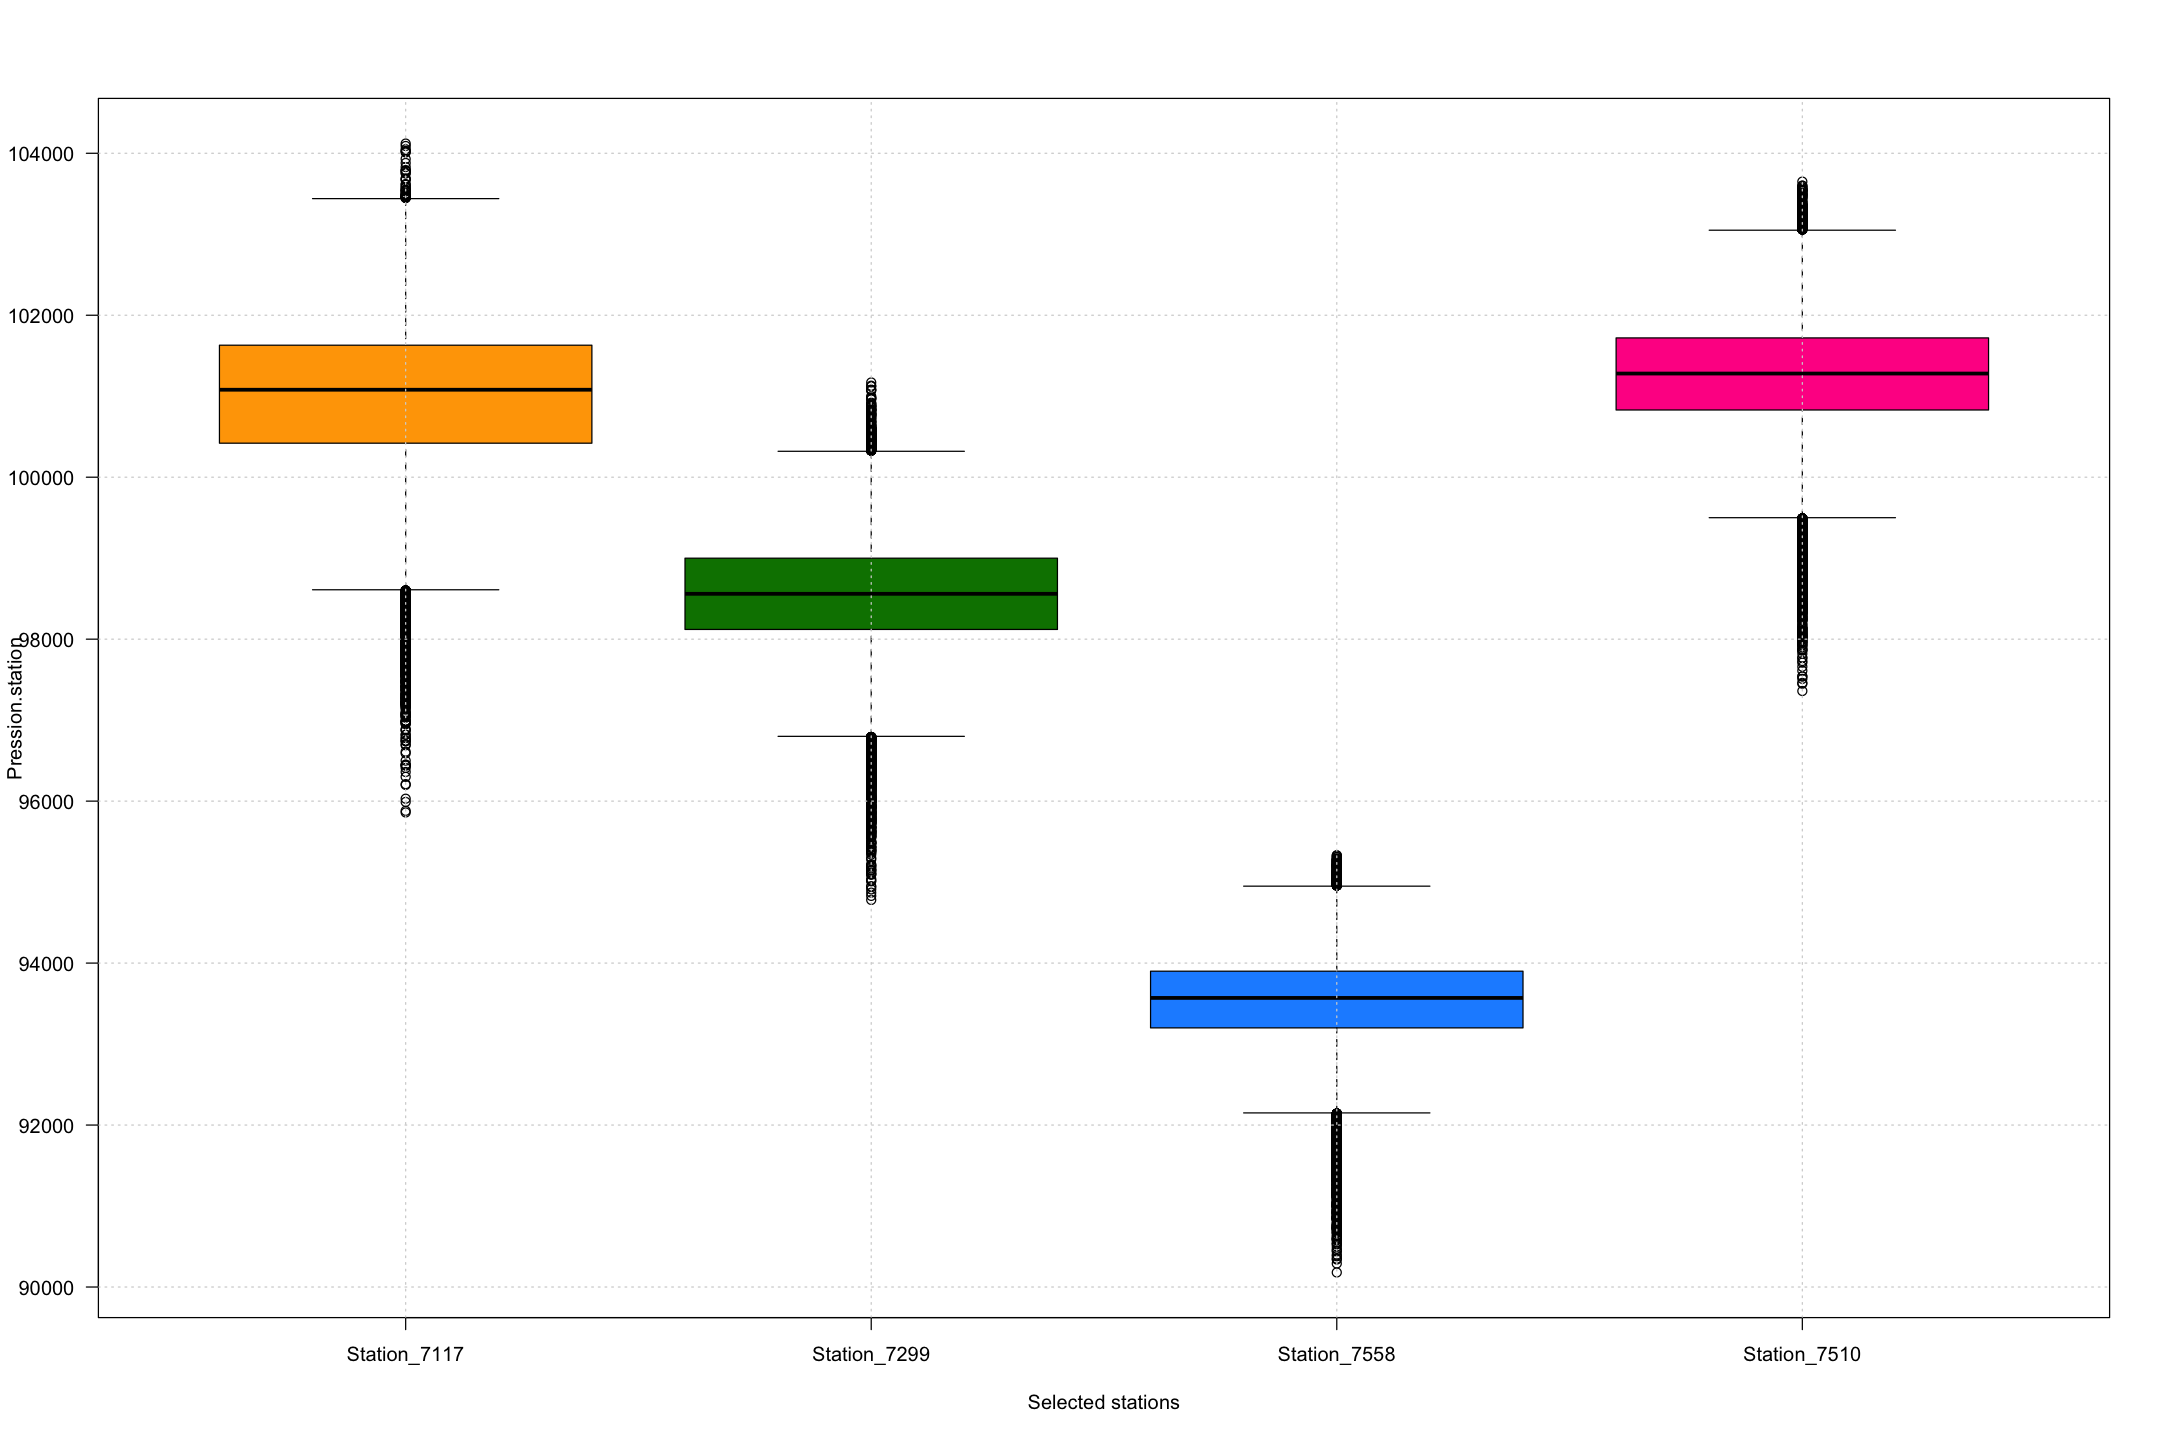

In [18]:
autoboxplot("Visibilité.horizontale", chosen_stations)
autoboxplot("Nebulosité.totale", chosen_stations)
autoboxplot("Hauteur.de.la.base.des.nuages.de.l.étage.inférieur", chosen_stations)
autoboxplot("Pression.station", chosen_stations)

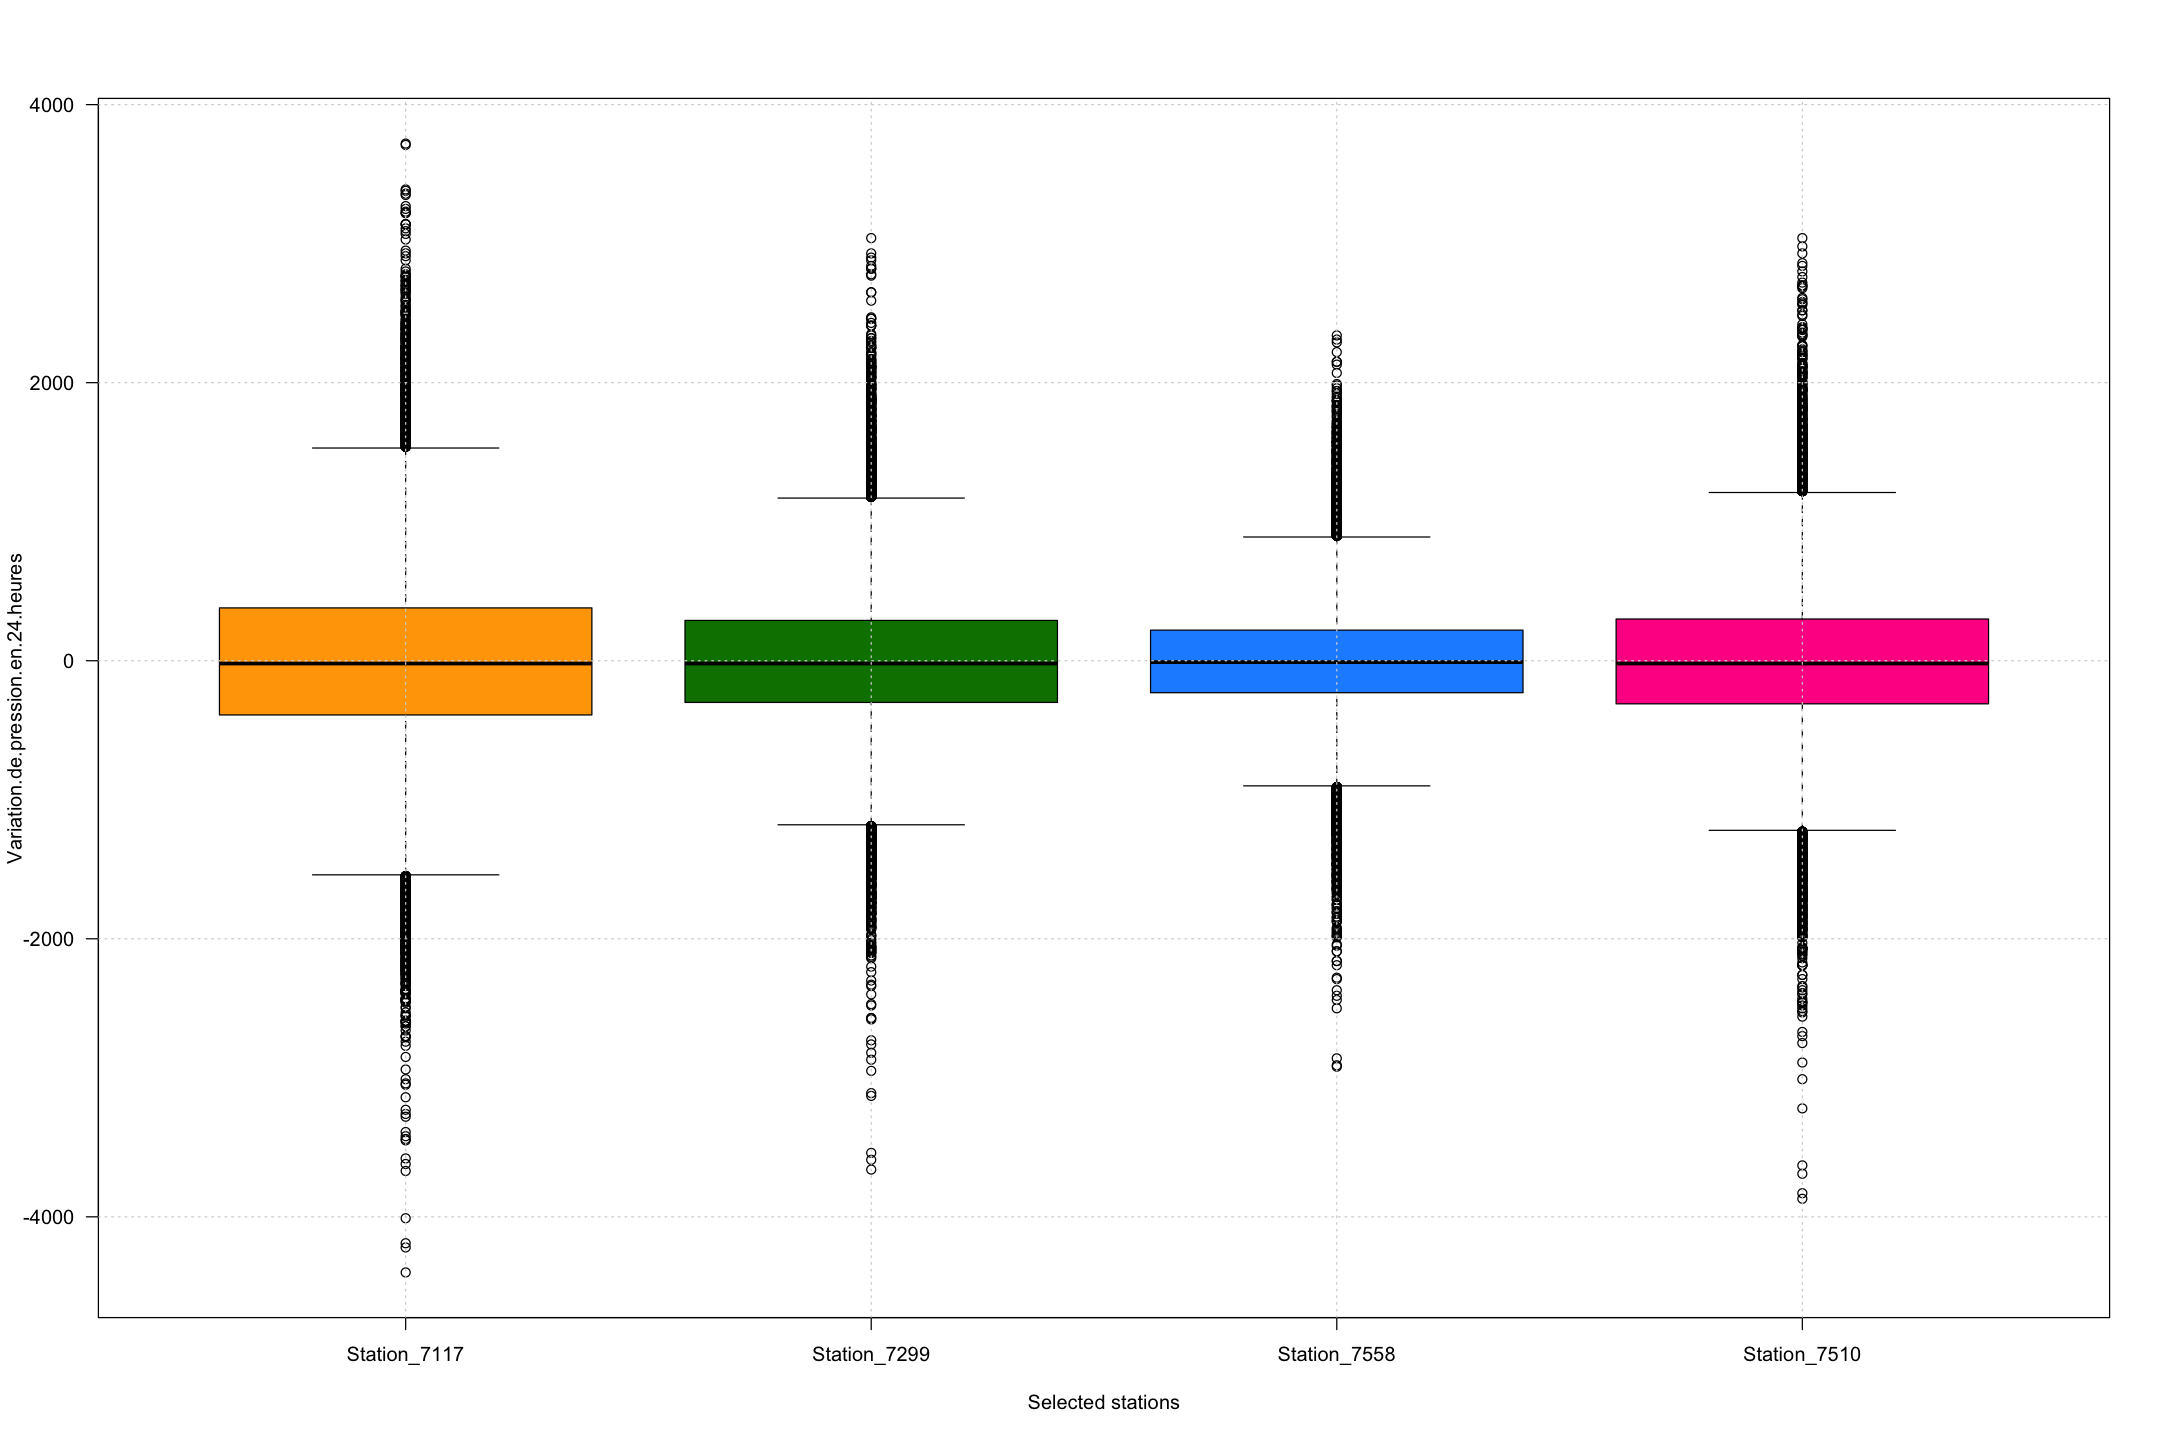

In [19]:
autoboxplot("Variation.de.pression.en.24.heures", chosen_stations)

# 2 - Estimateur

## Estimateur moyenne de température par region

In [23]:
stats_temperature_region <- aggregate(Température...C. ~ region..name., 
                          data = full_data, 
                          FUN = function(x) c(mean = mean(x, na.rm=TRUE),
                                              sd = sd(x, na.rm=TRUE),
                                              n = length(na.omit(x))))

# Nettoyage du tableau (car aggregate met tout en colonnes imbriquées)
stats_temperature_region <- do.call(data.frame, stats_temperature_region)

print(stats_temperature_region)

                                 region..name. Température...C..mean
1                         Auvergne-Rhône-Alpes             12.843774
2                      Bourgogne-Franche-Comté             12.254824
3                                     Bretagne             12.772030
4                          Centre-Val de Loire             12.964214
5                                        Corse             16.817424
6                                    Grand Est             11.902154
7                                   Guadeloupe             26.896396
8                                       Guyane             26.486657
9                              Hauts-de-France             11.818923
10                               Île-de-France             12.897563
11                                  La Réunion             24.596620
12                                  Martinique             27.321202
13                                     Mayotte             27.402678
14                                

## Diagramme moustache des distributions de températures par région

Warning message:
“Removed 22176 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


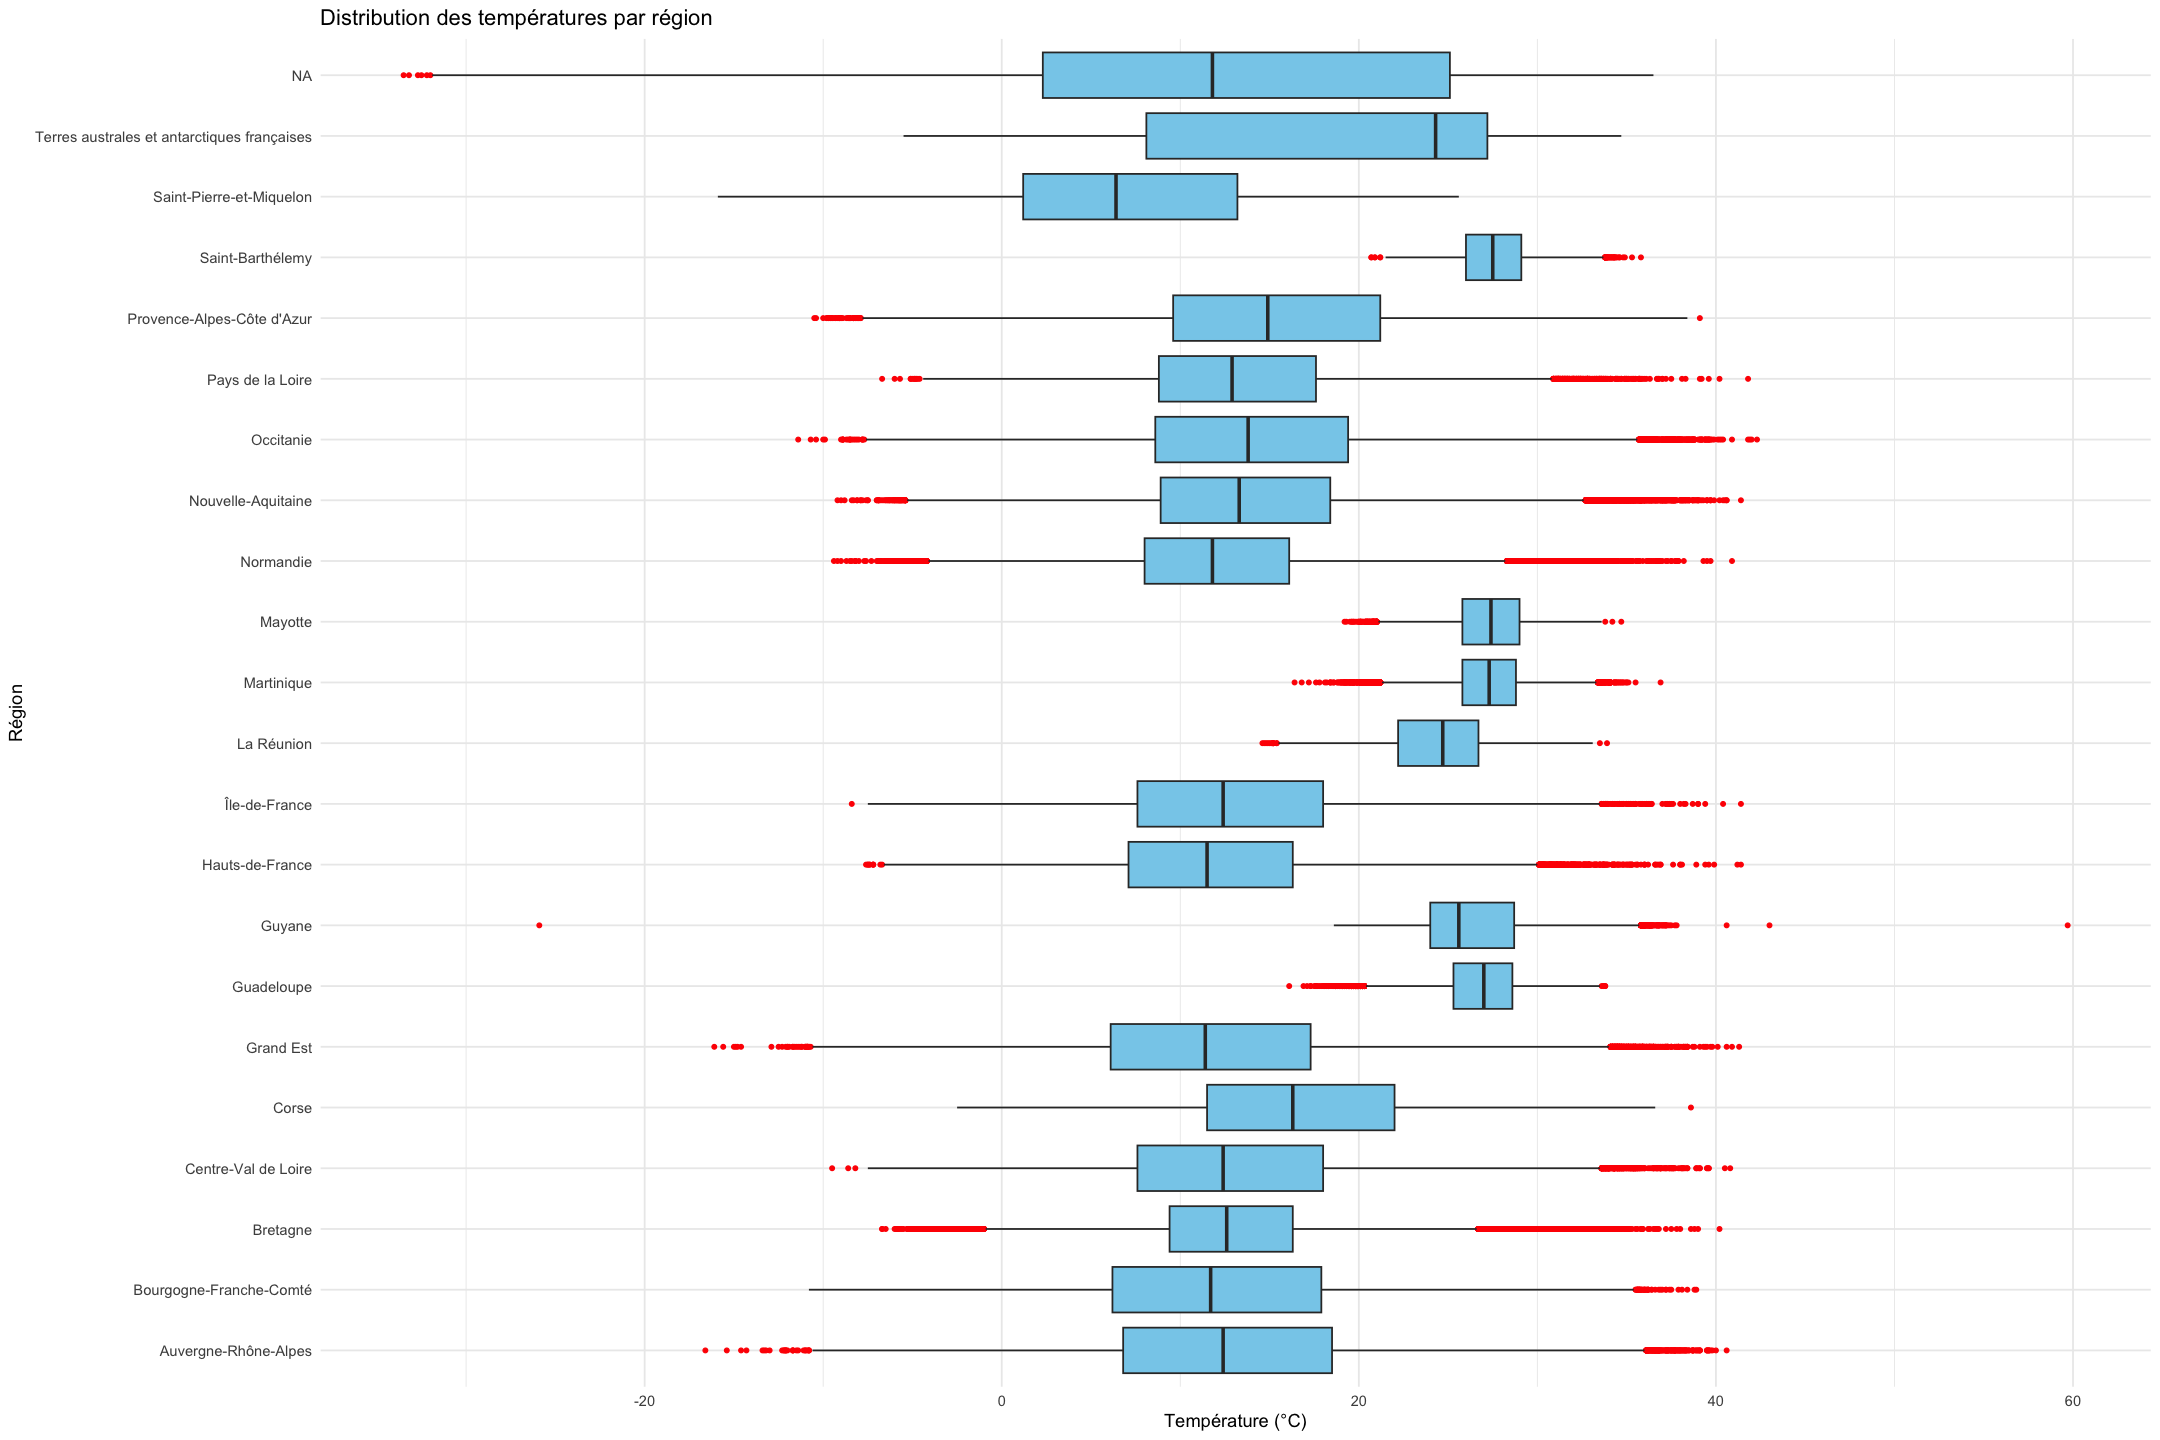

In [24]:
ggplot(full_data, aes(x = region..name., y = Température...C.)) +
  geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.size = 1) +
  coord_flip() +  # pour mettre les régions en ordonnée (plus lisible)
  labs(title = "Distribution des températures par région",
       x = "Région",
       y = "Température (°C)") +
  theme_minimal()

## calculs des temprératures moyennes mensuelles

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


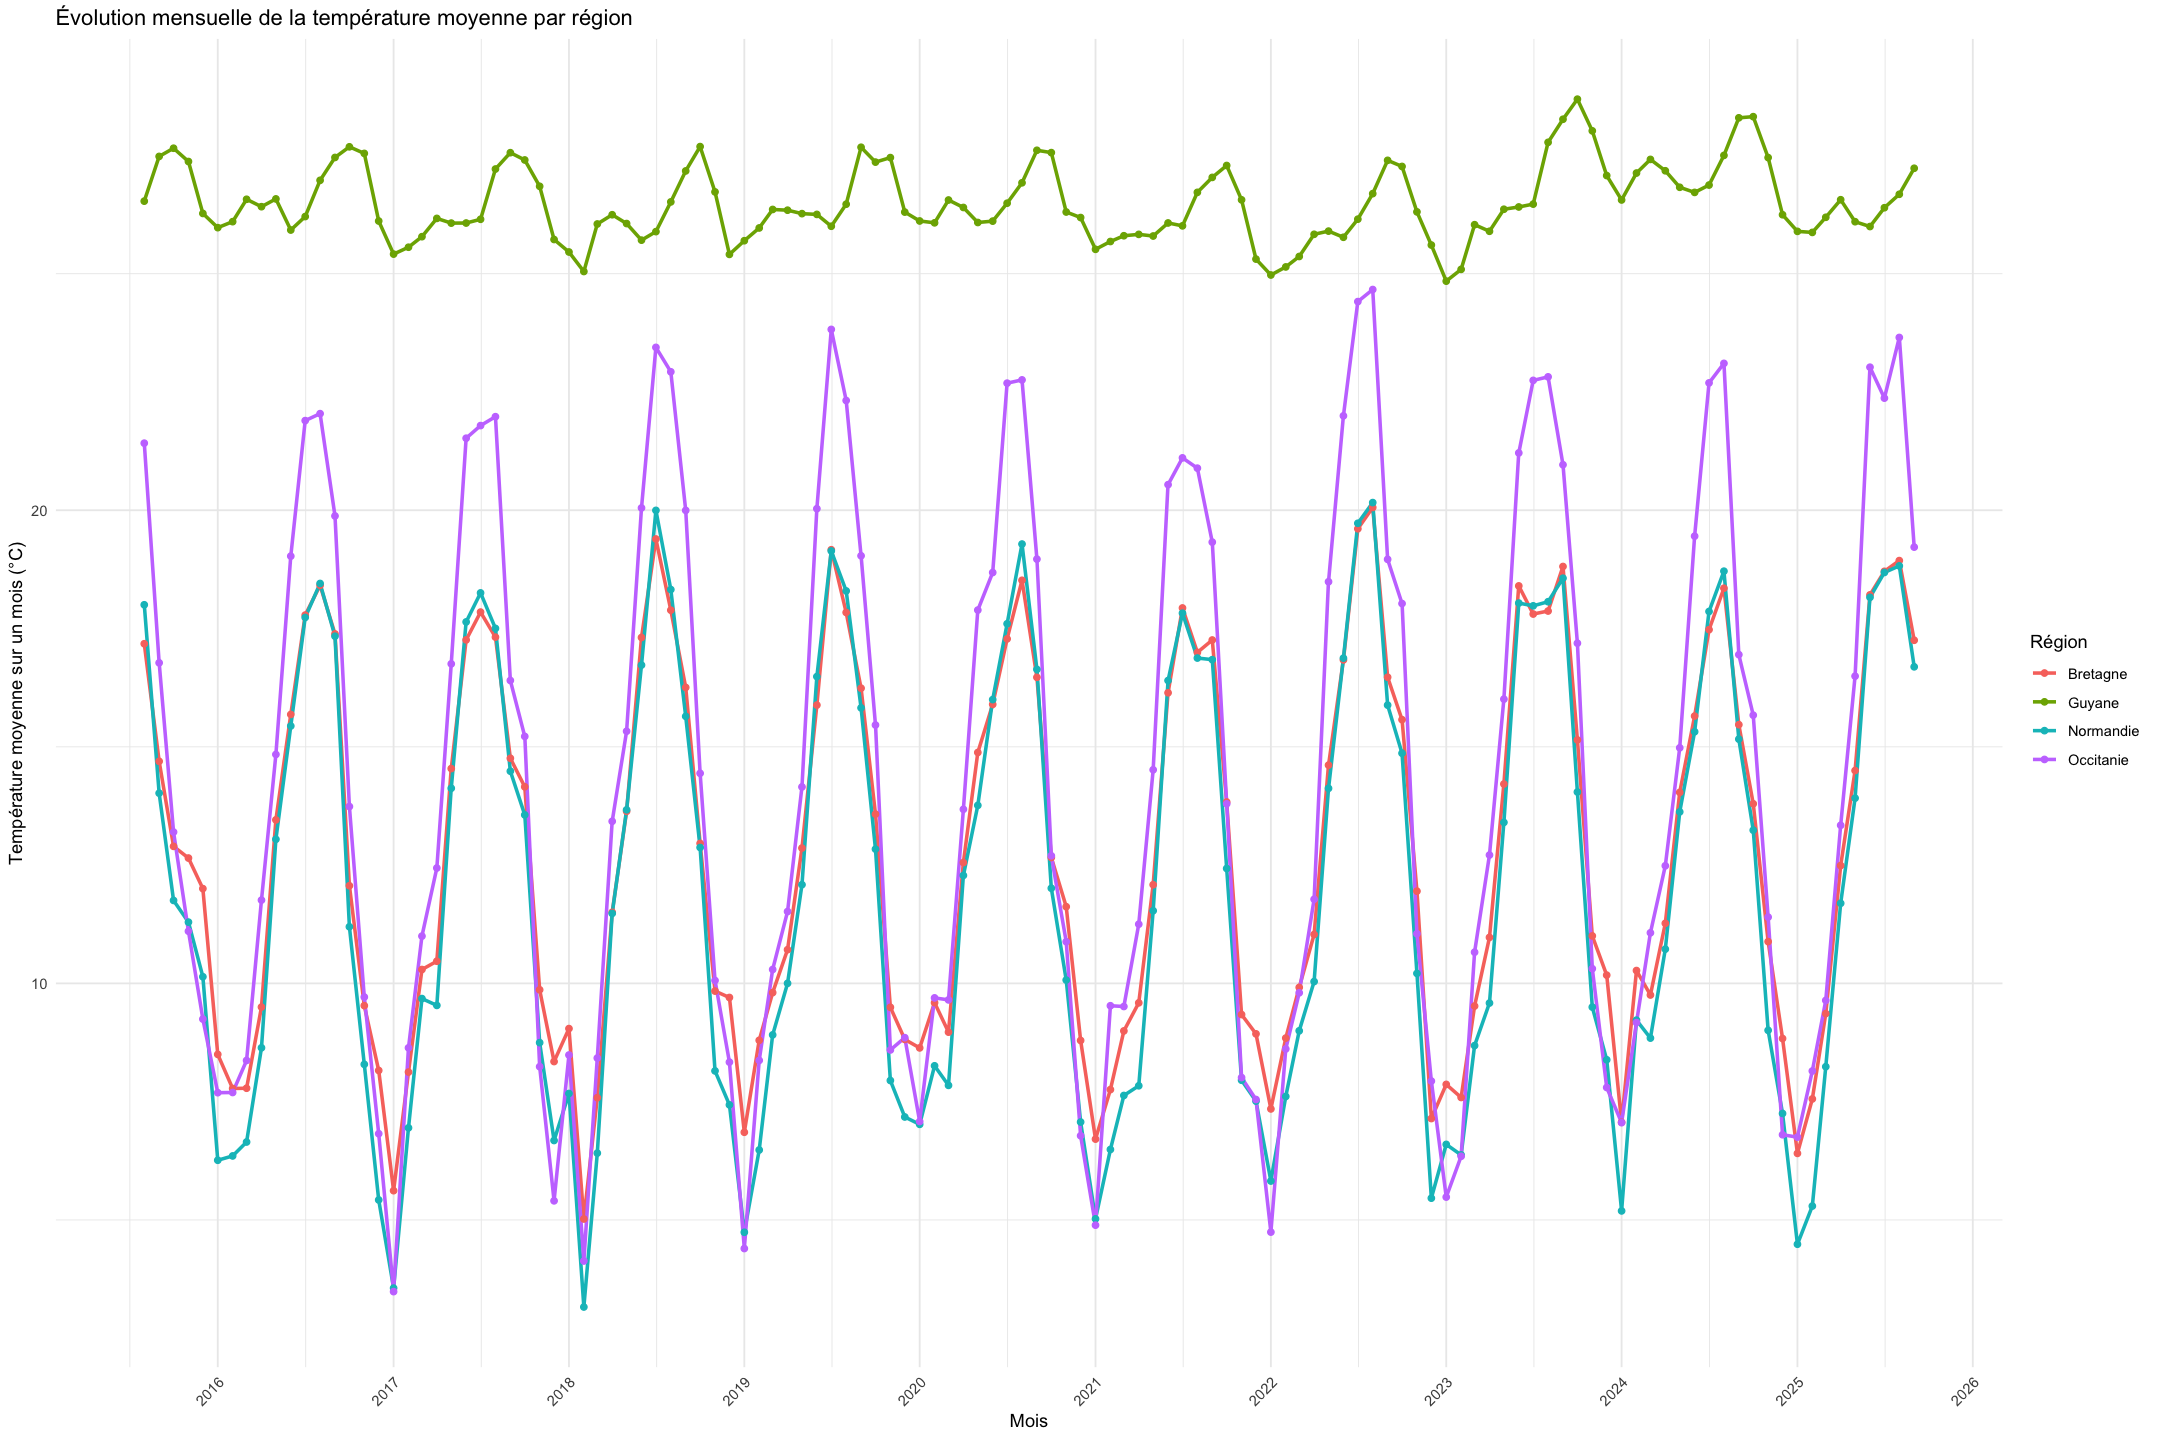

In [25]:
# Extraire juste la date (MM-DD)
temp_mensuelle <- full_data %>%
  mutate(Date_only = as.Date(substr(Date, 1, 10)),
         month_only = as.Date(paste0(format(Date_only, "%Y-%m"), "-01")))  # "2024-03")

temp_mensuelle <- temp_mensuelle %>%
  group_by(month_only, region..name.) %>%
  summarise(mean_temp = mean(Température...C., na.rm = TRUE), .groups = "drop")

# Liste des régions regardées
regions_a_plot <- c("Bretagne", "Normandie", "Occitanie","Guyane")
temp_mensuelle <- temp_mensuelle %>%
  filter(region..name. %in% regions_a_plot)

ggplot(temp_mensuelle, aes(x = month_only, y = mean_temp, color = region..name., group = region..name.)) +
  geom_line(size = 1) +
  geom_point() +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Évolution mensuelle de la température moyenne par région",
       x = "Mois",
       y = "Température moyenne sur un mois (°C)",
       color = "Région") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # rotation des labels x


## Calcul des tendances de températures

In [32]:
stats_region <- temp_mensuelle %>%
  group_by(region..name.) %>%
  summarise(
    moyenne = mean(mean_temp, na.rm = TRUE),
    ecart_type = sd(mean_temp, na.rm = TRUE),
    min = min(mean_temp, na.rm = TRUE),
    max = max(mean_temp, na.rm = TRUE),
    .groups = "drop"
  )

stats_region

# Ajustement linéaire par région
trend_region <- temp_mensuelle %>%
  group_by(region..name.) %>%
  summarise(
    model = list(lm(mean_temp ~ as.numeric(month_only))),
    .groups = "drop"
  ) %>%
  mutate(slope = sapply(model, function(m) coef(m)[2]))

region..name. moyenne  ecart_type min       max     
1 Bretagne      12.79253 3.984599    5.020000 20.05868
2 Guyane        26.48927 0.784544   24.842288 28.68855
3 Normandie     11.99591 4.668678    3.159820 20.16190
4 Occitanie     14.21717 5.931184    3.484878 24.66508

`geom_smooth()` using formula = 'y ~ x'


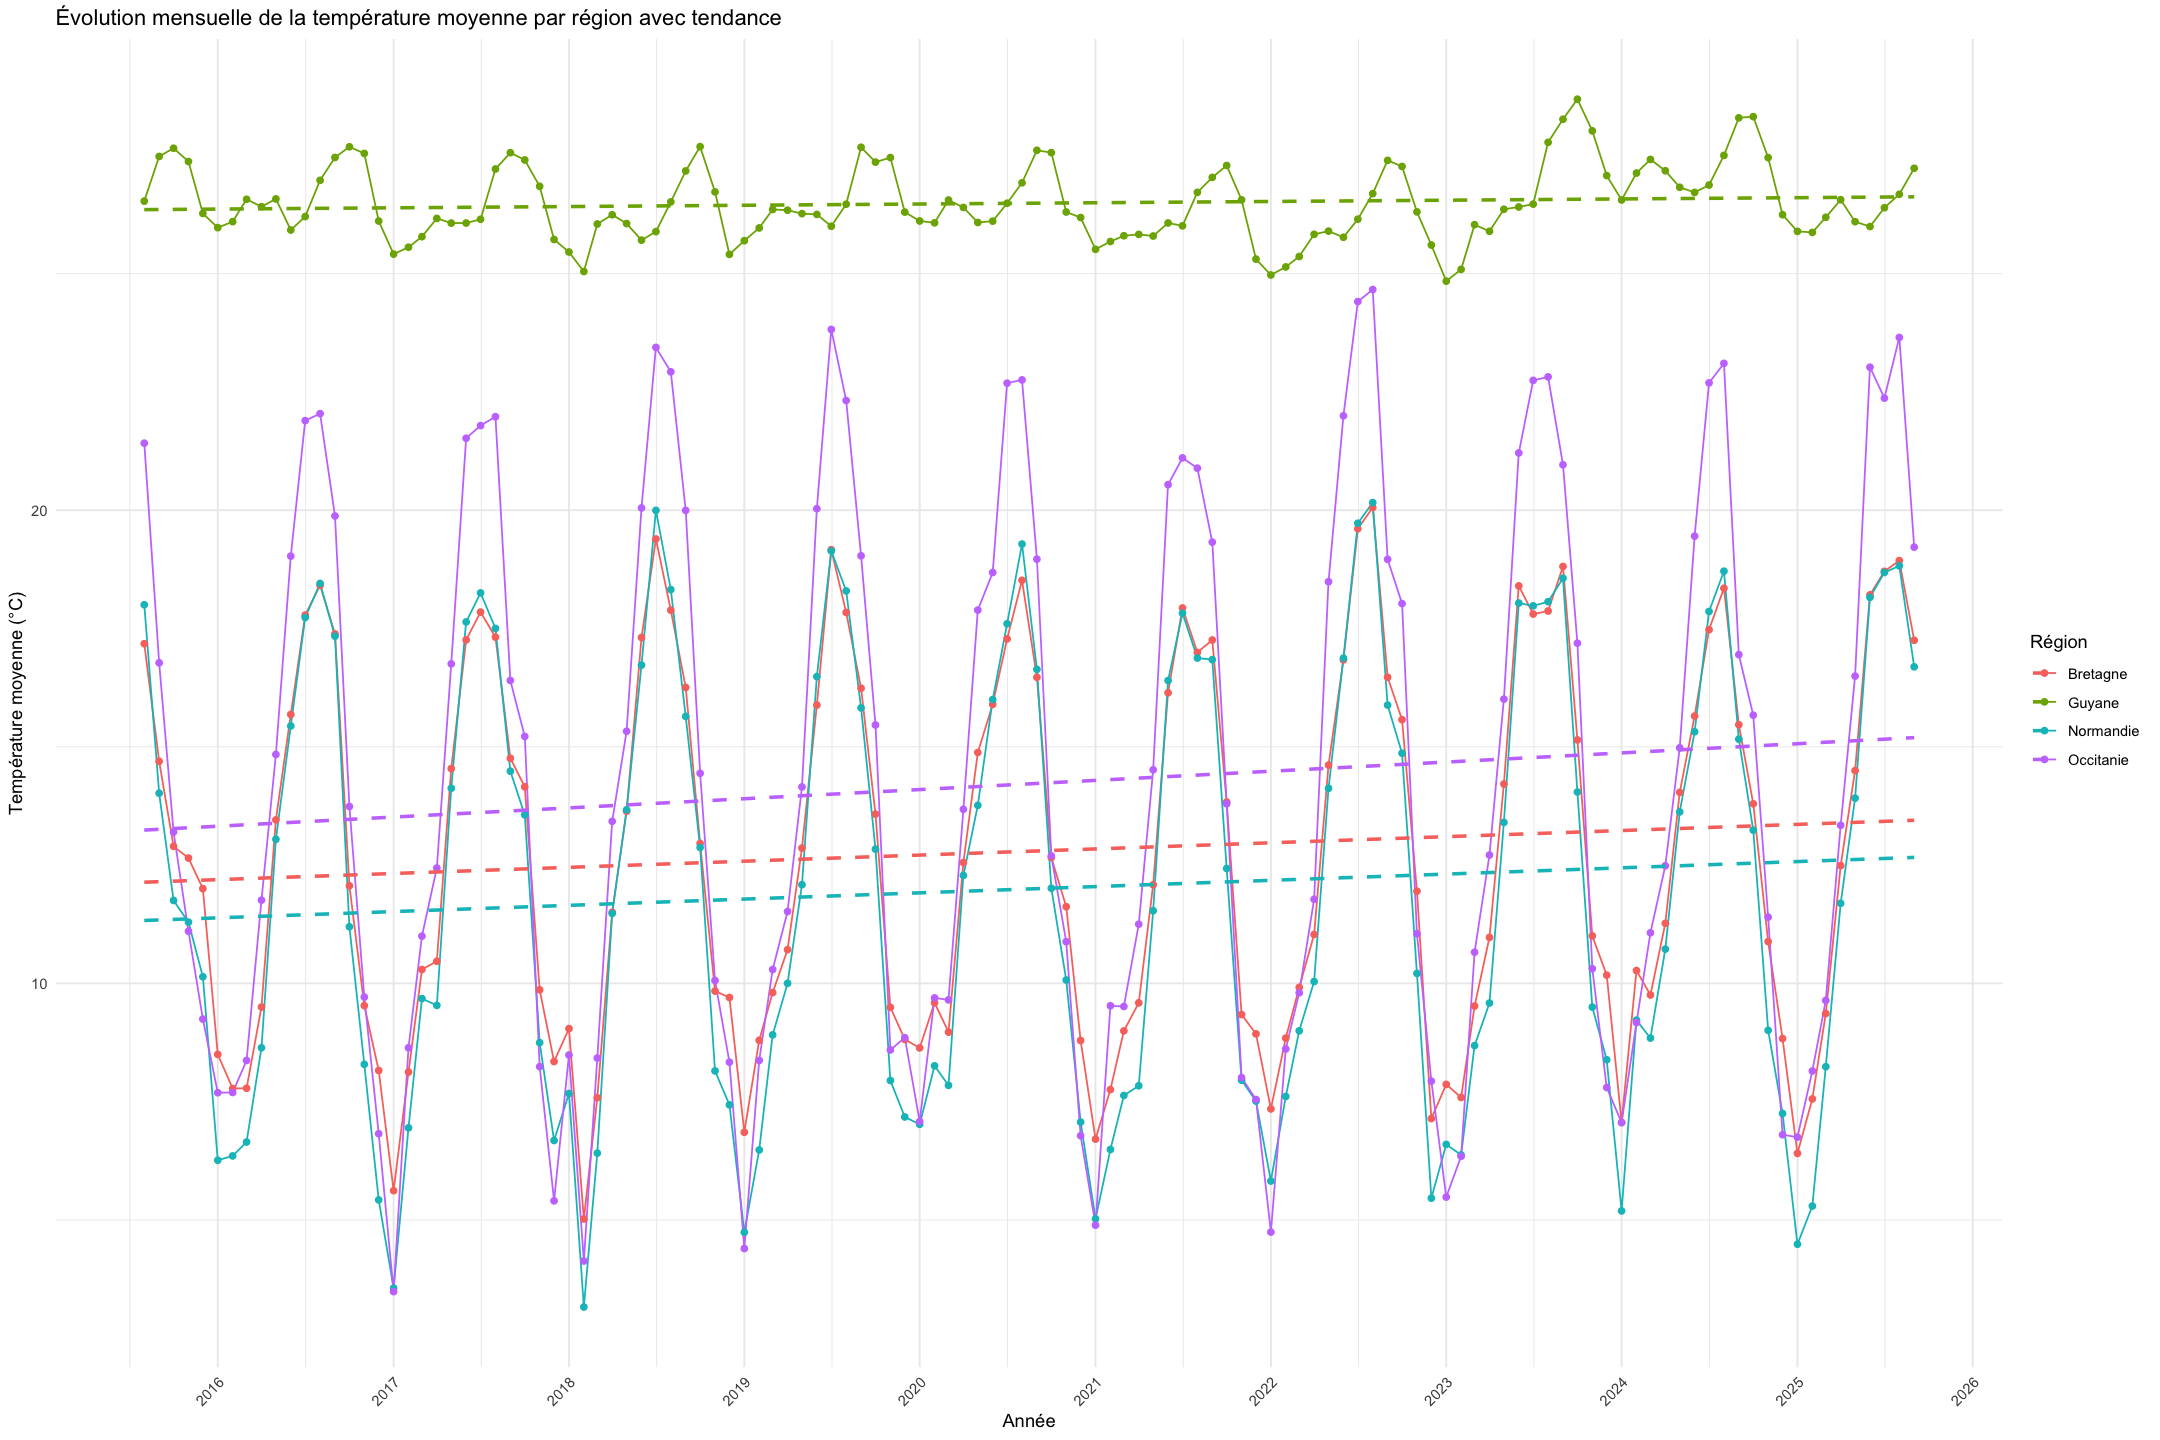

In [33]:
ggplot(temp_mensuelle, aes(x = month_only, y = mean_temp, color = region..name., group = region..name.)) +
  geom_line() +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Évolution mensuelle de la température moyenne par région avec tendance",
       x = "Année",
       y = "Température moyenne (°C)",
       color = "Région") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`geom_smooth()` using formula = 'y ~ x'


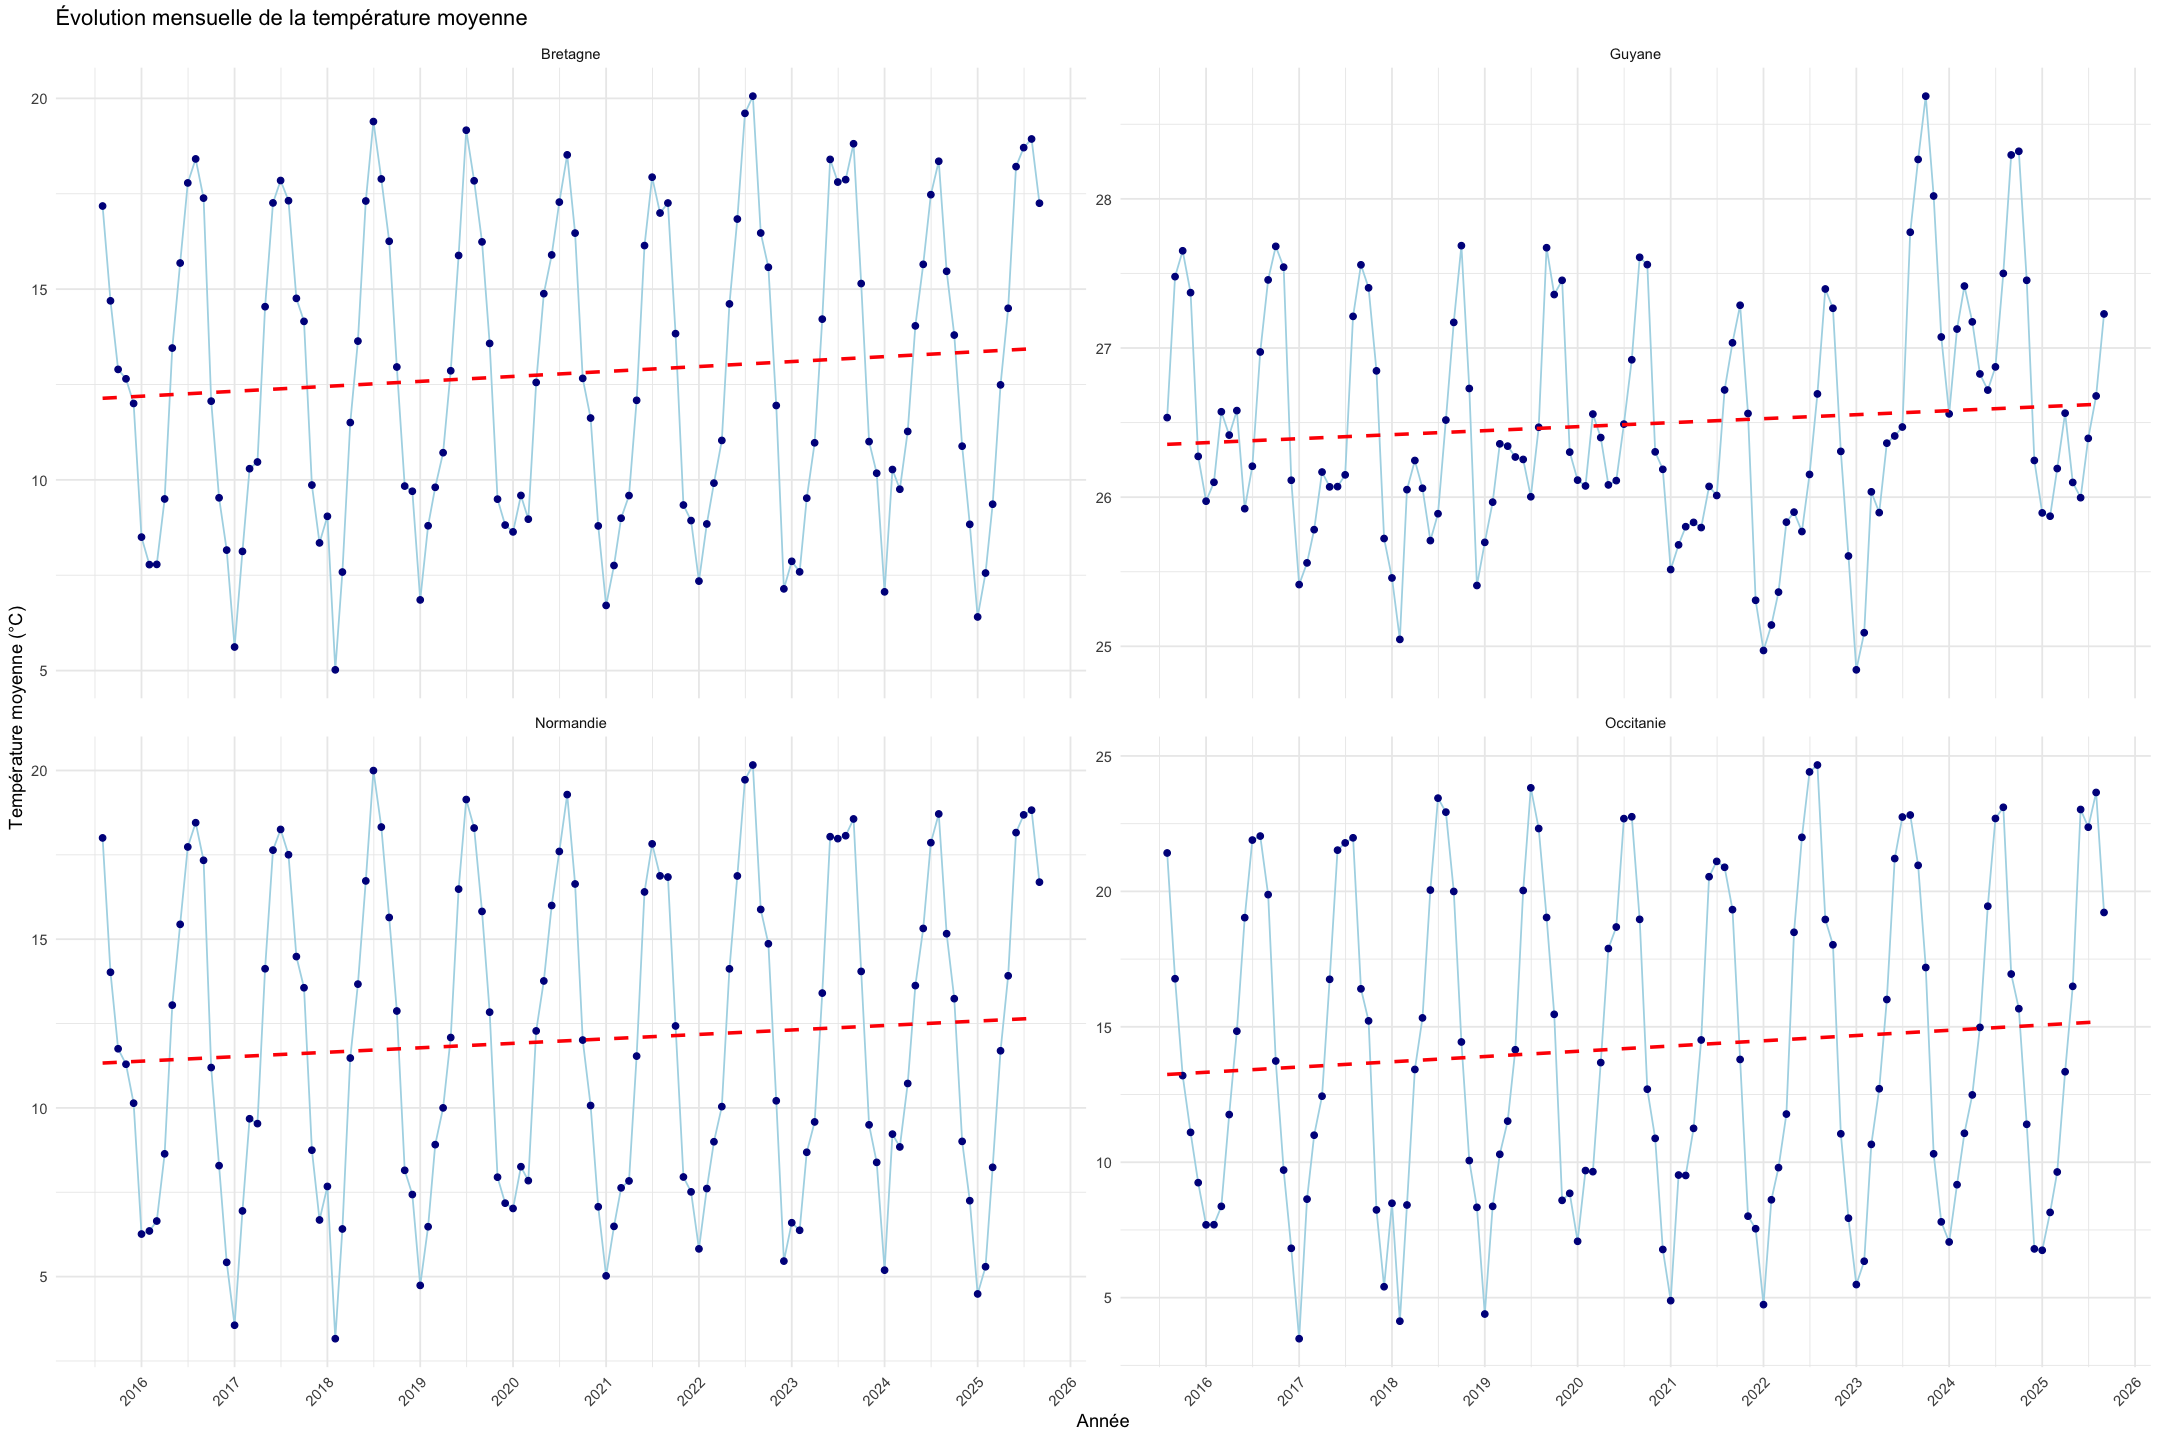

In [34]:
ggplot(temp_mensuelle, aes(x = month_only, y = mean_temp, group = region..name.)) +
  geom_line(color = "lightblue") +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", color = "red") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Évolution mensuelle de la température moyenne",
       x = "Année",
       y = "Température moyenne (°C)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(~ region..name., scales = "free_y")  # un plot par région

>La température moyenne augmente.

In [35]:
# Repartons sans filtrer
temp_mensuelle_all <- full_data %>%
  mutate(Date_only = as.Date(substr(Date, 1, 10)),
         month_only = as.Date(paste0(format(Date_only, "%Y-%m"), "-01"))) %>%
  group_by(month_only, region..name.) %>%
  summarise(mean_temp = mean(Température...C., na.rm = TRUE), .groups = "drop")

# Ajustement linéaire par région
trend_region <- temp_mensuelle_all %>%
  group_by(region..name.) %>%
  summarise(
    model = list(lm(mean_temp ~ as.numeric(month_only))),
    .groups = "drop"
  ) %>%
  mutate(slope = sapply(model, function(m) coef(m)[2]))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”


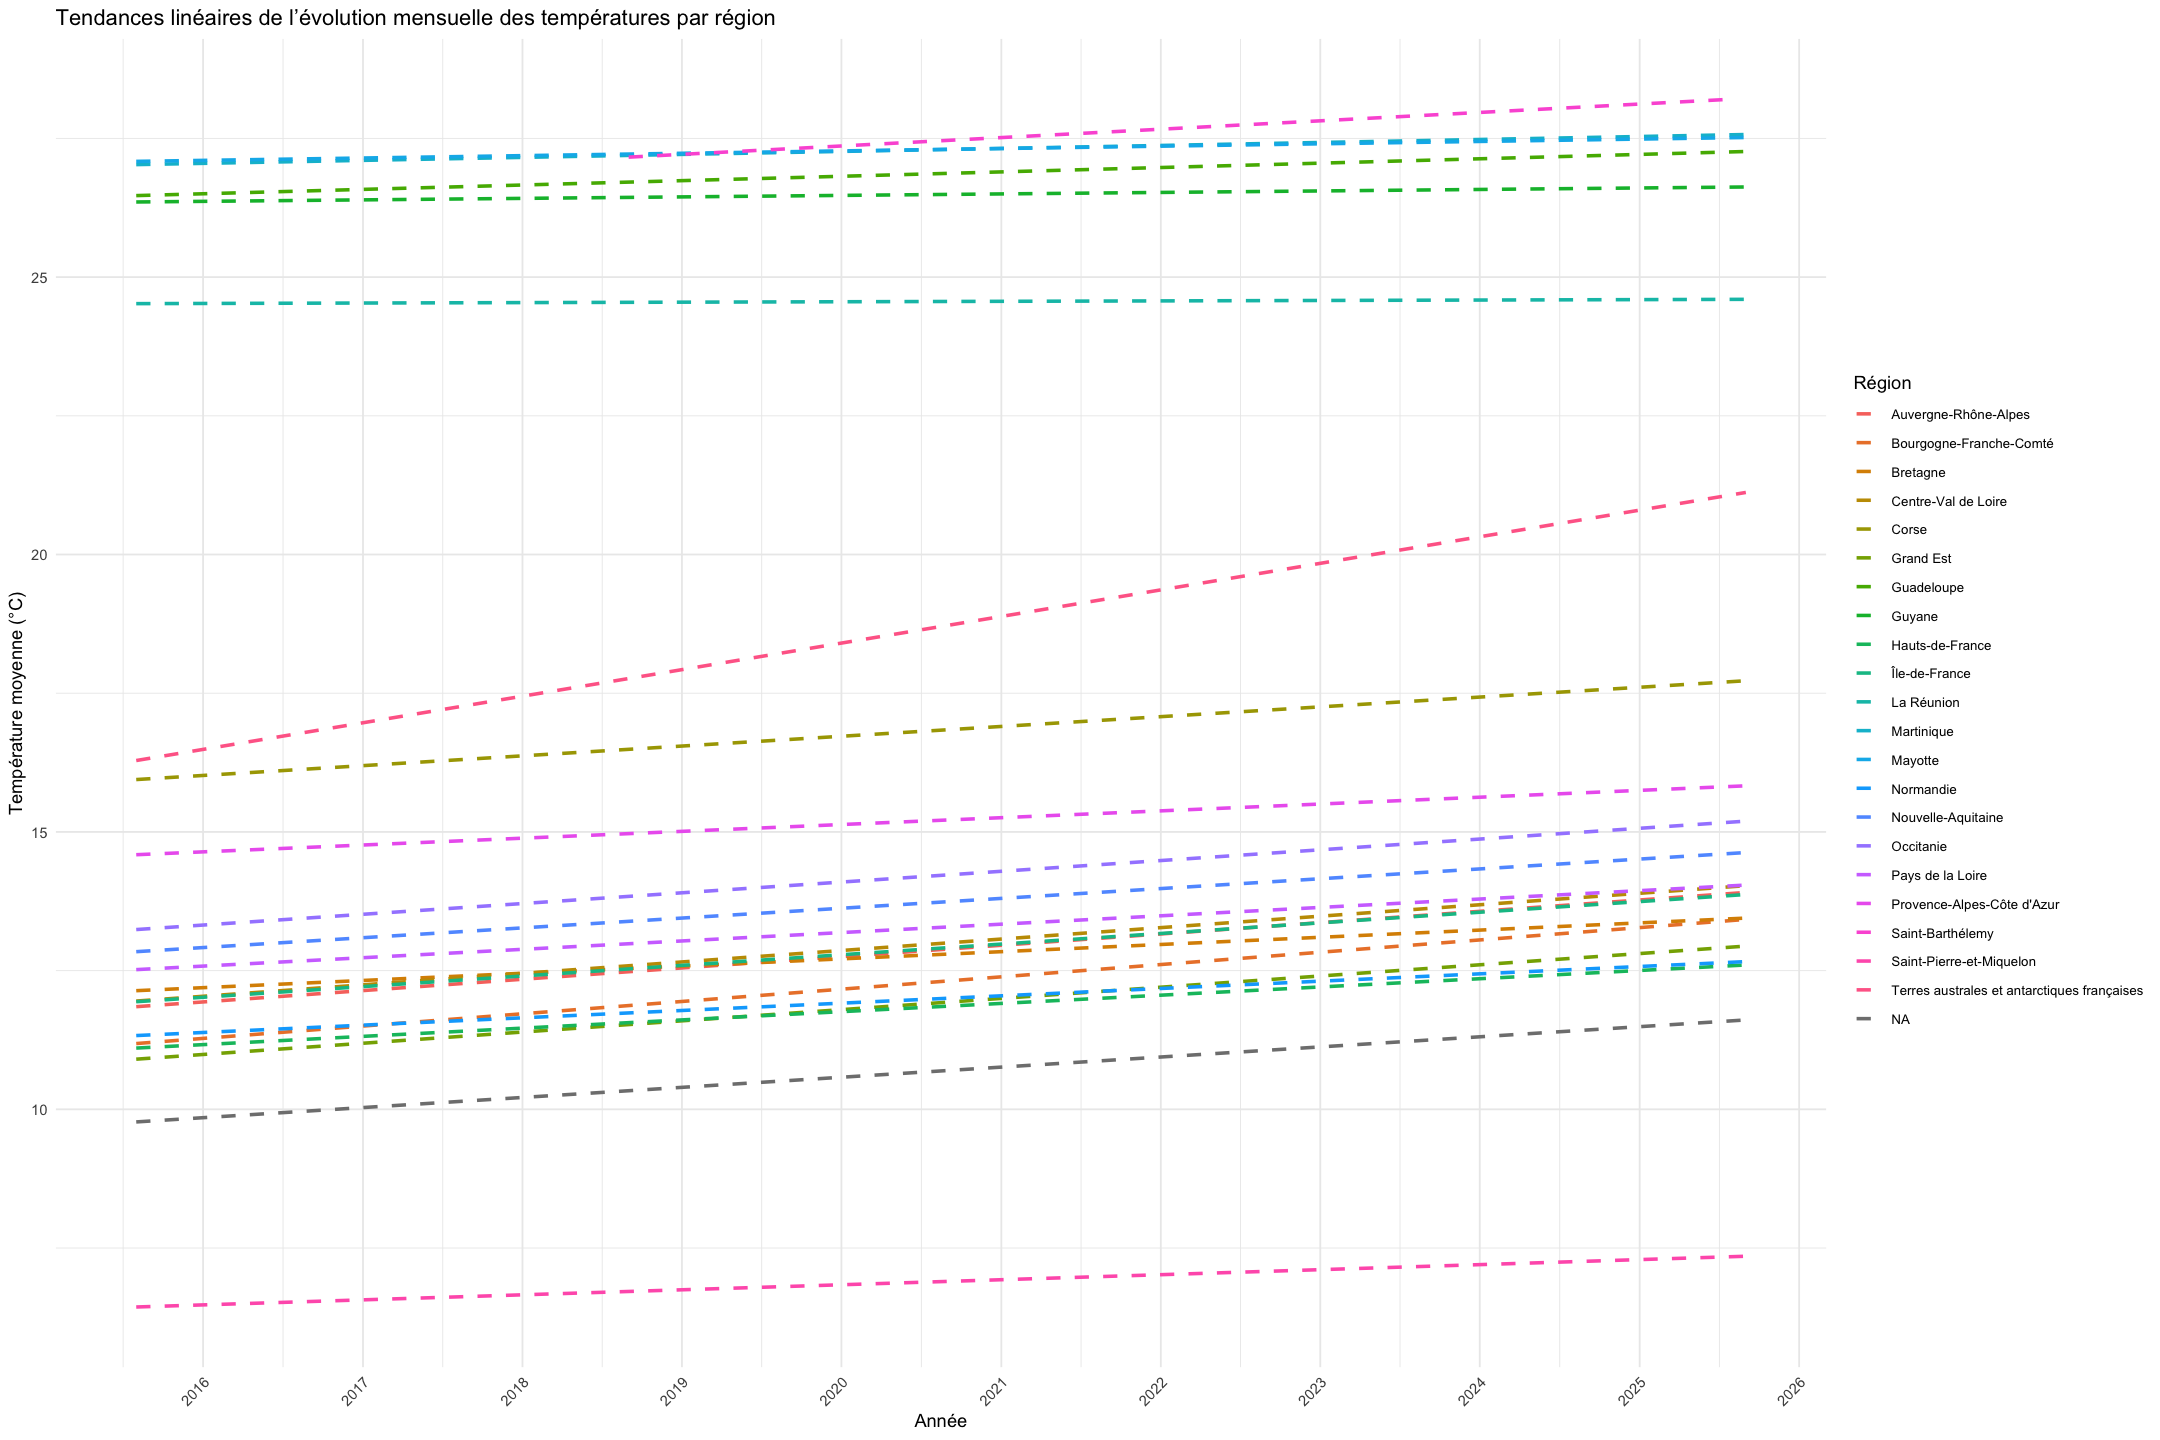

In [36]:
ggplot(temp_mensuelle_all, aes(x = month_only, y = mean_temp, color = region..name.)) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", size = 1) +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Tendances linéaires de l’évolution mensuelle des températures par région",
       x = "Année",
       y = "Température moyenne (°C)",
       color = "Région") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "right",          # ou "left"
        legend.text = element_text(size = 8)) +
  guides(color = guide_legend(ncol = 1))

# 3.1 - Tests statistics

## Récupération de la donnée ce vitesse du vent en occitanie

In [37]:
# Filtrer les données pour une région spécifique
region <- "Occitanie"
df_region <- full_data %>% filter(`region..name.` == region)

# Afficher le nombre de mesures initiales
cat("Nombre de mesures pour la région", region, " : ", nrow(df_region), "\n")

# Vérifier le nombre de valeurs manquantes pour la vitesse de vent
cat("Nombre de valeurs manquantes pour la vitesse de vent : ",
    sum(is.na(df_region$`Vitesse.du.vent.moyen.10.mn`)), "\n")

# Nettoyer les données en supprimant uniquement les lignes avec des valeurs manquantes pour la vitesse de vent
df_region_clean <- df_region %>%
  filter(!is.na(`Vitesse.du.vent.moyen.10.mn`))

# Afficher le nombre de mesures restantes
cat("Nombre de mesures pour la région", region, " après nettoyage : ", nrow(df_region_clean), "\n")

Nombre de mesures pour la région Occitanie  :  203854 
Nombre de valeurs manquantes pour la vitesse de vent :  176 
Nombre de mesures pour la région Occitanie  après nettoyage :  203678 


In [38]:
#On ajoute les saisons à la table
df_region_clean <- df_region_clean %>%
  mutate(
    saison = case_when(
      mois_de_l_annee %in% c(12, 1, 2) ~ "Hiver",
      mois_de_l_annee %in% c(3, 4, 5) ~ "Printemps",
      mois_de_l_annee %in% c(6, 7, 8) ~ "Été",
      mois_de_l_annee %in% c(9, 10, 11) ~ "Automne"
    )
  )

## Comparaison des vitesses de vent moyennes

Hypothèses :

H₀ : La vitesse de vent moyenne est la même en hiver et en été.

H₁ : La vitesse de vent moyenne est différente en hiver et en été.

In [39]:
table(df_region_clean$saison)


  Automne       Été     Hiver Printemps 
    50601     52264     50065     50748 

In [40]:
# Extraire les vitesses de vent pour l'hiver et l'été
vent_hiver <- df_region_clean %>% filter(saison == "Hiver") %>% pull(`Vitesse.du.vent.moyen.10.mn`)
vent_ete <- df_region_clean %>% filter(saison == "Été") %>% pull(`Vitesse.du.vent.moyen.10.mn`)

# Effectuer le test t de Welch
resultat_vent <- t.test(vent_hiver, vent_ete)

# Afficher le résultat
print(resultat_vent)


	Welch Two Sample t-test

data:  vent_hiver and vent_ete
t = 13.592, df = 95725, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1799206 0.2405527
sample estimates:
mean of x mean of y 
 3.415556  3.205319 



La distribution n'est donc pas normal

La p-valeur du test est bien inferieur à 0.05, on peut donc rejetter H₀. Autrement dit, il existe une différence statistiquement significative entre les vitesses de vent moyennes en hiver et en été en Occitanie.

## Verification de la validitée du test

In [41]:
# Échantillonnage aléatoire pour le test de Shapiro-Wilk
set.seed(123)  # Pour la reproductibilité
vent_hiver_sample <- sample(vent_hiver, min(5000, length(vent_hiver)))
vent_ete_sample <- sample(vent_ete, min(5000, length(vent_ete)))

# Test de Shapiro-Wilk sur les échantillons
shapiro_hiver <- shapiro.test(vent_hiver_sample)
shapiro_ete <- shapiro.test(vent_ete_sample)

# Affichage des résultats
print(shapiro_hiver)
print(shapiro_ete)


	Shapiro-Wilk normality test

data:  vent_hiver_sample
W = 0.8701, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  vent_ete_sample
W = 0.91602, p-value < 2.2e-16



Les variances ne sont pas égales, un test de Welsh et non de Student est donc adapté.

## Représentation des histogrammes

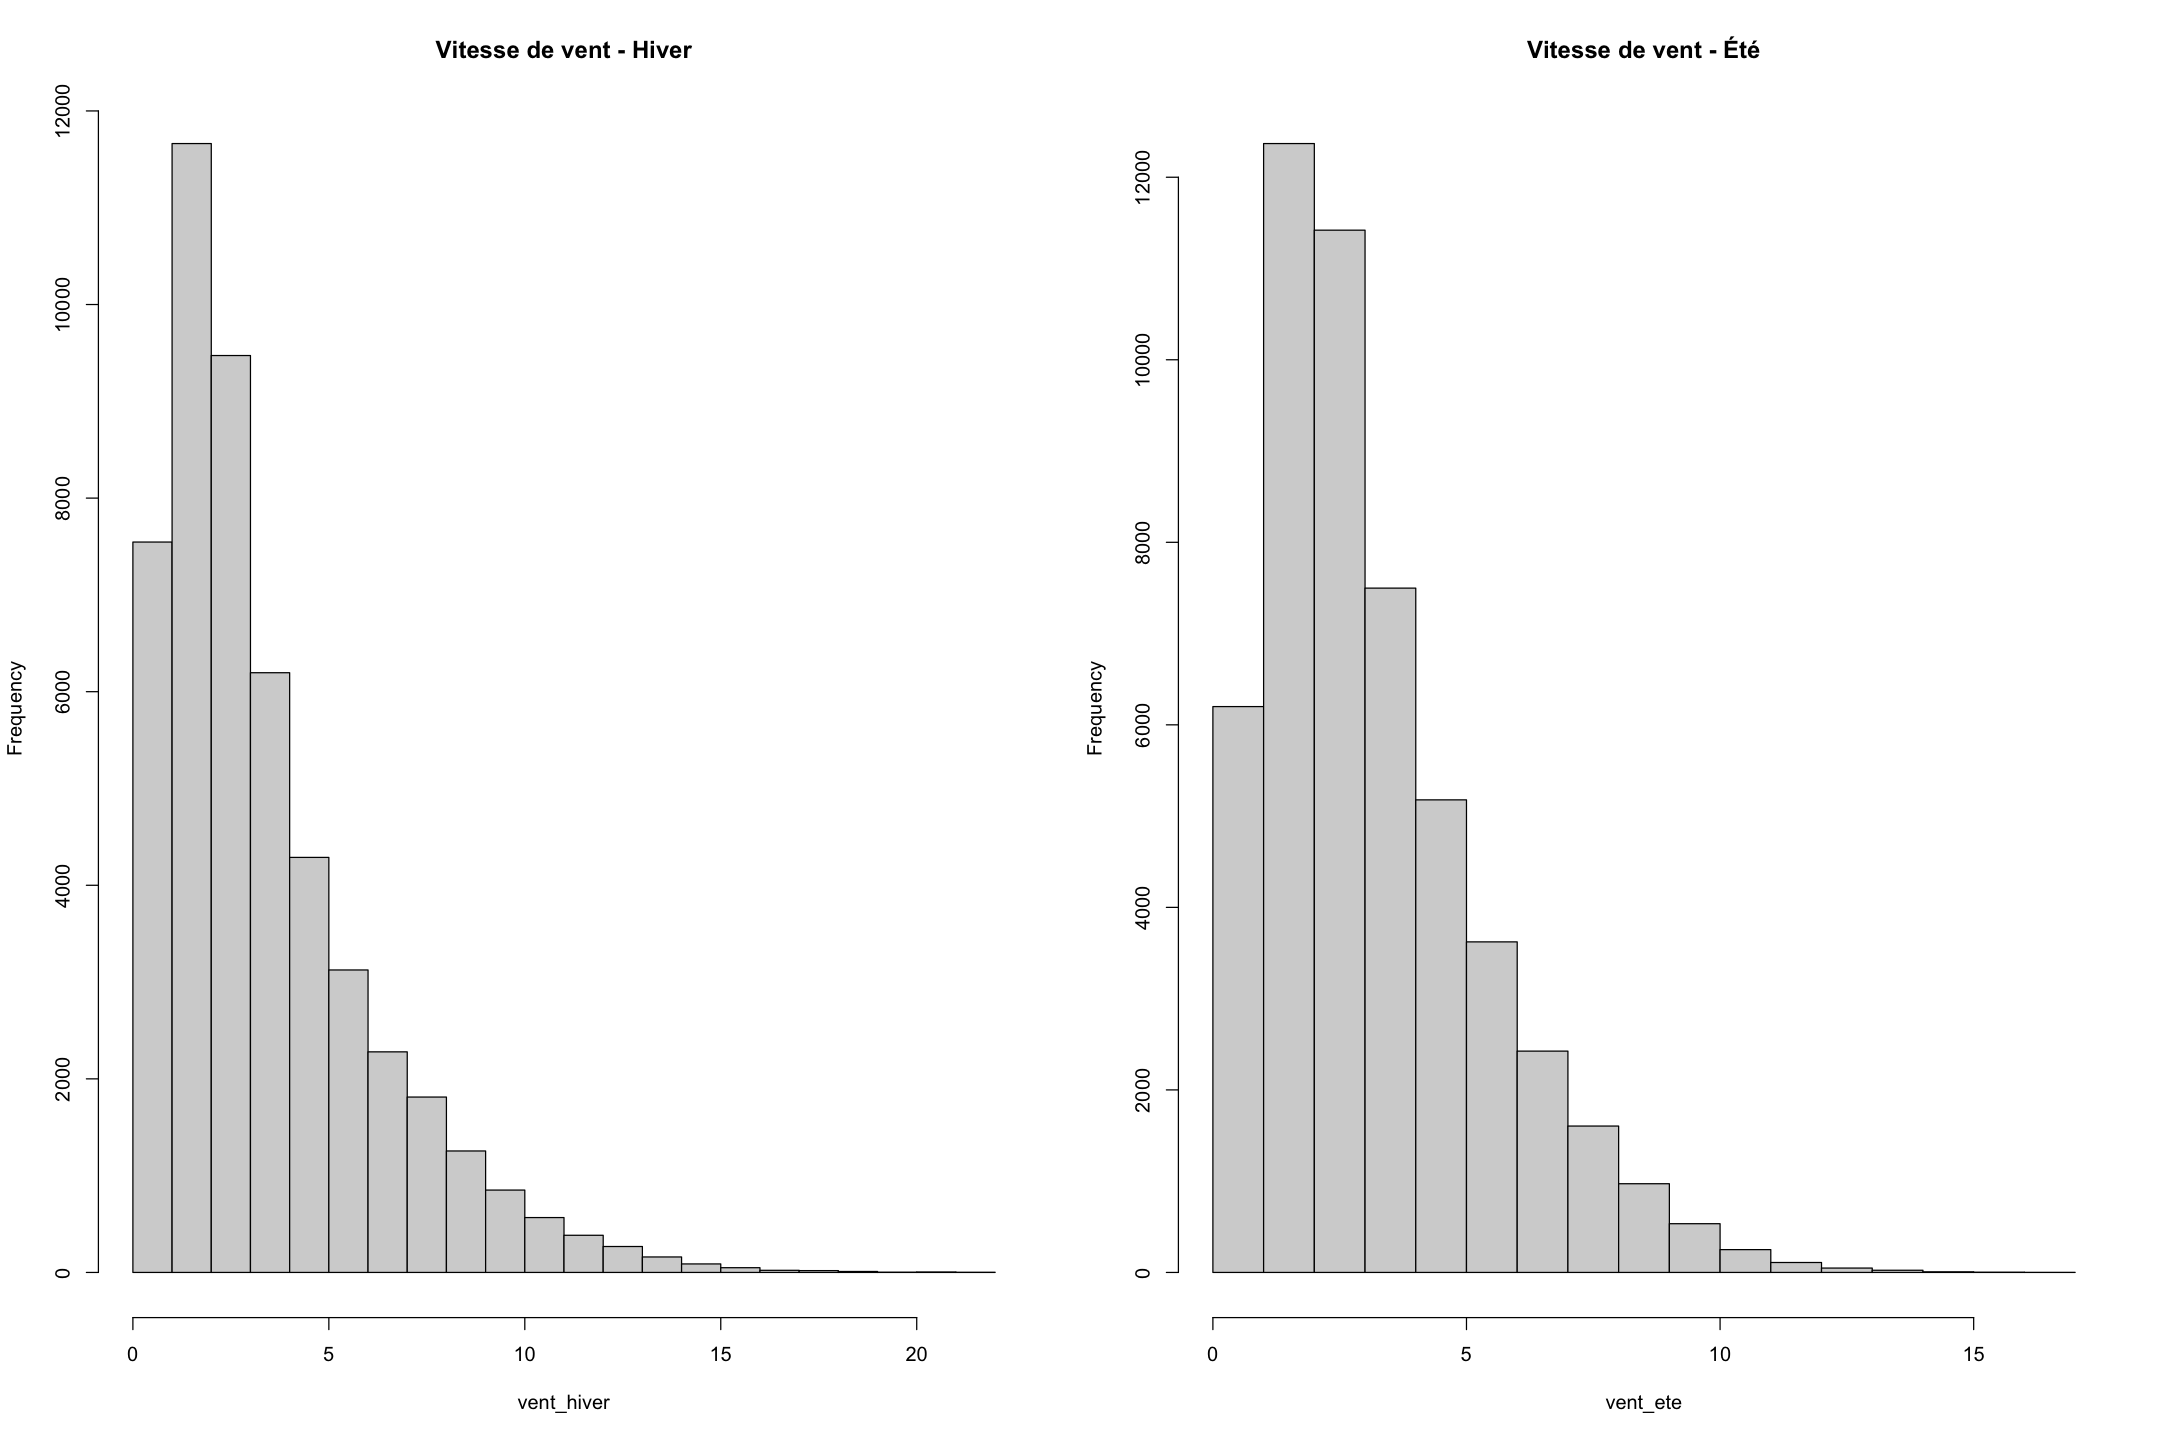

In [42]:
# Visualisation des distributions
par(mfrow = c(1,2))
hist(vent_hiver, main = "Vitesse de vent - Hiver")
hist(vent_ete, main = "Vitesse de vent - Été")

En hiver :
- Distribution asymétrique
- Pic marqué pour les faibles vitesses de vent
- Présence de valeurs extrêmes

En été : 
- Distribution plus symétrique qu'on hiver mais toujours asymétrique
- Pic plus prononcé pour les faibles vitesses, donc moins de vents très forts

## Test d'hompgénéité des variances

In [43]:
var.test(vent_hiver, vent_ete)


	F test to compare two variances

data:  vent_hiver and vent_ete
F = 1.5665, num df = 50064, denom df = 52263, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.539536 1.593845
sample estimates:
ratio of variances 
          1.566452 


Au vus de la p-value (<2.2e-16), on conclue que les variances sont significativement différentes entre es deux saisons.

La variance en hiver est 1.59 fois plus grance qu'en été.

## Test de Wiloxon

In [44]:
wilcox.test(vent_hiver, vent_ete)


	Wilcoxon rank sum test with continuity correction

data:  vent_hiver and vent_ete
W = 1303894373, p-value = 0.3511
alternative hypothesis: true location shift is not equal to 0


p-value = 0.633, les valeurs médianes ne présentent pas de différence significative. 

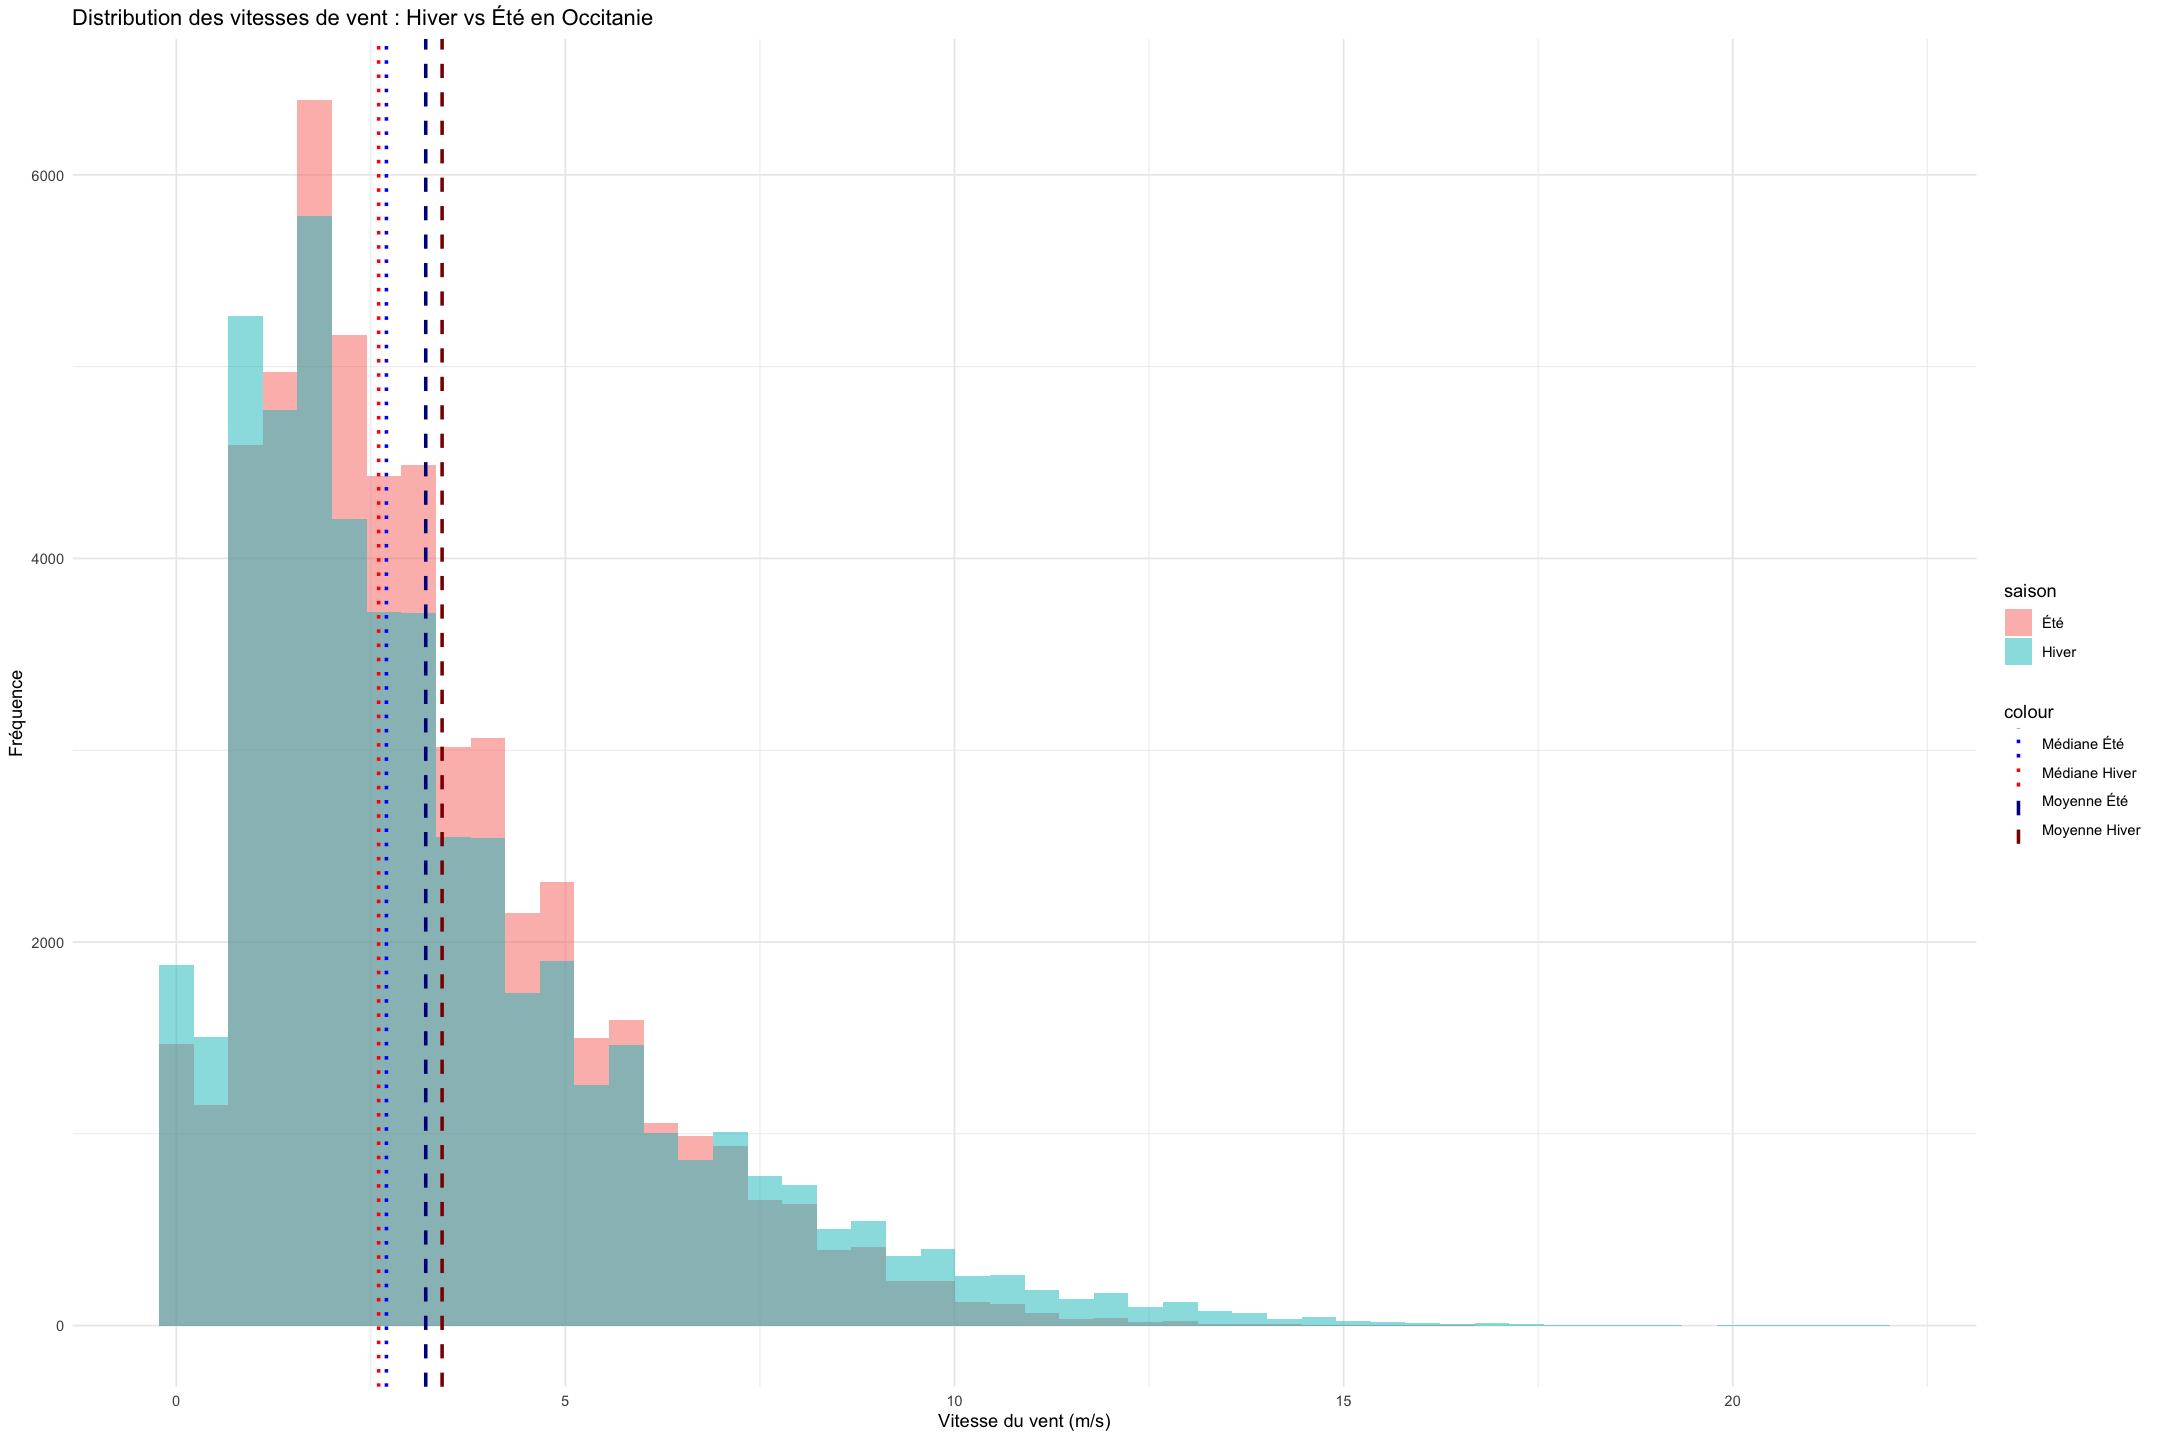

In [45]:
# Créer un data frame pour ggplot
df_plot <- data.frame(
  vitesse = c(vent_hiver, vent_ete),
  saison = rep(c("Hiver", "Été"), c(length(vent_hiver), length(vent_ete)))
)

# Histogrammes superposés
ggplot(df_plot, aes(x = vitesse, fill = saison)) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 50) +
  geom_vline(aes(xintercept = mean(vent_hiver), color = "Moyenne Hiver"), linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median(vent_hiver), color = "Médiane Hiver"), linetype = "dotted", size = 1) +
  geom_vline(aes(xintercept = mean(vent_ete), color = "Moyenne Été"), linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median(vent_ete), color = "Médiane Été"), linetype = "dotted", size = 1) +
  labs(title = "Distribution des vitesses de vent : Hiver vs Été en Occitanie",
       x = "Vitesse du vent (m/s)", y = "Fréquence") +
  scale_color_manual(values = c("blue", "red", "darkblue", "darkred")) +
  theme_minimal()

## Bilan des tests de vitesse de vent pour l'Occitanie

En Occitanie, les vitesses de vent moyennes sont significativement plus élevées en hiver qu’en été (test t de Welch, p < 2.2e-16), avec une différence moyenne de 0.23 m/s. Cette différence est principalement due à une plus grande fréquence de vents forts en hiver, comme le montre l’asymétrie de la distribution. En effet, bien que les médianes ne diffèrent pas significativement (test de Wilcoxon, p = 0.633), les valeurs extrêmes en hiver tirent la moyenne vers le haut. De plus, les vitesses de vent en hiver sont plus variables (test F, p < 2.2e-16), ce qui reflète une plus grande dispersion des conditions météo pendant cette saison.

# 3.2 - ANOVA

## Comparaison inter-regions de la vitesse du vent

In [46]:
df_ete <- full_data %>%
  mutate(
    saison = case_when(
      mois_de_l_annee %in% c(6, 7, 8) ~ "Été",
      TRUE ~ "Autre"  # On ne garde que l'été
    )
  ) %>%
  filter(saison == "Été")  # Garder uniquement les données de l'été

# Sélectionner les colonnes et nettoyer les données
df_ete_clean <- df_ete %>%
  select(`Vitesse.du.vent.moyen.10.mn`, `region..name.`) %>%
  filter(!is.na(`Vitesse.du.vent.moyen.10.mn`))

In [48]:
# Exclure les régions avec moins de 1000 observations
df_ete_clean <- df_ete_clean %>%
  group_by(`region..name.`) %>%
  filter(n() > 1000) %>%
  ungroup()

# Supprimer les lignes où la région est NA
df_ete_clean <- df_ete_clean %>%
  filter(!is.na(`region..name.`))

# Vérifier le nombre de mesures restantes
cat("Nombre de mesures après suppression des régions NA : ", nrow(df_ete_clean), "\n")

Nombre de mesures après suppression des régions NA :  404902 


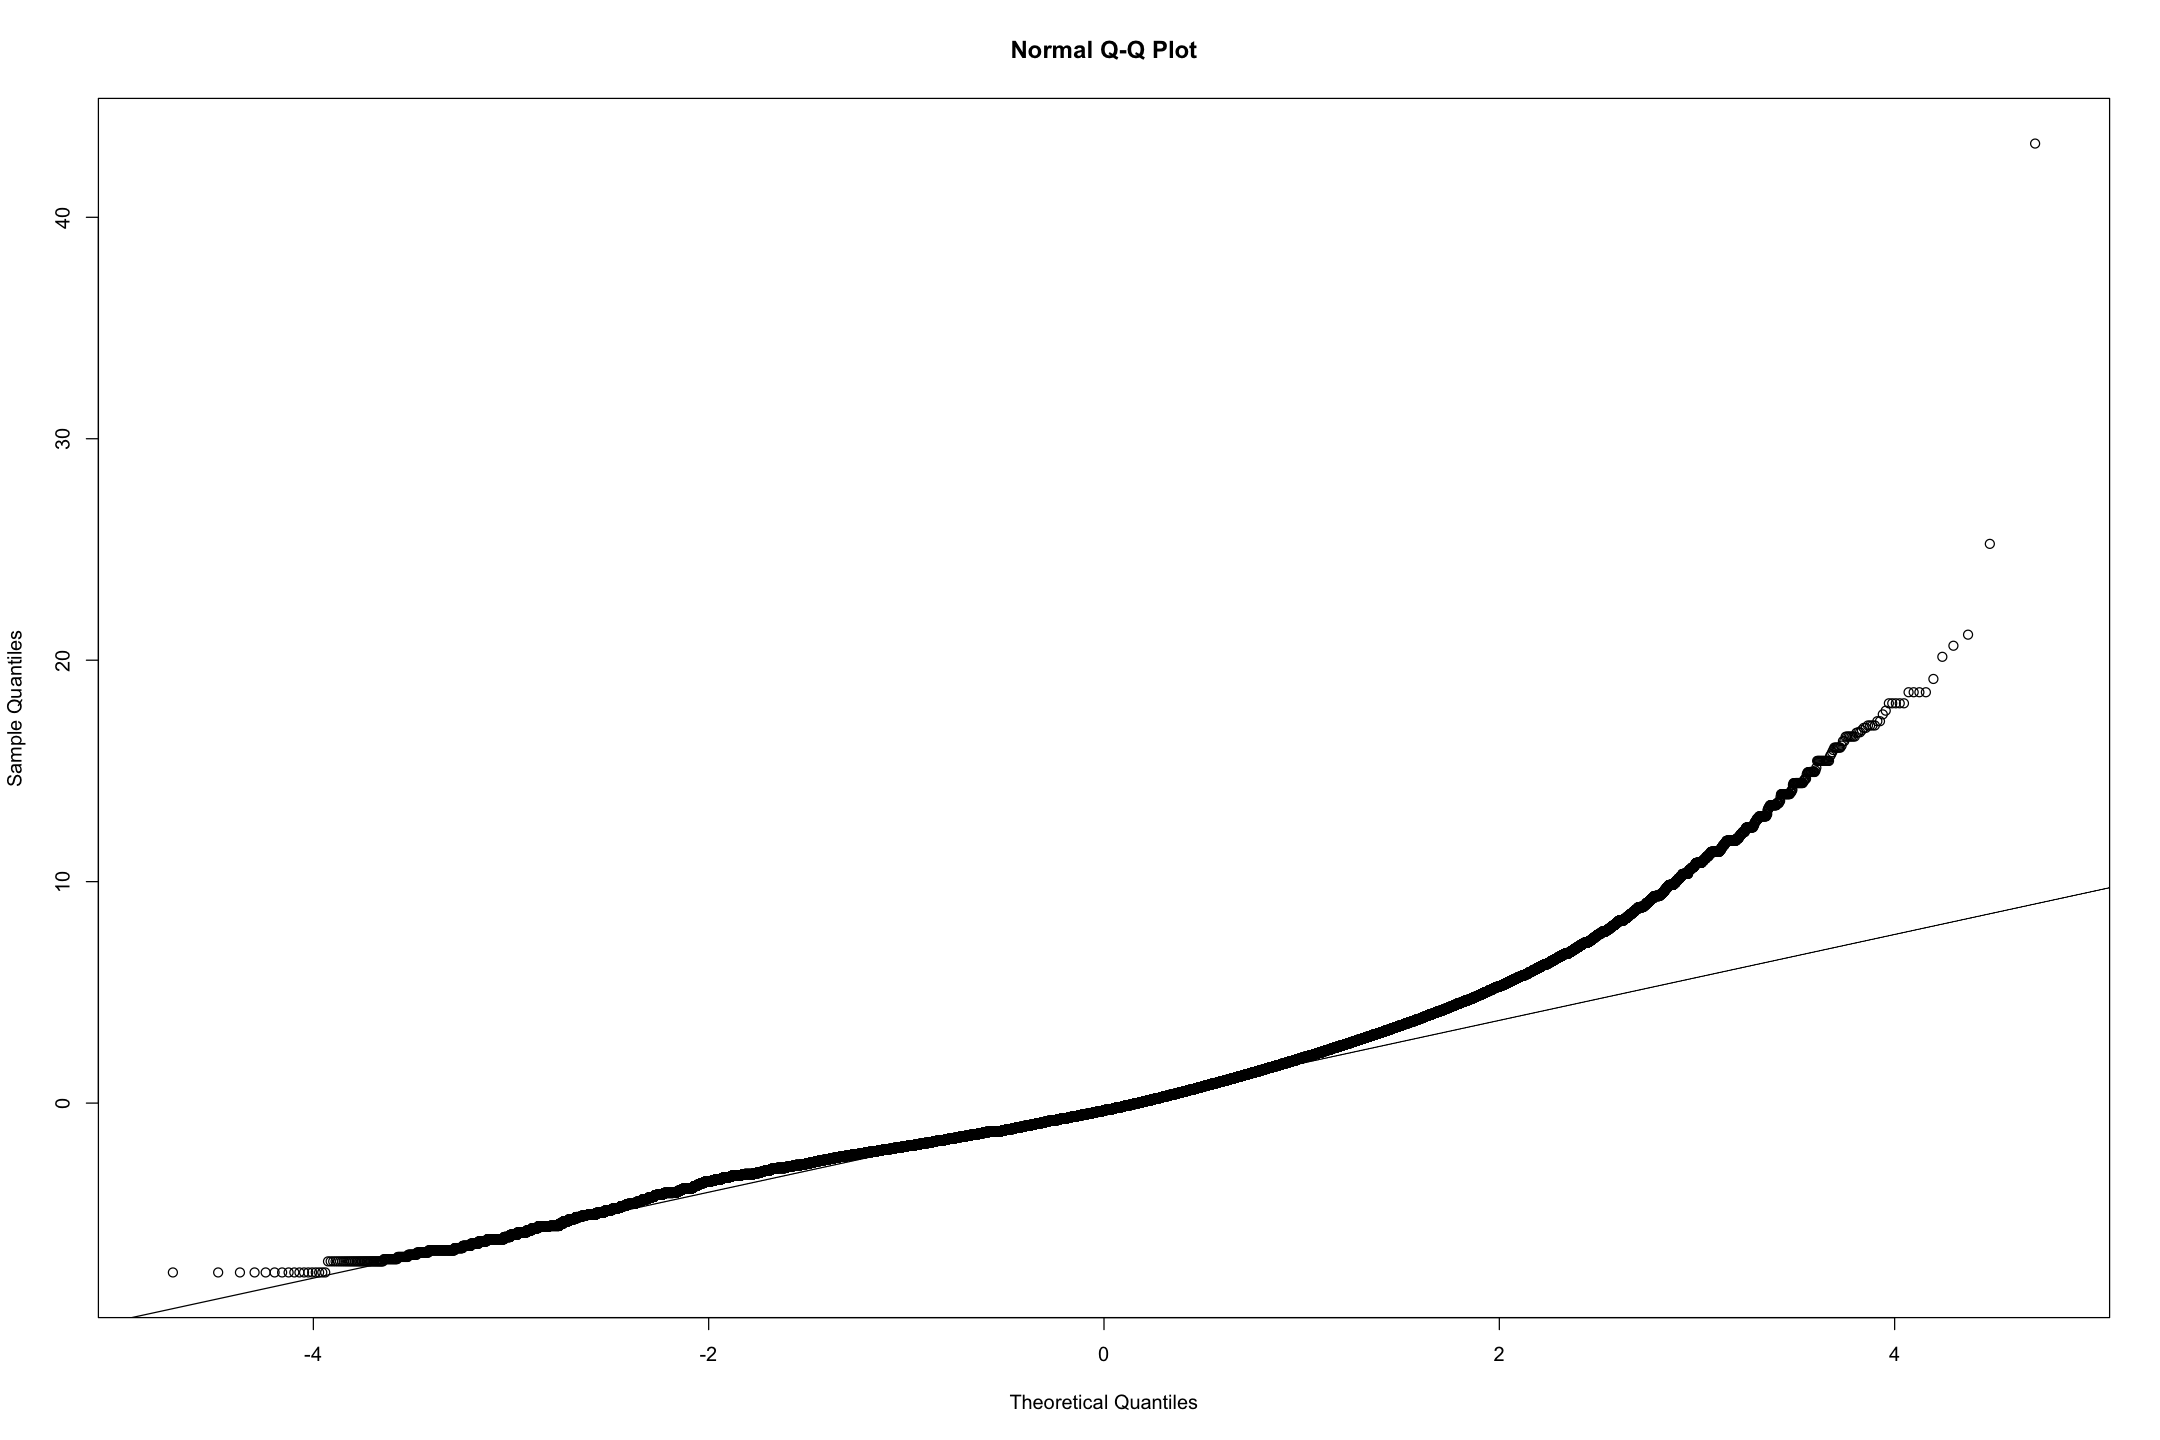

In [49]:
# Ajustement d'un modèle linéaire pour obtenir les résidus
model <- lm(`Vitesse.du.vent.moyen.10.mn` ~ `region..name.`, data = df_ete_clean)
residus <- residuals(model)

# QQ-plot des résidus
qqnorm(residus)
qqline(residus)

Les résidues suivent globalement ma bonne tendance, jusqu'à un theoritcal quantitie de 2.

In [50]:
bartlett.test(`Vitesse.du.vent.moyen.10.mn` ~ `region..name.`, data = df_ete_clean)


	Bartlett test of homogeneity of variances

data:  Vitesse.du.vent.moyen.10.mn by region..name.
Bartlett's K-squared = 52875, df = 20, p-value < 2.2e-16


La variance des résidus n'est pas homogène (p-value < 0.05), on doit donc réaliser une ANOVA de Welch

In [51]:
# Réaliser l'ANOVA de Welch
welch_result <- oneway.test(`Vitesse.du.vent.moyen.10.mn` ~ `region..name.`, data = df_ete_clean, var.equal = FALSE)

# Afficher le résultat
print(welch_result)


	One-way analysis of means (not assuming equal variances)

data:  Vitesse.du.vent.moyen.10.mn and region..name.
F = 6860.9, num df = 20, denom df = 87752, p-value < 2.2e-16



In [54]:
# Nettoyer les données pour éliminer les régions NA
df_ete_clean <- df_ete_clean %>%
  filter(!is.na(`region..name.`))

# Réaliser le test post-hoc de Dunn
dunn_result <- dunnTest(`Vitesse.du.vent.moyen.10.mn` ~ `region..name.`, data = df_ete_clean, method = "bonferroni")
p_matrix <- dunn_result$res

In [55]:
# Extraire les noms uniques des régions
regions <- unique(unlist(lapply(strsplit(p_matrix$Comparison, " - "), function(x) x)))

# Créer une matrice carrée de p-values initialisée à 1
p_matrix_full <- matrix(1, nrow = length(regions), ncol = length(regions),
                        dimnames = list(regions, regions))

# Remplir la matrice avec les p-values
for (i in 1:nrow(p_matrix)) {
  comp <- unlist(strsplit(p_matrix$Comparison[i], " - "))
  p_matrix_full[comp[1], comp[2]] <- p_matrix$P.adj[i]
  p_matrix_full[comp[2], comp[1]] <- p_matrix$P.adj[i]
}

# Remplir la diagonale avec des 1
diag(p_matrix_full) <- 1


Attachement du package : ‘reshape2’


L'objet suivant est masqué depuis ‘package:tidyr’:

    smiths




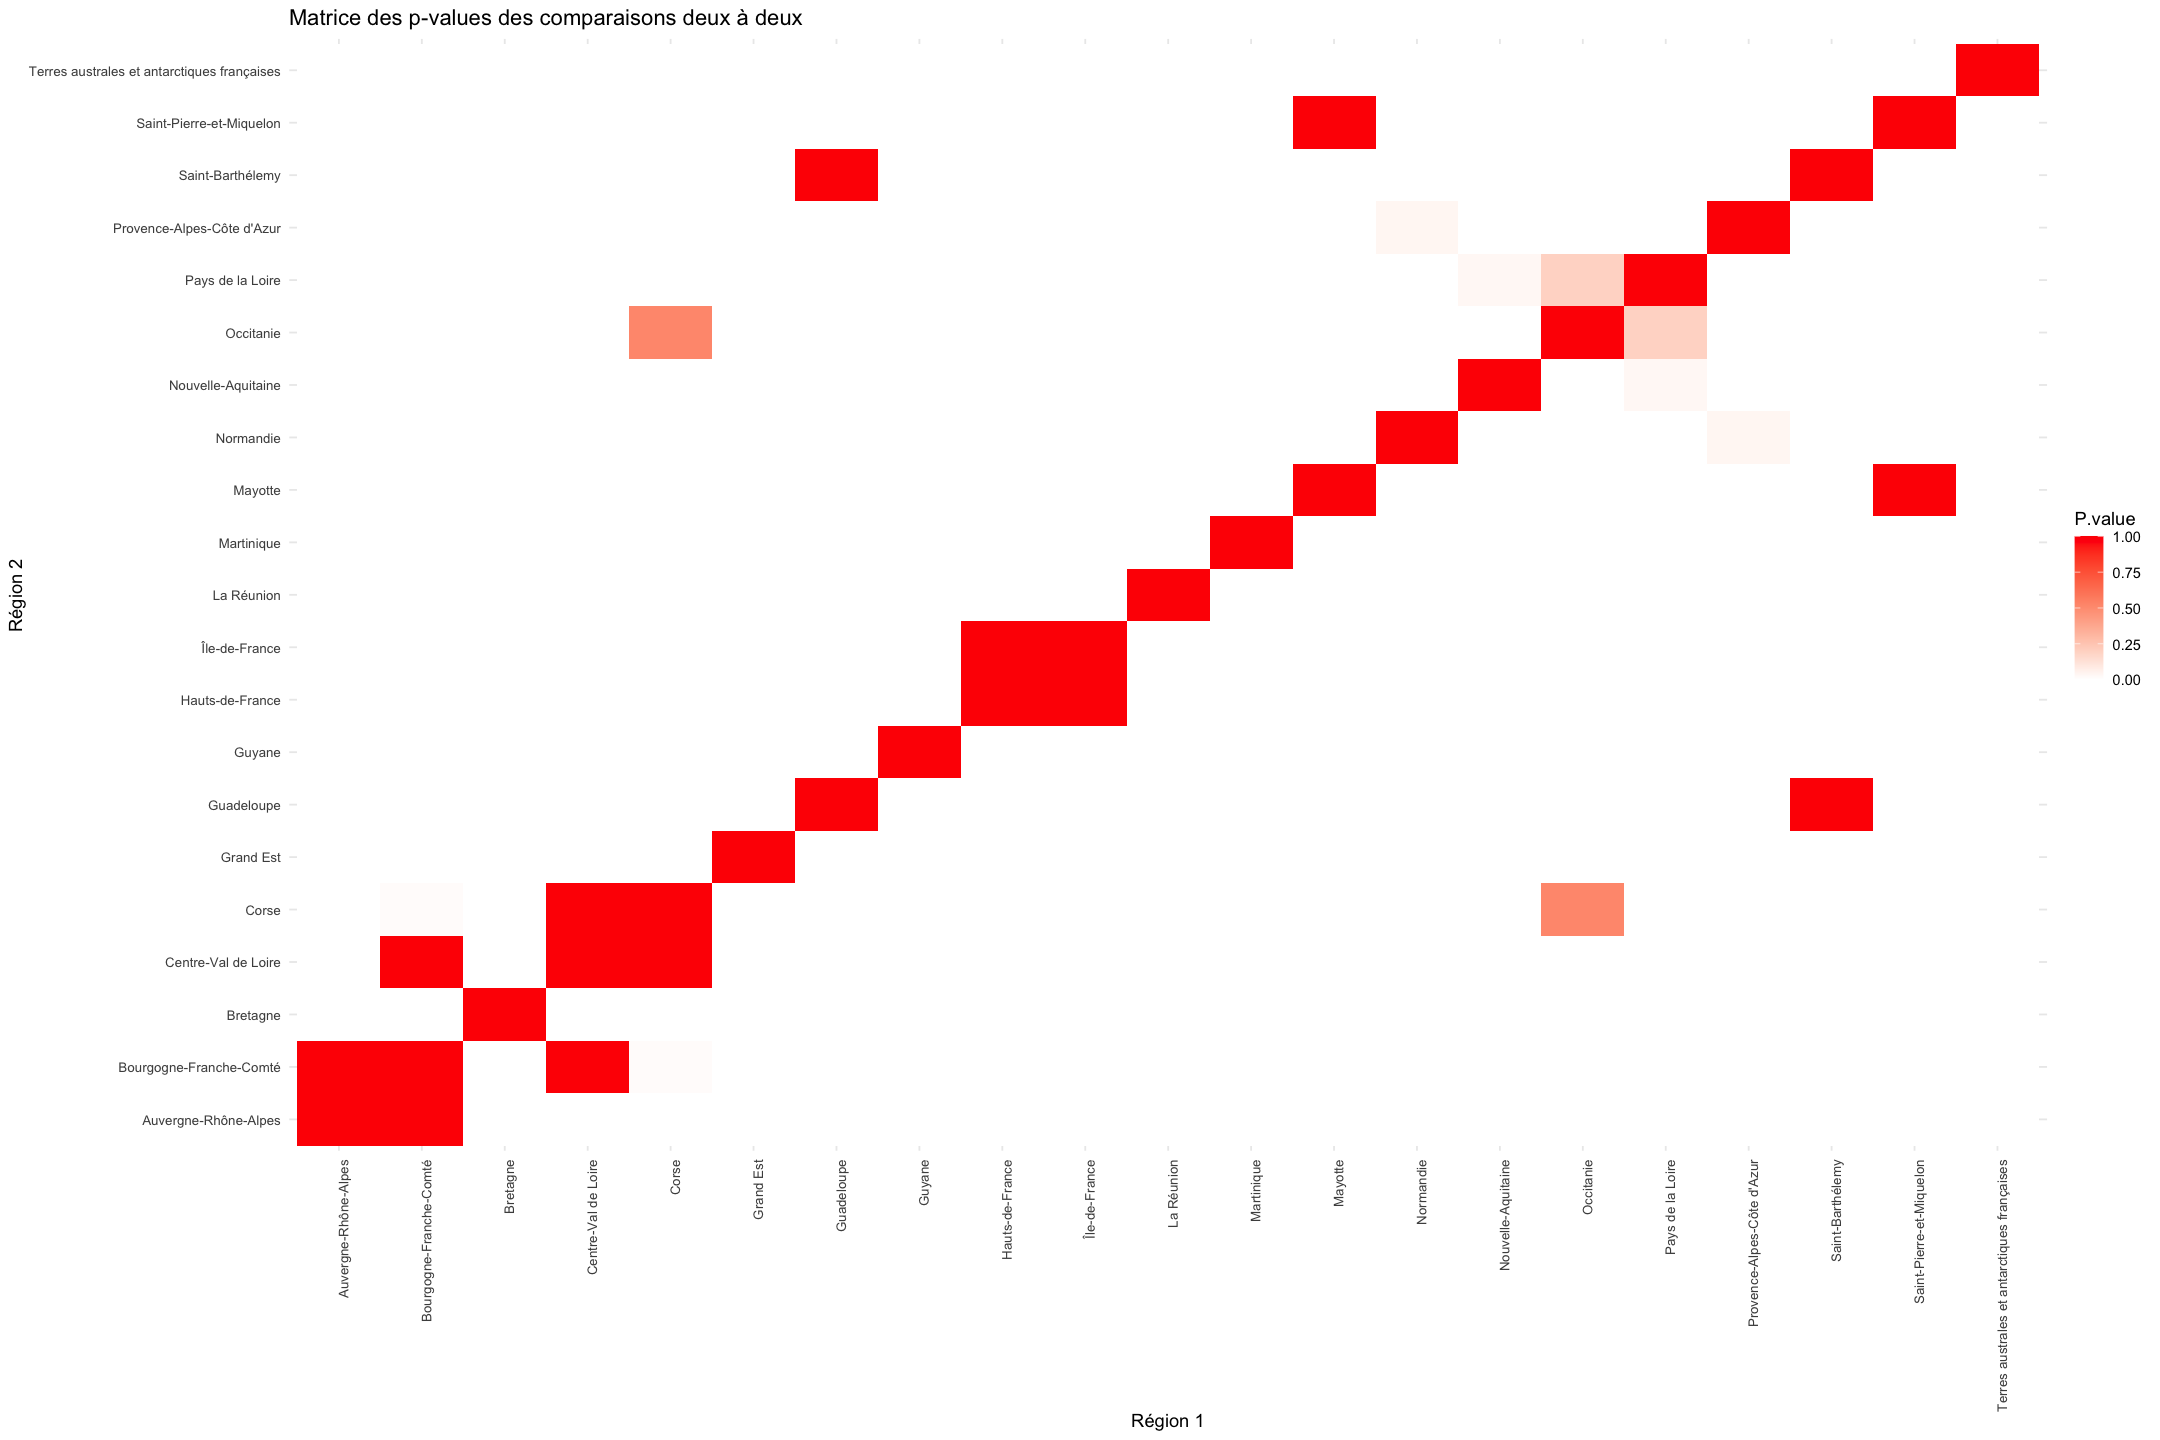

In [56]:
library(reshape2)
library(ggplot2)

# Convertir la matrice en format long pour ggplot2
melted_p_matrix <- melt(p_matrix_full)
colnames(melted_p_matrix) <- c("Region1", "Region2", "P.value")

# Créer la heatmap
ggplot(melted_p_matrix, aes(x = Region1, y = Region2, fill = P.value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red", limits = c(0, 1)) +
  labs(title = "Matrice des p-values des comparaisons deux à deux",
       x = "Région 1", y = "Région 2") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8),
        axis.text.y = element_text(size = 8))


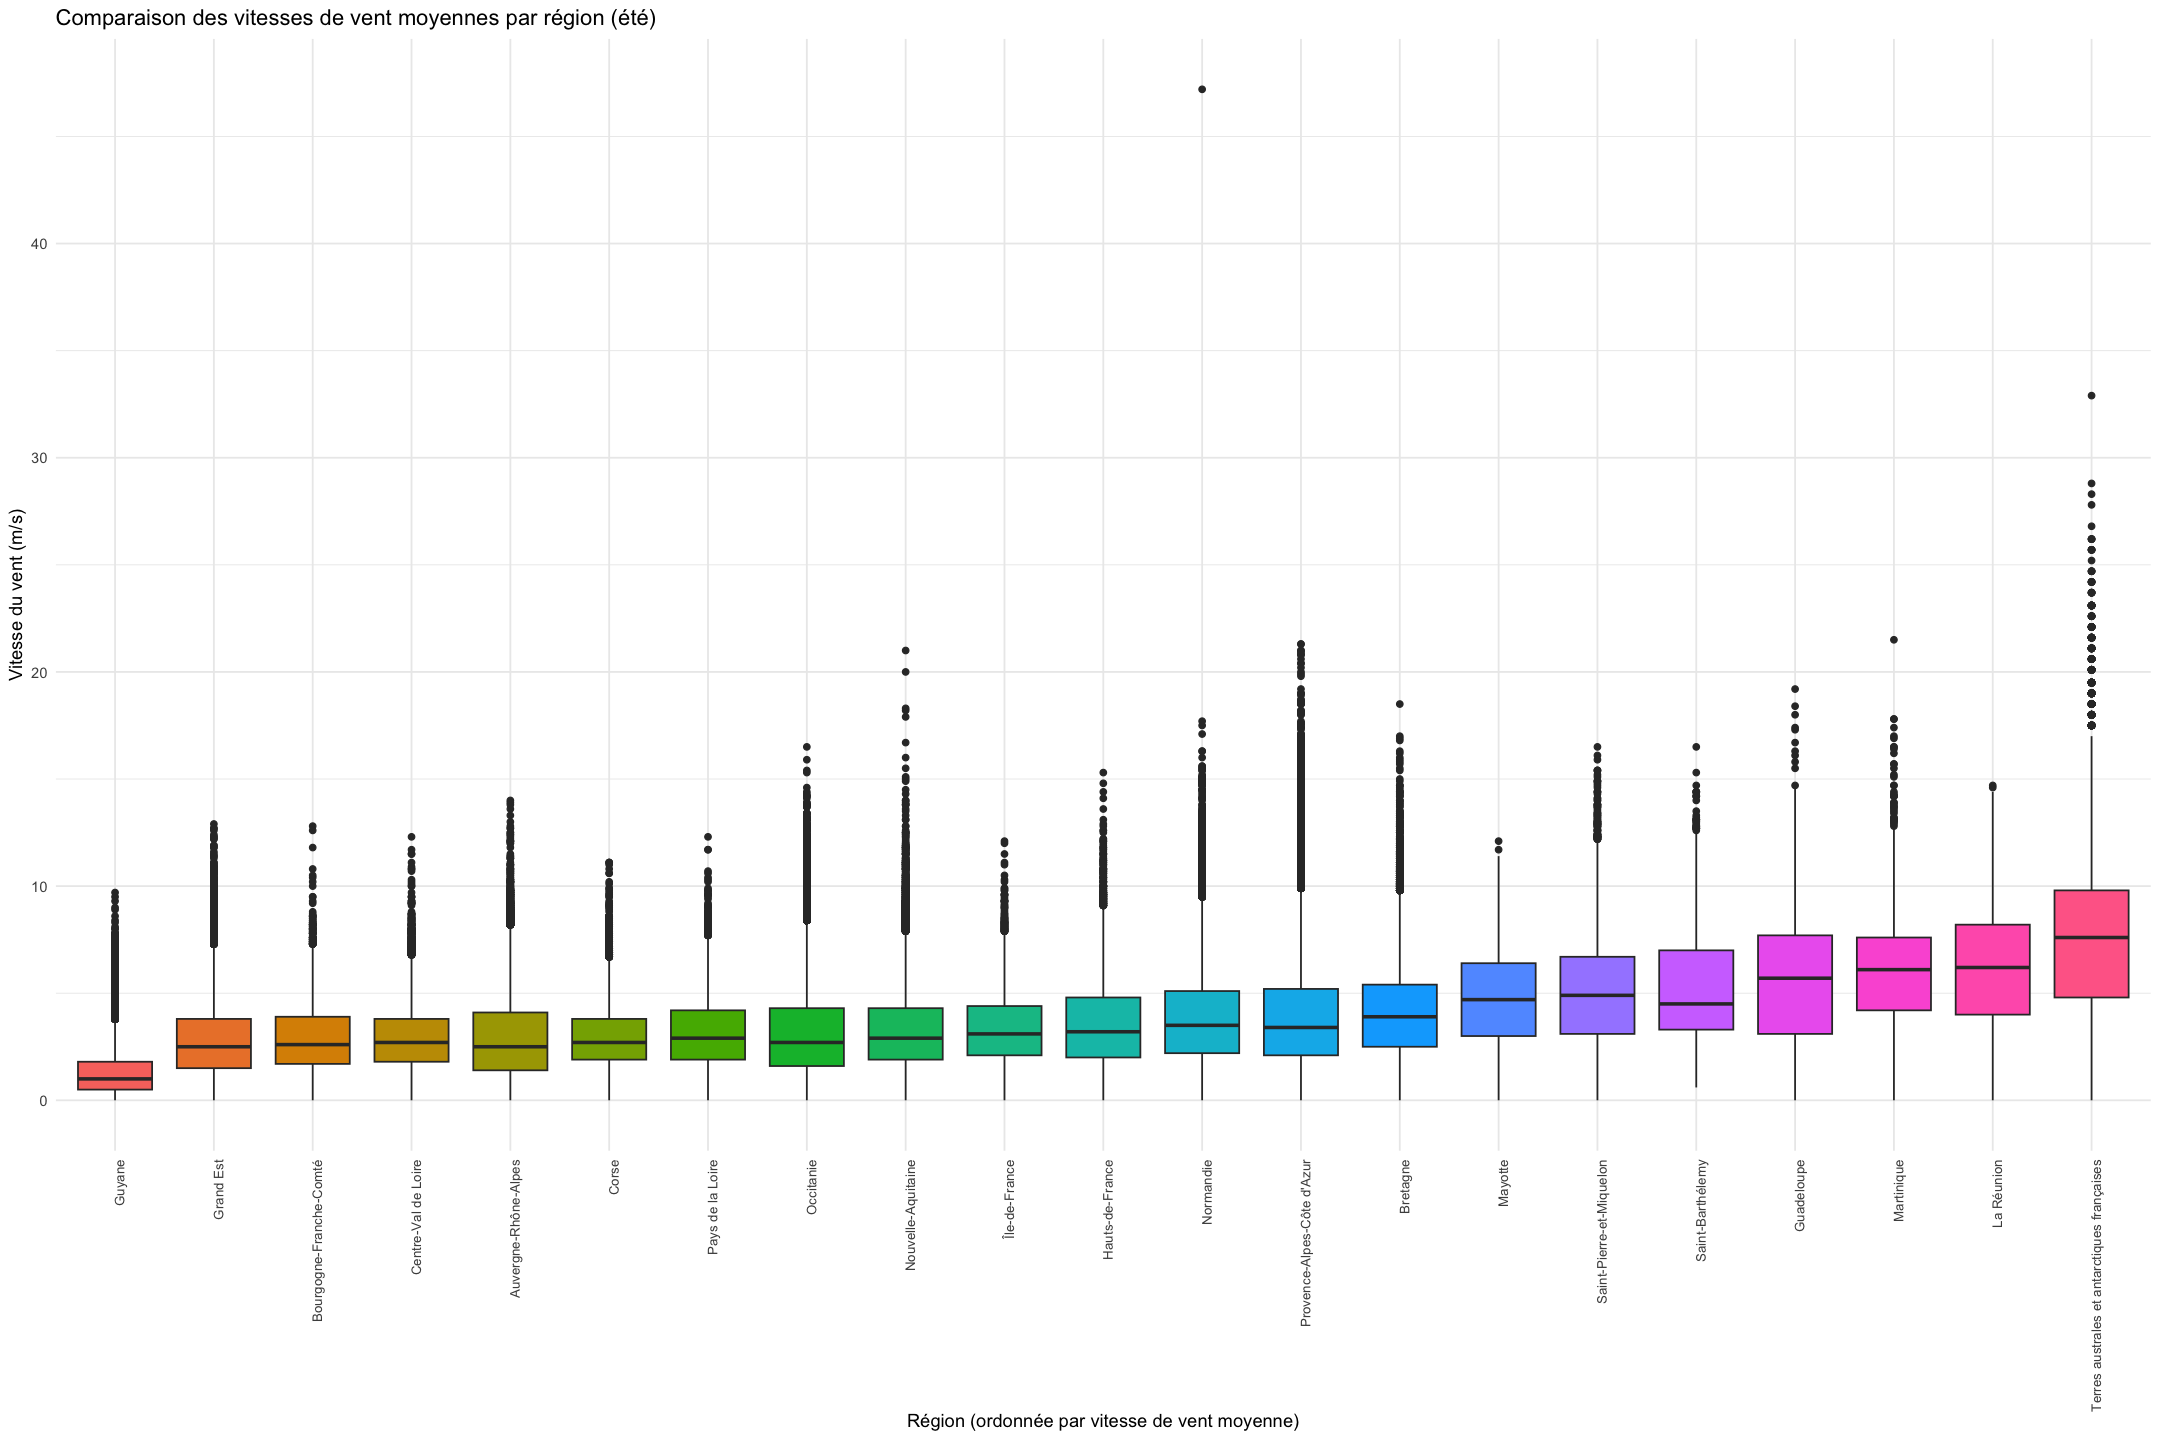

In [57]:
# Calculer la vitesse de vent moyenne par région
region_means <- df_ete_clean %>%
  group_by(`region..name.`) %>%
  summarise(mean_wind = mean(`Vitesse.du.vent.moyen.10.mn`)) %>%
  arrange(mean_wind)  # Trier par vitesse de vent moyenne

# Créer un facteur ordonné pour les régions
df_ete_clean$`region..name.` <- factor(df_ete_clean$`region..name.`, levels = region_means$`region..name.`)

# Boxplot amélioré
ggplot(df_ete_clean, aes(x = `region..name.`, y = `Vitesse.du.vent.moyen.10.mn`, fill = `region..name.`)) +
  geom_boxplot() +
  labs(title = "Comparaison des vitesses de vent moyennes par région (été)",
       x = "Région (ordonnée par vitesse de vent moyenne)",
       y = "Vitesse du vent (m/s)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8),
        legend.position = "none")  # Supprimer la légende pour éviter la surcharge

# 4.1 - Regression lineaire

# 4.2 - Etude de correlation

# 5.1 - ACP

# 5.2 - PLS

# 6 Clustering